# Best Calendar Retry Attempt

In [1]:
%set_env SPARK_HOME=/opt/spark
import os
import findspark
os.environ['PYSPARK_SUBMIT_ARGS'] = """\
--master spark://10.81.15.213:7077
--jars "ojdbc6.jar"
--packages datastax:spark-cassandra-connector:2.3.1-s_2.11,anguenot:pyspark-cassandra:0.9.0
--driver-memory 6g
--executor-memory 5g
--conf spark.local.dir=/var/spark
--conf spark.network.timeout=420000
--conf spark.shuffle.registration.timeout=42000
--conf spark.driver.cores=4
--conf spark.executor.cores=8
--conf spark.driver.maxResultSize=38
pyspark-shell
"""

# --conf spark.cores.max=16

# --driver-memory 70g
# --executor-memory 25g
# --conf spark.executor.heartbeatInterval=42000
# --conf num-executors=4
# --conf spark.shuffle.service.enabled=true
# --conf spark.dynamicAllocation.executorIdleTimeout=42000
# --conf spark.dynamicAllocation.enabled=true
# --conf spark.dynamicAllocation.minExecutors=4

import pyspark
from pyspark import SparkContext, SparkConf
findspark.init()
sc = pyspark.SparkContext(appName="BestRetry")

env: SPARK_HOME=/opt/spark


In [2]:
sc._conf.set("spark.sql.execution.arrow.enabled", "true")
# sc._conf.set('spark.driver.maxResultSize', '32')
# sc._conf.set('spark.driver.cores', '4')
# sc._conf.set('spark.executor.cores', '7')
# # sc._conf.set('spark.driver.memory', '24g')
# # sc._conf.set('spark.executor.memory', '24g')
# sc._conf.set("spark.cores.max", 6)
sc._conf.set("spark.local.dir", "/var/spark")

# sc._conf.set("spark.network.timeout", "1000000s")
# sc._conf.set("spark.executor.heartbeatInterval", "1000000s")

# sc._conf.set("spark.cassandra.input.split.size_in_mb", 32)
# sc._conf.set("spark.cassandra.splitCount", 16)
# sc._conf.set("spark.cassandra.connection.host", "10.224.12.32")

# sc._conf.set("spark.cassandra.connection.host", "10.62.1.118")
# sc._conf.set("spark.cassandra.auth.username", "mlprw")
# sc._conf.set("spark.cassandra.auth.password", "q4RgwD$wK7*z")

# sc._conf.set("spark.cassandra.connection.host", "10.47.65.95")
# sc._conf.set("spark.cassandra.auth.username", "mlprw")
# sc._conf.set("spark.cassandra.auth.password", "Df^9c2%znt7S")

# sc._conf.set("spark.cassandra.connection.host", "10.62.1.95")
sc._conf.set("spark.cassandra.connection.host", "10.80.54.109")
sc._conf.set("spark.cassandra.auth.username", "mlprw")
sc._conf.set("spark.cassandra.auth.password", "Df^9c2%znt7S")


sc._conf.getAll()

[('spark.driver.cores', '4'),
 ('spark.deploy.spreadOut', 'true'),
 ('spark.cassandra.auth.password', 'Df^9c2%znt7S'),
 ('spark.sql.execution.arrow.enabled', 'true'),
 ('spark.driver.maxResultSize', '38'),
 ('spark.local.dir', '/var/spark'),
 ('spark.executor.memory', '5g'),
 ('spark.files',
  'file:///root/.ivy2/jars/datastax_spark-cassandra-connector-2.3.1-s_2.11.jar,file:///root/.ivy2/jars/anguenot_pyspark-cassandra-0.9.0.jar,file:///root/.ivy2/jars/com.twitter_jsr166e-1.1.0.jar,file:///root/.ivy2/jars/org.joda_joda-convert-1.2.jar,file:///root/.ivy2/jars/io.netty_netty-all-4.0.33.Final.jar,file:///root/.ivy2/jars/commons-beanutils_commons-beanutils-1.9.3.jar,file:///root/.ivy2/jars/joda-time_joda-time-2.3.jar,file:///root/.ivy2/jars/org.scala-lang_scala-reflect-2.11.8.jar,file:///root/.ivy2/jars/commons-collections_commons-collections-3.2.2.jar,file:///root/.ivy2/jars/com.datastax.spark_spark-cassandra-connector_2.11-2.3.0.jar,file:///root/.ivy2/jars/net.razorvine_pyrolite-4.10.jar

In [3]:
import pyspark
from pyspark.sql import SparkSession, SQLContext

spark = SparkSession.builder.\
    master("spark://10.62.42.243:7077").\
    appName("BestRetry").\
    config(conf=sc._conf).\
    getOrCreate()
# spark

sqlContext = SQLContext(sc)
sqlContext

In [9]:
# pdf_all['day_of_week'].value_counts(dropna=False)
# pdf_all.to_csv('/drhdev/workspace/ml/pdf_all_site_2018-01-01_2018-06-30.csv')
from IPython.display import display
pd.options.display.max_columns = None
display(pdf_all)

,received_date,site_id,subscription_id,event_uuid,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,retry_rule_id,status,subsegment_id,time_of_day_rule_id,transaction_date,transaction_date_in_string,transaction_hour,transaction_id,transaction_type,success,first_attempt_date,first_day_of_month,first_transaction_hour,first_response_code,first_response_message,first_response_group,first_decline_type,days_between
0,20180418,avast,10001280501,673671cc-cc57-400c-b872-8ff9efb09a6d,None,NON3DS,Standard Chartered Bank Tanzania Limited,TZ,478680,Visa,Visa Gold,Consumer,NON USA Consumer Debit - No Pin Access,0322,None,None,18,wednesday,None,Debit,TZ,DRI*AVAST Software,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,79.99,79.99,USD,Visa,netgiro-bms,3,79.99,79.99,USD,46971082700,27050,Do not try again/use alternate payment card.[0...,None,New,13258980000,,2018-04-18 06:21:29,2018-04-18 01:21:29,01,6681738323,Authorize,0,2018-04-03 01:07:59,3,01,27050,Do not try again/use alternate payment card.[0...,do_not_try,Hard Fraud,15
1,20180418,avastbr,10001441601,11cc8ab0-fe20-4e80-9d8c-2a7a856e7f17,None,NON3DS,ITAU UNIBANCO S.A.,BR,539083,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,True credit (No PIN/Signature capability),1223,None,None,18,wednesday,None,Credit,BR,Avast Brazil,1883448942,DR_BRAZIL-ENTITY,Declined,DR_BRAZIL-ENTITY,99,29.018051,BRL,MasterCard,netgiro-br,3,99,29.018051,BRL,46969296500,27001,Transaction refused[62] [null] [] [],None,New,13259159000,,2018-04-18 06:02:11,2018-04-18 01:02:11,01,6681601083,Authorize,0,2018-04-08 01:03:36,8,01,27001,Transaction refused[62] [null] [] [],txn_refused,Hard Fraud,10
2,20180418,avast,10001635101,8bc95f07-77b3-4bd4-abfa-5fee6658eb63,None,57E041B0B2F3D9A5,Metabank,US,435880,Visa,Visa Classic,Consumer,Debit Hybrid (PIN and Signature),0625,None,None,18,wednesday,None,Prepaid,US,DRI*AVAST Software,311009012882,DR_INC-ENTITY,Declined,DR_INC-ENTITY,53.99,53.99,USD,Visa,firstdata,3,53.99,53.99,USD,46969386300,402,12: INV TRAN,None,New,13259490100,,2018-04-18 06:03:02,2018-04-18 01:03:02,01,6681607843,Authorize,0,2018-04-03 01:10:44,3,01,402,12: INV TRAN,Base,Base,15
3,20180425,defendbr,10001895901,9f5ecc0d-2529-4930-9fc5-93daf88c9e74,3,899EBF821D876833,ITAU UNIBANCO S.A.,BR,521397,MasterCard,Platinum MasterCard Card,Consumer,True credit (No PIN/Signature capability),0620,None,None,25,wednesday,None,Credit,BR,DRI*BitDefender,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,DR_BRAZIL-ENTITY,Declined,DR_BRAZIL-ENTITY,229.99,66.742732,BRL,MasterCard,pagador,3,229.99,66.742732,BRL,47202743400,530,7: Do Not Honor,None,New,13259627500,,2018-04-25 06:01:35,2018-04-25 01:01:35,01,6706709733,Authorize,0,2018-04-16 01:01:42,16,01,530,7: Do Not Honor,do_not_honor,do_not_honor,9
4,20180418,avast,10001966301,1bf185fb-88cd-457c-85a2-a697021fc538,None,0FDA420D7B7FDBDC,"Chase Bank USA, National Association",US,424631,Visa,Visa Business,Business,True credit (No PIN/Signature capability),0718,None,None,18,wednesday,None,Credit,US,DRI*AVAST Software,311009012882,DR_INC-ENTITY,Declined,DR_INC-ENTITY,64.94,64.94,USD,Visa,firstdata,3,64.94,64.94,USD,46969539100,201,14: INV ACCT NUM,None,New,13259788300,,2018-04-18 06:05:07,2018-04-18 01:05:07,01,6681621783,Authorize,0,2018-04-03 01:12:21,3,01,201,14: INV ACCT NUM,Base,Base,15
5,20180519,adbehru,10002261401,0d1fbb95-019b-4f5f-8c53-f96ae78c2d0a,None,NON3DS,SBERBANK of Russia,RU,427609,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1018,RETRY_DECLINED.2,None,19,saturday,None,Debit,RU,DRI*Adobe Systems,1411163460-R

In [4]:
'''Queries all successful transactions to generate bin profile'''
import time

import pandas as pd


from pyspark.sql.types import *
from pyspark.sql.functions import col, count, rand, collect_list, explode, struct, count, lit, lower
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.functions import udf
from pyspark.sql.types import *
import pyspark_cassandra
        
import calendar, datetime
from datetime import timedelta

WORK_DIR = '/var/spark/ml_files/'


def convert_status(value):
    if value == 'Completed' or value == 'Reversed':
        return 1
    else:
        return 0
    
    
def cast_to_int(value, default=-1):
    try:
        return int(value)
    except (ValueError, TypeError):
        return default


#Convert from str to datetime
def to_date(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date

#Get difference between d2 and d1 in days.
def days_between(d1, d2):
    d1 = to_date(d1)
    d2 = to_date(d2)
    return abs((d2 - d1).days)

#Determines the week (number) of the month
def week_of_month(datestr):
    date = to_date(datestr)
    #Calendar object. 6 = Start on Sunday, 0 = Start on Monday
    cal_object = calendar.Calendar(6)
    month_calendar_dates = cal_object.itermonthdates(date.year,date.month)

    day_of_week = 1
    week_number = 1

    for day in month_calendar_dates:
        #add a week and reset day of week
        if day_of_week > 7:
            week_number += 1
            day_of_week = 1

        if date == day:
            break
        else:
            day_of_week += 1

    return str(week_number)

def to_weekday(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date.isoweekday()

def daterange(date1_str, date2_str):
    start_date = to_date(date1_str + ' 00:00:00')
    end_date = to_date(date2_str + ' 00:00:00')
    if start_date > end_date:
        raise ValueError('start date cannot be after the end date.')
    for n in range(int((end_date - start_date).days) + 1):
        yield str(start_date + timedelta(n))
            
def date_range_condition_values(start_date, end_date):
    dates = daterange(start_date, end_date)
    for idx, date in enumerate(dates):
            yield date

#Convert from str to datetime
def to_date(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date


    
udfValueToStatus = udf(convert_status, IntegerType())  

createDDL = """CREATE OR REPLACE TEMPORARY VIEW cpg_transaction_history
     USING org.apache.spark.sql.cassandra
     OPTIONS (
     table "cpg_transaction_history",
     keyspace "sarsks",
     cluster "MLP Cluster",
     pushdown "true")"""
spark.sql(createDDL)

# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2018-11-%' or received_date like '2018-12-%' ")
# df = spark.sql("SELECT bin, bank_code, bank_name,payment_amount_usd, subscription_id, received_date FROM cpg_transaction_history WHERE received_date like '2018-01-%' or received_date like '2018-02-%' or received_date like '2018-03-%' or received_date like '2018-04-%' or received_date like '2018-05-%' or received_date like '2018-06-%' or received_date like '2018-07-%' or received_date like '2018-08-%' or received_date like '2018-09-%' or received_date like '2018-10-%' or received_date like '2018-11-%' or received_date like '2018-12-%' \
#      or received_date like '2019-01-%' or received_date like '2019-02-%' or received_date like '2019-03-%' or received_date like '2019-04-%' or received_date like '2019-05-%' ")
df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2019-04-%' or received_date like '2019-05-%' ")


sdf =  df\
    .filter("new_status in ('Completed')")\
    .cache()

print(sdf.schema)
                                            
                            
time_start = time.time()

def _map_to_pandas(rdds):
    """ Needs to be here due to pickling issues """
    return [pd.DataFrame(list(rdds))]

def toPandas(df, n_partitions=None):
    """
    Returns the contents of `df` as a local `pandas.DataFrame` in a speedy fashion. The DataFrame is
    repartitioned if `n_partitions` is passed.
    :param df:              pyspark.sql.DataFrame
    :param n_partitions:    int or None
    :return:                pandas.DataFrame
    """
    if n_partitions is not None: df = df.repartition(n_partitions)
    df_pand = df.rdd.mapPartitions(_map_to_pandas).collect()
    df_pand = pd.concat(df_pand)
    df_pand.columns = df.columns
    return df_pand

# sdf_filtered = sdf
#         .filter("event_uuid != ''")  #.toPandas()

# pdf_all = toPandas(sdf_filtered, 6)  
successful_txn = sdf.toPandas()
# successful_txn_11_12 = sdf.toPandas()
print("# total time:", time.time() - time_start)      # total time: 2364.714904308319
    
successful_txn.shape
# successful_txn_11_12.shape

StructType(List(StructField(received_date,DateType,true),StructField(site_id,StringType,true),StructField(subscription_id,StringType,true),StructField(transaction_id,StringType,true),StructField(transaction_date,TimestampType,true),StructField(added_expiry_years,StringType,true),StructField(bank_code,StringType,true),StructField(bank_name,StringType,true),StructField(billing_country,StringType,true),StructField(bin,StringType,true),StructField(card_brand,StringType,true),StructField(card_category,StringType,true),StructField(card_class,StringType,true),StructField(card_usage,StringType,true),StructField(cc_expiration_date,StringType,true),StructField(cid,StringType,true),StructField(date_increment,StringType,true),StructField(day_of_month,StringType,true),StructField(day_of_week,StringType,true),StructField(event_uuid,StringType,true),StructField(exp_setting_id,StringType,true),StructField(funding_source,StringType,true),StructField(issuer_country,StringType,true),StructField(merchant_

(2807976, 45)

In [7]:
successful_txn_2019_04_05 = successful_txn[['bin', 'bank_code', 'bank_name', 'payment_amount_usd', 'subscription_id', 'received_date']]

In [6]:
successful_txn_rest = pd.read_csv(WORK_DIR + 'successful_txn_2018_01_to_2019_03.csv')
successful_txn_rest.shape

(5250412, 6)

In [11]:
successful_txn =  pd.concat([successful_txn_2019_04_05, successful_txn_rest], ignore_index=True)
successful_txn.shape

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(8058388, 7)

In [6]:
# successful_txn.to_csv(WORK_DIR + 'successful_txn_2019_01_to_05.csv')
successful_txn.to_csv(WORK_DIR + 'successful_txn_2019_01_to_05.csv')

In [10]:
import pandas as pd
WORK_DIR = '/var/spark/ml_files/'
successful_txn = pd.read_csv(WORK_DIR + 'successful_txn_2018_01_to_2019_03.csv')
successful_txn.shape

(18209867, 5)

In [12]:
successful_txn['payment_amount_usd'] = successful_txn['payment_amount_usd'].astype(float)


In [12]:
grouped = successful_txn['payment_amount_usd'].groupby(successful_txn['bank_code']).agg([('Mean','mean'), ('Median','median'),('Min','min'),('Max','max'),('StdDev','std'), ('Max_95', lambda x : x.quantile(.95)), ('Max_99', lambda x : x.quantile(.99)), ('Min_1', lambda x : x.quantile(.1)), ('Min_10', lambda x : x.quantile(.10)) , 'count']).reset_index()

bank_code_profile = grouped[grouped['count'] >= 3]
bank_code_profile.to_csv(WORK_DIR + 'bank_code_profile.csv')
bank_code_profile


,bank_code,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,Min_10,count
0,,62.277421,59.990000,2.990000,199.541097,29.824982,105.727000,166.147303,22.902000,22.902000,479
1,00016AB58F593ED5,46.342498,46.509947,2.270000,169.990000,32.951066,104.390000,136.014000,8.965130,8.965130,261
2,0005BCE483B4DC42,48.086858,47.500000,2.270000,193.260000,36.714324,112.198000,153.358000,8.949047,8.949047,213
6,0014678C3CCF1020,52.962367,53.075000,2.270000,192.590000,33.007587,106.907500,164.857200,10.060000,10.060000,168
9,001882F399A66C00,40.996332,33.940000,1.940000,171.010000,32.506896,91.241000,150.140000,5.162000,5.162000,242
11,001D0F8ACA086BDA,56.308154,57.078582,2.260000,326.445271,39.003901,108.486509,175.336000,9.990000,9.990000,191
16,0026CCD52F9C05B0,45.743890,46.728414,2.490000,372.360000,36.624447,88.199000,118.947773,9.291948,9.291948,203
19,002CFCDD6ACE30D0,50.078118,44.990000,2.280000,1044.000000,77.001804,104.762000,222.803600,4.990000,4.990000,223
23,0031B608F3566AC4,45.490860,49.045000,2.490000,195.510000,34.933468,90.673352,150.890000,7.340000,7.340000,192
31,003F47ECE4256177,47.318685,49.990000,2.270000,169.990000,34.801363,97.454500,163.055000,9.301660,9.301660,174


In [12]:
# successful_txn = pd.read_csv(WORK_DIR + 'successful_txn_01_to_10.csv')
# successful_txn_2019 = pd.read_csv(WORK_DIR + 'successful_txn_2019_01_to_03.csv')
# successful_txn.shape

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,15,21,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(11653822, 5)

In [14]:
# fields = ['bin', 'payment_amount_usd', 'subscription_id', 'received_date']

# successful_txn = pd.concat([successful_txn[fields], successful_txn_11_12[fields], successful_txn_2019[fields]], ignore_index=True)
# successful_txn.shape  #16904223

TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

In [83]:
import datetime
from datetime import timedelta
import calendar

def to_date(datestr):
    """Convert from date string to date"""
    try:
        if len(datestr) <= 10:
            struct = time.strptime(datestr, "%Y-%m-%d")
        else:
            struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
        date = datetime.date(struct.tm_year, struct.tm_mon, struct.tm_mday)
    except Exception as ex:
        raise ValueError("date '{}' does not match format 'yyyy-mm-dd'".format(datestr))
    return date

def to_month(datestr):
    """Converts date string to month, e.g: '2018-05-02 00:00:00' to be '5' """
    return to_date(datestr).month

def to_year_month(datestr):
    """Converts date string to month, e.g: '2018-05-02 00:00:00' to be '5' """
    _date = to_date(datestr)
    return "{}-{}".format(_date.year, _date.month)

def week_of_month(datestr):
    """Determines the week (number) of the month, e.g: '2018-05-02 00:00:00' to be '1' (First week)"""
    date = to_date(datestr)
    # Calendar object. 6 = Start on Sunday, 0 = Start on Monday
    cal_object = calendar.Calendar(6)
    month_calendar_dates = cal_object.itermonthdates(date.year, date.month)

    day_of_week = 1
    week_number = 1

    for day in month_calendar_dates:
        # add a week and reset day of week
        if day_of_week > 7:
            week_number += 1
            day_of_week = 1

        if date == day:
            break
        else:
            day_of_week += 1

    return str(week_number)


def to_weekday(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year, struct.tm_mon, struct.tm_mday)
    return date.isoweekday()

In [60]:
successful_txn['received_date'].astype(str).value_counts().sort_index().to_csv(WORK_DIR + 'successful_txn_group_by_date_2018_2019_03.csv')

In [8]:
successful_txn['bin'].fillna('', inplace=True)

In [6]:
FEATURES_FLOAT = ['bin']
def handle_feat_float(df):
        for feat in FEATURES_FLOAT:
            if feat in FEATURES_FLOAT:
                df[feat] = df[feat].fillna('').apply(str).str.replace('.0', '', regex=False)
        return df

handle_feat_float(raw_txn)    

,bin,cid,date_increment,day_of_month,issuer_country,merchant_number,payment_service_id,received_date,response_message,site_id,success
0,523278,NaN,NaN,20,DE,1411163460,netgiro-bms,2018-01-20,Do not try again/use alternate payment card.[0...,acd,0
3,403766,NaN,NaN,20,US,311009012882,firstdata,2018-01-20,00: Approved,acd,1
4,403766,NaN,NaN,20,US,7236084,litle,2018-01-20,000: Approved,acd,1
5,371572,NaN,NaN,20,NaN,941000108071_00000001,mes,2018-01-20,SUCCESS Exact Match,acd,1
7,497568,NaN,NaN,20,FR,1785390597,netgiro-bnp,2018-01-20,Transaction refused[05] [] [] [],acd,0
8,497568,RETRY_DECLINED.2,NaN,20,FR,1411163460,netgiro-bms,2018-01-20,Transaction refused[05] [] [111800] [111800],acd,0
9,497568,NaN,NaN,20,FR,1785390597,netgiro-bnp,2018-01-20,Transaction refused[05] [] [] [],acd,0
10,497568,RETRY_DECLINED.2,NaN,20,FR,1411163460,netgiro-bms,2018-01-20,Transaction refused[05] [] [111800] [111800],acd,0
11,464018,NaN,NaN,20,US,311009012882,firstdata,2018-01-20,00: Approved,acd,1
12,464018,NaN,NaN,20,US,7236084,litle,2018-01-20,000: Approved,acd,1


In [13]:
grouped = successful_txn['payment_amount_usd'].groupby(successful_txn['bin']).agg([('Mean','mean'), ('Median','median'),('Min','min'),('Max','max'),('StdDev','std'), ('Max_95', lambda x : x.quantile(.95)), ('Max_99', lambda x : x.quantile(.99)), ('Min_1', lambda x : x.quantile(.1)), ('Min_10', lambda x : x.quantile(.10)) , 'count']).reset_index()

bin_profile = grouped[grouped['count'] >= 5]
# bin_profile.to_csv(WORK_DIR + 'bin_profile_2018_01_to_2019_05.csv')
bin_profile

,bin,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,Min_10,count
0,230540,23.170809,25.550000,6.990000,52.900000,12.315995,45.725000,50.275000,9.100000,9.100000,126
4,352818,9.778599,4.944068,4.783687,32.209773,11.021966,25.904830,30.948784,4.791844,4.791844,6
17,352855,42.552608,34.371673,30.649965,76.200000,19.147858,68.936645,74.747329,31.053250,31.053250,5
19,352859,54.138200,32.170389,7.900000,553.098910,92.488384,74.360000,404.826248,19.714526,19.714526,32
20,352860,45.141190,48.200000,30.641305,49.980682,8.149848,49.804546,49.945455,37.498367,37.498367,5
27,352873,89.412711,69.140932,30.686314,228.100000,72.053280,226.102735,227.700547,31.721472,31.721472,20
30,354000,52.067638,56.673206,18.900000,75.660010,19.012027,71.663842,74.860776,31.281084,31.281084,15
31,354001,434.275954,313.203817,31.400000,1138.200000,461.365937,1101.590000,1130.878000,37.560000,37.560000,8
32,354002,48.428522,42.200000,31.658178,69.801841,15.131293,69.150921,69.671657,31.797985,31.797985,11
34,354004,41.705785,36.249420,30.794108,74.700000,16.841549,66.260441,73.012088,31.047054,31.047054,6


In [14]:
grouped = successful_txn['payment_amount_usd'].groupby(successful_txn['bank_name']).agg([('bank_mean','mean'), ('bank_median','median'),('bank_min','min'),('bank_max','max'),('bank_std_dev','std'), ('bank_max_95', lambda x : x.quantile(.95)), ('bank_max_99', lambda x : x.quantile(.99)), ('bank_min_1', lambda x : x.quantile(.1)), ('bank_min_10', lambda x : x.quantile(.10)) , 'count']).reset_index()

bank_profile = grouped[grouped['count'] >= 3]
# bank_profile.to_csv(WORK_DIR + 'bank_profile_2018_01_to_2019_05.csv')
bank_profile

,bank_name,bank_mean,bank_median,bank_min,bank_max,bank_std_dev,bank_max_95,bank_max_99,bank_min_1,bank_min_10,count
0,,55.896637,49.950,0.89,12880.00,118.041633,116.8600,348.0000,9.600,9.600,195108
1,"""ARMENIAN CARD"" CJSC",40.983333,39.990,9.99,95.95,32.328320,84.4600,93.6520,9.990,9.990,6
2,"""BANK ""SAINT PETERSBURG"" PUBLIC JOINT-STOCK CO...",18.900571,12.000,1.70,60.30,13.228785,59.2000,59.8260,11.800,11.800,175
4,"""INTESA SANPAOLO BANK ALBANIA"" SHA.",49.396667,49.990,30.29,67.91,18.817017,66.1180,67.5516,34.230,34.230,3
5,"""YANDEX.MONEY"" NBCO LLC",21.187518,12.000,1.40,122.66,16.814279,59.9000,60.4000,9.990,9.990,548
6,121 Financial Credit Union,63.232609,59.990,39.99,117.69,18.266090,97.0540,113.5672,49.990,49.990,23
7,1880 Bank,65.310000,79.990,35.95,79.99,25.426506,79.9900,79.9900,44.758,44.758,3
8,1ST Advantage Federal Credit Union,58.831579,59.990,9.99,109.99,23.002794,87.0840,105.9052,28.162,28.162,38
10,1ST Community Credit Union,60.124000,52.740,52.74,79.11,11.554892,75.9460,78.4772,52.740,52.740,5
12,1ST Constitution Bank,21.313333,5.320,5.32,53.30,27.701266,48.5020,52.3404,5.320,5.320,3


In [24]:
bin_profile.shape #(32272, 10)  33436

(38194, 10)

In [25]:
bin_profile.to_csv(WORK_DIR + 'bin_profile_2018_01_to_2019_03.csv')

In [9]:
'''Queries all raw transactions data'''
import time

import pandas as pd


from pyspark.sql.types import *
from pyspark.sql.functions import col, count, rand, collect_list, explode, struct, count, lit, lower
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.functions import udf
from pyspark.sql.types import *
import pyspark_cassandra
        
import calendar, datetime
from datetime import timedelta

WORK_DIR = '/var/spark/ml_files/'


def convert_status(value):
    if value == 'Completed' or value == 'Reversed':
        return 1
    else:
        return 0
    
    
def cast_to_int(value, default=-1):
    try:
        return int(value)
    except (ValueError, TypeError):
        return default


#Convert from str to datetime
def to_date(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date

#Get difference between d2 and d1 in days.
def days_between(d1, d2):
    d1 = to_date(d1)
    d2 = to_date(d2)
    return abs((d2 - d1).days)

#Determines the week (number) of the month
def week_of_month(datestr):
    date = to_date(datestr)
    #Calendar object. 6 = Start on Sunday, 0 = Start on Monday
    cal_object = calendar.Calendar(6)
    month_calendar_dates = cal_object.itermonthdates(date.year,date.month)

    day_of_week = 1
    week_number = 1

    for day in month_calendar_dates:
        #add a week and reset day of week
        if day_of_week > 7:
            week_number += 1
            day_of_week = 1

        if date == day:
            break
        else:
            day_of_week += 1

    return str(week_number)

def to_weekday(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date.isoweekday()

def daterange(date1_str, date2_str):
    start_date = to_date(date1_str + ' 00:00:00')
    end_date = to_date(date2_str + ' 00:00:00')
    if start_date > end_date:
        raise ValueError('start date cannot be after the end date.')
    for n in range(int((end_date - start_date).days) + 1):
        yield str(start_date + timedelta(n))
            
def date_range_condition_values(start_date, end_date):
    dates = daterange(start_date, end_date)
    for idx, date in enumerate(dates):
            yield date

#Convert from str to datetime
def to_date(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date


    
udfValueToStatus = udf(convert_status, IntegerType())  

createDDL = """CREATE OR REPLACE TEMPORARY VIEW cpg_transaction_history
     USING org.apache.spark.sql.cassandra
     OPTIONS (
     table "cpg_transaction_history",
     keyspace "sarsks",
     cluster "MLP Cluster",
     pushdown "true")"""
spark.sql(createDDL)

# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2019-01%' )or received_date like '2019-02-%' or received_date like '2019-03-%' ")
# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2018-01-%' or received_date like '2018-02-%' or received_date like '2018-03-%' or received_date like '2018-04-%' or received_date like '2018-05-%' or received_date like '2018-06-%' or received_date like '2018-07-%' or received_date like '2018-08-%' or received_date like '2018-09-%' or received_date like '2018-10-%' or received_date like '2018-11-%' or received_date like '2018-12-%' ")
# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2018-09-%' or received_date like '2018-10-%' or received_date like '2018-11-%' or received_date like '2018-12-%' ")
# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE (received_date like '2019-%-%' ) and site_id = 'tmemea' ")
df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2019-08-%' ")

sdf =  df\
    .withColumn("success", udfValueToStatus("new_status"))\
    .cache()

print(sdf.schema)
    

                                             
                            
time_start = time.time()

def _map_to_pandas(rdds):
    """ Needs to be here due to pickling issues """
    return [pd.DataFrame(list(rdds))]

def toPandas(df, n_partitions=None):
    """
    Returns the contents of `df` as a local `pandas.DataFrame` in a speedy fashion. The DataFrame is
    repartitioned if `n_partitions` is passed.
    :param df:              pyspark.sql.DataFrame
    :param n_partitions:    int or None
    :return:                pandas.DataFrame
    """
    if n_partitions is not None: df = df.repartition(n_partitions)
    df_pand = df.rdd.mapPartitions(_map_to_pandas).collect()
    df_pand = pd.concat(df_pand)
    df_pand.columns = df.columns
    return df_pand

# sdf_filtered = sdf
#         .filter("event_uuid != ''")  #.toPandas()

# pdf_all = toPandas(sdf, 64)  
pdf_all = sdf.toPandas()
print("# total time:", time.time() - time_start)      # total time: 2364.714904308319
    
pdf_all.shape

StructType(List(StructField(received_date,DateType,true),StructField(site_id,StringType,true),StructField(subscription_id,StringType,true),StructField(transaction_id,StringType,true),StructField(transaction_date,TimestampType,true),StructField(added_expiry_years,StringType,true),StructField(bank_code,StringType,true),StructField(bank_name,StringType,true),StructField(billing_country,StringType,true),StructField(bin,StringType,true),StructField(card_brand,StringType,true),StructField(card_category,StringType,true),StructField(card_class,StringType,true),StructField(card_usage,StringType,true),StructField(cc_expiration_date,StringType,true),StructField(cid,StringType,true),StructField(date_increment,StringType,true),StructField(day_of_month,StringType,true),StructField(day_of_week,StringType,true),StructField(event_uuid,StringType,true),StructField(exp_setting_id,StringType,true),StructField(funding_source,StringType,true),StructField(issuer_country,StringType,true),StructField(merchant_

(2612430, 46)

In [ ]:
import pandas as pd
WORK_DIR = '/var/spark/ml_files/'
pdf_all = pd.read_csv(WORK_DIR + 'tmemea_raw_txn_2019.csv')
pdf_all.head()

In [5]:
pd.options.display.max_columns = None
pdf_all[pdf_all['subscription_id'].isin(['2186553409', '660844709', '1741341009', '2135910209'])][['subscription_id', 'merchant_number', 'response_message','success', 'transaction_date']].sort_values(by=['transaction_date'])

,subscription_id,merchant_number,response_message,success,transaction_date
28198,2186553409,1850961065-GBP-pacific,27001: Transaction refused,0,2019-08-08 12:45:03
28199,2186553409,DR_IRELAND_ROW,54 : Expired card,0,2019-08-08 12:45:04
28262,660844709,1411163460-CHF-pacific,27001: Transaction refused,0,2019-08-08 17:45:01
28263,660844709,DR_IRELAND_ROW,54 : Expired card,0,2019-08-08 17:45:02
10365,2135910209,DR_IRELAND,05 : Do not honor,0,2019-08-12 12:15:07
10366,2135910209,1411163460-EUR-pacific,SUCCESS[00] [439752] [111800] [111800],1,2019-08-12 12:15:08


In [9]:
!ls /var/spark/ml_files

2018_subs_success_rate.csv
2019_recurring_subs_success_rate.csv
2019_subs_success_rate.csv
added_years_bin_2018_01_to_2019_05.csv
added_years_bin_2019_01_to_05.csv
added_years_bin_2019_Q1.csv
bank_code_profile.csv
bank_profile_2018_01_to_2019_05.csv
bank_profile_2019_01_to_2019_05.csv
Base_failed_response_message_success_rate.csv
bin_profile_2018_01_to_2019_03.csv
bin_profile_2018_01_to_2019_05.csv
bin_profile_2019_01_to_2019_05.csv
bin_profile.csv
calendar_retry_01_to_12.csv
calendar_retry_2018_01_to_2019_05.csv
calendar_retry_2018_12_new.csv
calendar_retry_2019_01_to_03.csv
calendar_retry_2019_01_to_04_new.csv
calendar_retry_2019_04.csv
calendar_retry_2019_05_06_new.csv
calendar_retry_2019_05.csv
calendar_retry_2019_06.csv
calendar_retry_2019_07.csv
calendar_retry_2019_07_new.csv
calendar_retry_2019_08_new.csv
cpg_txns_2019_05.csv
cpg_txns_2019_06.csv
cpg_txns_2019_07.csv
date_bin_2018_01_to_2019_06.csv
date_bin_2018_01_to_2019_07.csv
date_bin_2019_01_to_06.csv
date_increment_bin_201

In [10]:
prod_dur = pd.read_csv(WORK_DIR + 'subs_prod_dur_2019_01_01_to_2019_08_11.csv')
prod_dur.shape

(19397567, 3)

In [11]:
prod_dur.columns = [x.lower() for x in prod_dur.columns]
prod_dur.head()

,unnamed: 0,subscription_id,prod_dur
0,0,10418938601,TWO_YEAR
1,1,10197058801,TWO_YEAR
2,2,12720796901,YEARLY
3,3,12161343101,YEARLY
4,4,10734082901,YEARLY


In [15]:
pdf_all["subscription_id"] = pdf_all["subscription_id"].astype(str)
prod_dur["subscription_id"] = prod_dur["subscription_id"].astype(str)

In [16]:
pdf_all = pd.merge(pdf_all, prod_dur[['subscription_id','prod_dur']], left_on='subscription_id', right_on='subscription_id', how='left')
pdf_all.head()

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,prod_dur
0,2019-05-17,tmemea,1006779709,5037311056,2019-05-17 17:45:01,,NON3DS,Nexi Payments S.p.A.,IT,453998,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capabil...,0620,,,17,Friday,c07a90e7-c359-4d98-bc69-da2516acc847,,Credit,IT,DRI*Trend Software,1411163460-EUR-pacific,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,69.95,78.36,EUR,Visa,netgiro-bms,1,69.95,78.36,EUR,61839850000,100,SUCCESS[00] [771103] [111800] [111800],New,16232910200,2019-05-17 12:45:01,12,Authorize,1,YEARLY
1,2019-05-17,tmemea,10070185801,5034342916,2019-05-17 05:43:55,,F0A1ECAB365EA539,SEKERBANK T.A.S.,TR,547311,MasterCard,MasterCard BusinessCard Card,Business,Credit - True credit (No PIN/Signature capabil...,0519,,,17,Friday,ba6dde08-3b2d-4f4c-8c67-291b537f7d59,,Credit,TR,DRI*Trend Software,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,112.1,18.6,TRY,MasterCard,adyen,2,112.1,18.6,TRY,61802205100,530,05 : Do not honor,New,13382457500,2019-05-17 00:43:55,00,Authorize,0,TWO_YEAR
2,2019-05-17,tmemea,10070185801,5034343156,2019-05-17 05:43:56,,NON3DS,SEKERBANK T.A.S.,TR,547311,MasterCard,MasterCard BusinessCard Card,Business,Credit - True credit (No PIN/Signature capabil...,0519,RETRY_DECLINED.2,,17,Friday,8e31b3b7-a832-4368-945f-44396f1faf3c,,Credit,TR,DRI*Trend Software,1411163460-TRY-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,112.1,18.6,TRY,MasterCard,netgiro-bms,2,112.1,18.6,TRY,61802205100,530,27001: Transaction refused,New,13382457500,2019-05-17 00:43:56,00,Authorize,0,TWO_YEAR
3,2019-05-17,tmemea,10115640501,5034807766,2019-05-17 09:15:26,,NON3DS,DZ BANK AG DEUTSCHE ZENTRAL- GENOSSENSCHAFTSBANK,DE,548696,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capabil...,0221,,,17,Friday,0d7ee72d-d9ed-4701-9d73-d417a2487df6,,Credit,DE,DRI*Trend Software,1411163460-EUR-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,99.9,111.9,EUR,MasterCard,netgiro-bms,2,99.9,111.9,EUR,61816147900,530,27001: Transaction refused,New,13449602500,2019-05-17 04:15:26,04,Authorize,0,TWO_YEAR
4,2019-05-17,tmemea,10115640501,5034808126,2019-05-17 09:15:27,,NON3DS,DZ BANK AG DEUTSCHE ZENTRAL- GENOSSENSCHAFTSBANK,DE,548696,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capabil...,0221,RETRY_DECLINED.2,,17,Friday,26c6b402-ee8c-4792-b1c1-6c4b52dbf8b1,,Credit,DE,DRI*Trend Software,1156962062-EUR-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,99.9,111.9,EUR,MasterCard,netgiro-seb,2,99.9,111.9,EUR,61816147900,530,27001: Transaction refused,New,13449602500,2019-05-17 04:15:27,04,Authorize,0,TWO_YEAR


In [17]:
pdf_all["prod_dur"].value_counts()

TWO_YEAR      14561
YEARLY        13615
THREE_YEAR       16
Name: prod_dur, dtype: int64

In [6]:
pdf_all.head()

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,...,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
0,2019-05-17,tmemea,1006779709,5037311056,2019-05-17 17:45:01,,NON3DS,Nexi Payments S.p.A.,IT,453998,...,EUR,61839850000,100,SUCCESS[00] [771103] [111800] [111800],New,16232910200,2019-05-17 12:45:01,12,Authorize,1
1,2019-05-17,tmemea,10070185801,5034342916,2019-05-17 05:43:55,,F0A1ECAB365EA539,SEKERBANK T.A.S.,TR,547311,...,TRY,61802205100,530,05 : Do not honor,New,13382457500,2019-05-17 00:43:55,00,Authorize,0
2,2019-05-17,tmemea,10070185801,5034343156,2019-05-17 05:43:56,,NON3DS,SEKERBANK T.A.S.,TR,547311,...,TRY,61802205100,530,27001: Transaction refused,New,13382457500,2019-05-17 00:43:56,00,Authorize,0
3,2019-05-17,tmemea,10115640501,5034807766,2019-05-17 09:15:26,,NON3DS,DZ BANK AG DEUTSCHE ZENTRAL- GENOSSENSCHAFTSBANK,DE,548696,...,EUR,61816147900,530,27001: Transaction refused,New,13449602500,2019-05-17 04:15:26,04,Authorize,0
4,2019-05-17,tmemea,10115640501,5034808126,2019-05-17 09:15:27,,NON3DS,DZ BANK AG DEUTSCHE ZENTRAL- GENOSSENSCHAFTSBANK,DE,548696,...,EUR,61816147900,530,27001: Transaction refused,New,13449602500,2019-05-17 04:15:27,04,Authorize,0


In [12]:
pdf_all["success"].value_counts(normalize=True)

0    0.681389
1    0.318611
Name: success, dtype: float64

In [8]:
pd.options.display.max_columns = None
pdf_all[pdf_all["subscription_id"] == "2183106509"].sort_values(by=["transaction_date", "cid"])

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
27669,2019-07-26,tmemea,2183106509,5409461486,2019-07-26 12:45:01,5,1CED50D70CCD7F74,SWEDBANK AB,SE,554501,MasterCard,Standard Debit MasterCard,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0922,,5,26,Friday,a75ed897-9531-452e-8d8a-cd2335388da2,2604447,Debit,SE,DRI*Trend Software,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,949.0,,SEK,MasterCard,adyen,1,949.0,,SEK,64625382800,530,Refused: Refused,New,13896920000,2019-07-26 07:45:01,07,Authorize,0
27670,2019-07-26,tmemea,2183106509,5409461896,2019-07-26 12:45:02,5,NON3DS,SWEDBANK AB,SE,554501,MasterCard,Standard Debit MasterCard,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0922,RETRY_DECLINED.2,5,26,Friday,c488efd6-2528-4bb3-8894-bb3971b4c556,2604447,Debit,SE,DRI*Trend Software,1411163460-SEK-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,949.0,,SEK,MasterCard,netgiro-bms,1,949.0,,SEK,64625382800,530,27001: Transaction refused,New,13896920000,2019-07-26 07:45:02,07,Authorize,0
595,2019-08-02,tmemea,2183106509,5445601846,2019-08-02 12:45:26,4,1CED50D70CCD7F74,SWEDBANK AB,SE,554501,MasterCard,Standard Debit MasterCard,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0921,,5,2,Friday,872be2fb-d215-41b1-96c6-937c046b28a2,2604447,Debit,SE,DRI*Trend Software,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,949.0,,SEK,MasterCard,adyen,2,949.0,,SEK,64901673400,530,05 : Do not honor,New,13896920000,2019-08-02 07:45:26,07,Authorize,0
596,2019-08-02,tmemea,2183106509,5445602196,2019-08-02 12:45:27,4,NON3DS,SWEDBANK AB,SE,554501,MasterCard,Standard Debit MasterCard,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0921,RETRY_DECLINED.2,5,2,Friday,703015be-7638-4e8c-b9f7-9692fc8bf27f,2604447,Debit,SE,DRI*Trend Software,1411163460-SEK-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,949.0,,SEK,MasterCard,netgiro-bms,2,949.0,,SEK,64901673400,530,27001: Transaction refused,New,13896920000,2019-08-02 07:45:27,07,Authorize,0
28194,2019-08-08,tmemea,2183106509,5476581476,2019-08-08 12:45:01,3,1CED50D70CCD7F74,SWEDBANK AB,SE,554501,MasterCard,Standard Debit MasterCard,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0920,,4,8,Thursday,63fb1d98-d0ce-4a87-acff-1a45193c1594,2604447,Debit,SE,DRI*Trend Software,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,949.0,,SEK,MasterCard,adyen,3,949.0,,SEK,65140339500,530,05 : Do not honor,New,13896920000,2019-08-08 07:45:01,07,Authorize,0
28195,2019-08-08,tmemea,2183106509,5476581886,2019-08-08 12:45:03,3,NON3DS,SWEDBANK AB,SE,554501,MasterCard,Standard Debit MasterCard,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0920,RETRY_DECLINED.2,4,8,Thursday,a18e80bc-15ec-4ef6-96e0-d964dfc2dfd4,2604447,Debit,SE,DRI*Trend Software,1411163460-SEK-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,949.0,,SEK,MasterCard,netgiro-bms,3,949.0,,SEK,65140339500,530,27001: Transaction refused,New,13896920000,2019-08-08 07:45:03,07,Authorize,0
10371,2019-08-12,tmemea,2183106509,5497256306,2019-08-12 12:45:26,5,1CED50D70CCD7F74,SWEDBANK AB,SE,554501,MasterCard,Standard Debit MasterCard,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0922,,5,12,Monday,59093296-2bc0-4b0a-a541-02b99a8a09b0,2604447,Debit,SE,DRI*Trend Software,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,949.0,,SEK,MasterCard,adyen,4,949.0,,SE

In [19]:
# pdf_all[pdf_all["payment_amount_usd"].isna()]["issuer_country"].value_counts()
pdf_all[pdf_all["payment_amount_usd"] == '']

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
0,2019-08-08,tmemea,10308107701,5475235806,2019-08-08 05:55:21,,NON3DS,Foreningen af Danske Kortudstedere F.M.B.A,DK,457154,Visa,Visa Classic,Consumer,Debit - NON USA Consumer Debit - No Pin Access,1120,,,8,Thursday,6c514942-9037-4329-94c4-1dd2d7164893,,Debit,DK,DRI*Trend Software,1411163460-DKK-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,599.2,,DKK,Visa,netgiro-bms,1,599.2,,DKK,65107119400,201,27051: Correct card number and re-try,New,13775559100,2019-08-08 00:55:21,00,Authorize,0
1,2019-08-08,tmemea,10369546501,5479516716,2019-08-08 17:45:13,,178CCE55965BEA9D,PostePay S.p.A.,IT,402360,Visa,Visa Electron,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0920,,,8,Thursday,baf79b37-8fc2-4e72-ad43-eac36fbb02dc,,Prepaid,IT,DRI*Trend Software,DR_IRELAND,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,29.95,,EUR,Visa,adyen,1,29.95,,EUR,65143340200,100,Authorised,New,13872008200,2019-08-08 12:45:13,12,Authorize,1
2,2019-08-08,tmemea,10416420001,5475644626,2019-08-08 06:31:07,3,4F4986209889D364,Visalux S.C.,LU,494036,Visa,Visa Business,Business,Credit - True credit (No PIN/Signature capabil...,0521,,3,8,Thursday,ff3712df-1a15-40c6-b8ca-a4134bb4cbb2,2610537,Credit,LU,DRI*Trend Software,DR_IRELAND,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,85.38,,EUR,Visa,adyen,3,85.38,,EUR,65112674800,522,54 : Expired card,New,13957029800,2019-08-08 01:31:07,01,Authorize,0
3,2019-08-08,tmemea,10416420001,5475644816,2019-08-08 06:31:08,3,4F4986209889D364,Visalux S.C.,LU,494036,Visa,Visa Business,Business,Credit - True credit (No PIN/Signature capabil...,0521,RETRY_DECLINED.2,3,8,Thursday,dc1309e9-ab20-47d6-8cdb-191ac07b4488,2610537,Credit,LU,DRI*Trend Software,7367496,tmemea_visa_mc_fr_de:100%,Declined,DR_IRELAND-ENTITY,85.38,,EUR,Visa,litle,3,85.38,,EUR,65112674800,522,305: Expired Card,New,13957029800,2019-08-08 01:31:08,01,Authorize,0
4,2019-08-08,tmemea,10453500401,5475807486,2019-08-08 06:45:10,ADD_YEARS,08E05329BF07DB7C,BNP Paribas,FR,497401,Visa,Visa Classic,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0424,,6,8,Thursday,0d9fdb79-e2c4-488a-8f8c-7ebcc1f40fd1,E#pacific_fr_visa:Tab_20-107040,Debit,FR,DRI*Trend Software,DR_IRELAND,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,109.9,,EUR,Visa,adyen,1,109.9,,EUR,65114762200,522,54 : Expired card,New,14024430500,2019-08-08 01:45:10,01,Authorize,0
5,2019-08-08,tmemea,10453500401,5475807736,2019-08-08 06:45:10,ADD_YEARS,08E05329BF07DB7C,BNP Paribas,FR,497401,Visa,Visa Classic,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0421,RETRY_DECLINED.2,3,8,Thursday,8ee9593e-50c8-4c77-8f9a-68052007fd1c,E#pacific_fr_497401:Tab_90-78330,Debit,FR,DRI*Trend Software,7367496,tmemea_visa_mc_fr_de:100%,Completed,DR_IRELAND-ENTITY,109.9,,EUR,Visa,litle,1,109.9,,EUR,65114762200,100,000: Approved,New,14024430500,2019-08-08 01:45:10,01,Authorize,1
6,2019-08-08,tmemea,10453527001,5475841606,2019-08-08 07:15:26,,E4D7DD8570BA0ED2,NATIONAL WESTMINSTER BANK PLC,GB,552213,MasterCard,MasterCard World Card,Consumer,Credit - True credit (No PIN/Signature capabil...,1120,,,8,Thursday,8625bccb-69f7-43f6-8fdc-f4eb3efd4cc7,,Credit,GB,DRI*Trend Software,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,79.9,,GBP,MasterCard,adyen,1,79.9,,GBP,65114966500,100,Authorised,New,14024492600,2019-08-08 02:15:26,02,Authorize,1
7,2019-08-08,tmemea,1081

In [25]:
pd.options.display.max_columns = None
pdf_all[pdf_all["subscription_id"] == "3459622501"].sort_values(by=["transaction_date", "cid"])

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
23527,2019-07-24,tmemea,3459622501,5397629416,2019-07-24 06:06:05,3,DB84DE02A9633820,DEUTSCHE BANK POLSKA S.A.,PL,534160,MasterCard,Gold MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capabil...,1120,,3,24,Wednesday,44a0583e-ed84-4128-a92a-59e5fcb5df4c,2500397,Credit,PL,DRI*Trend Software,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,389.0,,PLN,MasterCard,adyen,1,389.0,,PLN,64517006200,521,51 : Insufficient funds/over credit limit,New,13929703400,2019-07-24 01:06:05,01,Authorize,0
4020,2019-07-31,tmemea,3459622501,5433448516,2019-07-31 05:00:04,3,DB84DE02A9633820,DEUTSCHE BANK POLSKA S.A.,PL,534160,MasterCard,Gold MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capabil...,1120,,3,31,Wednesday,99bf33ec-3adc-4475-9a95-c10eea203453,2500397,Credit,PL,DRI*Trend Software,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,389.0,,PLN,MasterCard,adyen,2,389.0,,PLN,64789573500,100,Authorised,New,13929703400,2019-07-31 00:00:04,00,Authorize,1


In [5]:
pdf_all['received_date'].value_counts()

2019-06-04    99915
2019-06-24    99578
2019-06-11    98367
2019-06-10    95409
2019-06-15    95047
2019-06-01    94679
2019-06-03    93531
2019-06-18    93526
2019-06-05    92861
2019-06-02    92543
2019-06-13    92258
2019-06-07    91994
2019-06-12    91719
2019-06-08    91295
2019-06-09    91089
2019-06-06    90814
2019-06-14    90470
2019-06-16    90067
2019-06-20    89252
2019-06-23    89156
2019-06-22    88570
2019-06-21    88363
2019-06-19    88170
2019-06-25    86482
2019-06-17    84958
2019-06-26    29049
Name: received_date, dtype: int64

In [8]:
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 100
pdf_all.head()

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
0,2019-06-06,acd,10180827201,1116929047,2019-06-06 06:04:30,,30EC121F55CB3963,Asociacion Gremial de Instituciones Financieras - Credibanco,CO,498867,Visa,Visa Gold,Consumer,Credit - True credit (No PIN/Signature capability),1021,,,6,Thursday,545a5875-5374-4f1b-90ab-968e2ee15a58,,Credit,CO,DRI*ACD Systems,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,20.0,20.0,USD,Visa,adyen,1,20.0,20.0,USD,62632092500,100,Authorised,New,16417670600,2019-06-06 01:04:30,01,Authorize,1
1,2019-06-06,acd,10182851301,5120173226,2019-06-06 06:05:31,,652E0B37E233DDF1,JPMorgan Chase Bank N.A. - Debit,US,483313,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),0520,,,6,Thursday,8f52724b-7868-485b-8808-9d59c2788be1,,Debit,US,DRI*ACD Systems,311009012882,DR_INC-ENTITY,Completed,DR_INC-ENTITY,21.25,21.25,USD,Visa,firstdata,1,21.25,21.25,USD,62632168800,100,00: Approved,New,16417675000,2019-06-06 01:05:31,01,Authorize,1
2,2019-06-06,acd,2712264709,5120105596,2019-06-06 05:52:46,6,NON3DS,Credit du Nord,FR,497678,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0522,,3,6,Thursday,58847ab2-9cf6-45a4-ab2c-d60198b0d058,2377327,Deferred Debit,FR,DRI*ACD Systems,1411163460-EUR-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,22.0,24.6,EUR,Visa,netgiro-bms,1,22.0,24.6,EUR,62630915600,530,27001: Transaction refused,New,16416312900,2019-06-06 00:52:46,00,Authorize,0
3,2019-06-06,acd,2712264709,5120105646,2019-06-06 05:52:47,6,394B5E629C6356D5,Credit du Nord,FR,497678,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0522,RETRY_DECLINED.2,3,6,Thursday,482b55e6-291c-4d7c-b8d9-b5e55662a06d,2377327,Deferred Debit,FR,DRI*ACD Systems,DR_IRELAND,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,22.0,24.6,EUR,Visa,adyen,1,22.0,24.6,EUR,62630915600,100,Authorised,New,16416312900,2019-06-06 00:52:47,00,Authorize,1
4,2019-06-06,acd,2712264809,5120105126,2019-06-06 05:52:39,6,NON3DS,Credit du Nord,FR,497678,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0522,,3,6,Thursday,1fec001f-6320-437a-8029-455d499ce9e3,2377327,Deferred Debit,FR,DRI*ACD Systems,1411163460-EUR-pacific,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,16.77,EUR,Visa,netgiro-bms,1,14.99,16.77,EUR,62630911800,100,SUCCESS[00] [223798] [111800] [111800],New,16416313300,2019-06-06 00:52:39,00,Authorize,1


In [12]:
pdf_all[pdf_all['subscription_id'] == "2072604909"]

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
270611,2019-06-17,tmemea,2072604909,5175570626,2019-06-17 12:45:23,6,NON3DS,Eika Gruppen AS,NO,402431,Visa,Visa Gold,Consumer,Credit - True credit (No PIN/Signature capability),0420,,3,17,Monday,6e896229-c0ea-4882-a377-df53ecc19729,2400037,Credit,NO,DRI*Trend Software,1411163460-NOK-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,799.0,92.1,NOK,Visa,netgiro-bms,1,799.0,92.1,NOK,63107172400,530,27001: Transaction refused[05] [] [111800] [111800],New,13645187700,2019-06-17 07:45:23,07,Authorize,0
270612,2019-06-17,tmemea,2072604909,5175571186,2019-06-17 12:45:25,6,4757D3D2F32EBA62,Eika Gruppen AS,NO,402431,Visa,Visa Gold,Consumer,Credit - True credit (No PIN/Signature capability),0420,RETRY_DECLINED.2,3,17,Monday,1d5eb6db-991a-42c2-b826-b58825c81f79,2400037,Credit,NO,DRI*Trend Software,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,799.0,92.1,NOK,Visa,adyen,1,799.0,92.1,NOK,63107172400,530,05 : Do not honor,New,13645187700,2019-06-17 07:45:25,07,Authorize,0
912149,2019-06-21,tmemea,2072604909,5203293636,2019-06-21 12:46:21,6,NON3DS,Eika Gruppen AS,NO,402431,Visa,Visa Gold,Consumer,Credit - True credit (No PIN/Signature capability),0420,,3,21,Friday,ee35c7c9-d44c-498b-a9ac-a50ca3502bfd,2400037,Credit,NO,DRI*Trend Software,1411163460-NOK-pacific,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,799.0,93.4,NOK,Visa,netgiro-bms,2,799.0,93.4,NOK,63270073200,100,SUCCESS[00] [848838] [111800] [111800],New,13645187700,2019-06-21 07:46:21,07,Authorize,1


In [18]:
pdf_all[pdf_all['subscription_id'] == "1753576409"][['subscription_id', 'received_date', 'payment_service_id', 'merchant_number', 'success']]

,subscription_id,received_date,payment_service_id,merchant_number,success
270605,1753576409,2019-06-17,adyen,DR_IRELAND_ROW,0
270606,1753576409,2019-06-17,netgiro-bms,1411163460-USD-pacific,0
1558796,1753576409,2019-06-23,adyen,DR_IRELAND_ROW,0
1558797,1753576409,2019-06-23,netgiro-bms,1411163460-USD-pacific,0


In [14]:
pdf_all[pdf_all['subscription_id'] == "2133209609"]

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
899666,2019-06-21,cybscrub,2133209609,5201779676,2019-06-21 05:52:02,,81ACA819E40F731B,Branch Banking and Trust Company-Credit,US,461608,Visa,Visa Traditional,Consumer,Credit - True credit (No PIN/Signature capability),0819,,,21,Friday,8d8b5227-9444-480a-948d-caccbaf4ec6a,,Credit,US,"DRI*CyberScrub, LLC.",Digital_River_Software,DR_INC-ENTITY,Declined,DR_INC-ENTITY,19.95,19.95,USD,Visa,adyen,1,19.95,19.95,USD,63235452400,530,05 : Do not honor,New,16552654000,2019-06-21 00:52:02,00,Authorize,0
899667,2019-06-21,cybscrub,2133209609,5201779806,2019-06-21 05:52:03,,81ACA819E40F731B,Branch Banking and Trust Company-Credit,US,461608,Visa,Visa Traditional,Consumer,Credit - True credit (No PIN/Signature capability),0819,RETRY_DECLINED.2,,21,Friday,85091fe7-506e-4c3b-8f37-f7b3b2b75ae8,,Credit,US,"DRI*CyberScrub, LLC.",7236084,DR_INC-ENTITY,Declined,DR_INC-ENTITY,19.95,19.95,USD,Visa,litle,1,19.95,19.95,USD,63235452400,530,349: Do Not Honor,New,16552654000,2019-06-21 00:52:03,00,Authorize,0
1844510,2019-06-25,cybscrub,2133209609,5227522026,2019-06-25 05:00:02,,81ACA819E40F731B,Branch Banking and Trust Company-Credit,US,461608,Visa,Visa Traditional,Consumer,Credit - True credit (No PIN/Signature capability),0819,,,25,Tuesday,4f0b629b-8f74-4b15-b97c-195e757622c2,,Credit,US,"DRI*CyberScrub, LLC.",311009012882,cyberscrub_us_visa:First Data 40%,Declined,DR_INC-ENTITY,19.95,19.95,USD,Visa,firstdata,2,19.95,19.95,USD,63396330400,530,51: DECLINED,New,16552654000,2019-06-25 00:00:02,00,Authorize,0


In [15]:
pdf_all[pdf_all['subscription_id'] == "8913921801"]

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
1264512,2019-06-22,cybscrub,8913921801,5208899886,2019-06-22 05:00:02,STALE,7C99B1B9E0CC7695,JPMorgan Chase Bank N.A.,US,431228,Visa,Visa Business,Business,Credit - True credit (No PIN/Signature capability),1118,,,22,Saturday,ff2948b6-8d5c-49fb-8bc5-5378022c5daf,E#pacific_us_431228:Tab_100-42440,Credit,US,"DRI*CyberScrub, LLC.",311009012882,cyberscrub_us_visa:First Data 40%,Declined,DR_INC-ENTITY,21.55,21.55,USD,Visa,firstdata,2,21.55,21.55,USD,63275020200,530,51: DECLINED,New,16525608000,2019-06-22 00:00:02,00,Authorize,0
1584194,2019-06-26,cybscrub,8913921801,5234750986,2019-06-26 05:00:02,ADD_YEARS,7C99B1B9E0CC7695,JPMorgan Chase Bank N.A.,US,431228,Visa,Visa Business,Business,Credit - True credit (No PIN/Signature capability),1123,,5,26,Wednesday,c4fb7b2d-52a4-4837-be9a-b9f30b3ebc9f,E#pacific_us_431228:Tab_100-42440,Credit,US,"DRI*CyberScrub, LLC.",311009012882,cyberscrub_us_visa:First Data 40%,Declined,DR_INC-ENTITY,21.55,21.55,USD,Visa,firstdata,3,21.55,21.55,USD,63435718900,530,51: DECLINED,New,16525608000,2019-06-26 00:00:02,00,Authorize,0
2315855,2019-06-18,cybscrub,8913921801,5181056606,2019-06-18 06:19:07,STALE,7C99B1B9E0CC7695,"Chase Bank USA, National Association",US,431228,Visa,Visa Business,Business,Credit - True credit (No PIN/Signature capability),1118,,,18,Tuesday,455d7aec-0c6d-4a66-8f68-827654a3ccd7,E#pacific_us_431228:Tab_100-42440,Credit,US,"DRI*CyberScrub, LLC.",Digital_River_Software,DR_INC-ENTITY,Declined,DR_INC-ENTITY,21.55,21.55,USD,Visa,adyen,1,21.55,21.55,USD,63116543500,522,05 : Do not honor,New,16525608000,2019-06-18 01:19:07,01,Authorize,0
2315856,2019-06-18,cybscrub,8913921801,5181056956,2019-06-18 06:19:09,0,7C99B1B9E0CC7695,"Chase Bank USA, National Association",US,431228,Visa,Visa Business,Business,Credit - True credit (No PIN/Signature capability),1118,RETRY_DECLINED.2,0,18,Tuesday,dc0c0b8a-acb6-4009-9dc0-4f16c168af20,2345937,Credit,US,"DRI*CyberScrub, LLC.",311009012882,DR_INC-ENTITY,Declined,DR_INC-ENTITY,21.55,21.55,USD,Visa,firstdata,1,21.55,21.55,USD,63116543500,530,51: DECLINED,New,16525608000,2019-06-18 01:19:09,01,Authorize,0


In [17]:
pdf_all[pdf_all['merchant_number'] == "1411163460-USD-pacific"]

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
451,2019-06-06,adbehap,10188533001,1116943467,2019-06-06 06:08:07,3,NON3DS,Banco Bac San Jose S.A.,CR,419884,Visa,Visa Business,Business,Debit - NON USA Commercial Debit - No Pin Access,0422,RETRY_DECLINED.2,,6,Thursday,7227be87-c366-46c8-b1ce-3c7d0da08ffa,,Debit,CR,DRI*Adobe Sales,1411163460-USD-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,29.99,29.99,USD,Visa,netgiro-bms,6,29.99,29.99,USD,62632471600,605,22053: Expired card,New,19454851600,2019-06-06 01:08:07,01,Authorize,0
976,2019-06-06,adbehap,10562969901,1116989717,2019-06-06 06:13:15,3,NON3DS,Banco de Desarrollo Rural S.A. Banrural,GT,404832,Visa,Visa Gold,Consumer,Credit - True credit (No PIN/Signature capability),0221,RETRY_DECLINED.2,3,6,Thursday,d3d19b45-a30d-4de9-93a7-68e3f1303c6e,2399097,Credit,GT,DRI*Adobe Sales,1411163460-USD-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,9.99,9.99,USD,Visa,netgiro-bms,4,9.99,9.99,USD,62633048700,605,22053: Expired card,New,19527290500,2019-06-06 01:13:15,01,Authorize,0
1163,2019-06-06,adbehap,10649071701,1117016137,2019-06-06 06:15:14,3,NON3DS,Scotiabank de Costa Rica S.A.,CR,493143,Visa,Visa Gold,Consumer,Credit - True credit (No PIN/Signature capability),0422,RETRY_DECLINED.2,,6,Thursday,65527e05-ee6e-40db-9518-abc71fc57262,,Credit,CR,DRI*Adobe Sales,1411163460-USD-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,31.49,31.49,USD,Visa,netgiro-bms,6,31.49,31.49,USD,62633325000,530,27001: Transaction refused,New,19455349400,2019-06-06 01:15:14,01,Authorize,0
1166,2019-06-06,adbehap,10681687301,1117015667,2019-06-06 06:15:12,,NON3DS,"Banco de La Produccion,S.A. (Produbanco)",EC,412221,Visa,Visa Business Enhanced (US Only),Business,Credit - True credit (No PIN/Signature capability),0820,RETRY_DECLINED.2,,6,Thursday,98d67e28-a57b-4330-81d1-a56487463d38,,Credit,EC,DRI*Adobe Sales,1411163460-USD-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,29.99,29.99,USD,Visa,netgiro-bms,4,29.99,29.99,USD,62633322800,530,27001: Transaction refused,New,19527319600,2019-06-06 01:15:12,01,Authorize,0
1350,2019-06-06,adbehap,10752868001,5120418396,2019-06-06 06:54:14,,NON3DS,Banco Pichincha C.A.,EC,493779,Visa,Visa Business,Business,Credit - True credit (No PIN/Signature capability),0422,RETRY_DECLINED.2,,6,Thursday,3cf15ce8-c58d-40c8-a0db-0dcfeba668e9,,Credit,EC,DRI*Adobe Sales,1411163460-USD-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,29.99,29.99,USD,Visa,netgiro-bms,1,29.99,29.99,USD,62637858600,530,27001: Transaction refused,New,19718286500,2019-06-06 01:54:14,01,Authorize,0
1450,2019-06-06,adbehap,10841646501,1117132427,2019-06-06 06:55:09,,NON3DS,Banco de Credito e Inversiones,CL,448165,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0323,RETRY_DECLINED.2,,6,Thursday,5d0c50a9-3f19-4e9b-b5fb-c9d82e14e70a,,Credit,CL,DRI*Adobe Sales,1411163460-USD-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,49.99,49.99,USD,Visa,netgiro-bms,3,49.99,49.99,USD,62637997100,530,27001: Transaction refused,New,19590335600,2019-06-06 01:55:09,01,Authorize,0
1665,2019-06-06,adbehap,10907227401,1117032717,2019-06-06 06:16:22,,NON3DS,BANCO NACIONAL DE COSTA RICA,CR,559727,MasterCard,Premium Debit MasterCard Card,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0321,RETRY_DECLINED.2,,6,Thursday,637a4708-1bd6-44e9-b271-ea4e7ec3e53c,,Debit,CR,DRI*

In [10]:
pdf_all.head()

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,...,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
0,2019-08-07,acd,10421533101,5469648626,2019-08-07 06:21:11,,E5D27E658ADCCF5D,Canadian Imperial Bank of Commerce,CA,450060,...,USD,65072640800,401,04 : Capture card,New,16960123800,2019-08-07 01:21:11,01,Authorize,0
1,2019-08-07,acd,2826271909,5469485386,2019-08-07 06:07:40,,E35D1248CE93862C,JPMorgan Chase Bank N.A.,US,464018,...,USD,65070158900,530,05 : Do not honor,New,16949944800,2019-08-07 01:07:40,01,Authorize,0
2,2019-08-07,acd,2826271909,5469485686,2019-08-07 06:07:41,,E35D1248CE93862C,JPMorgan Chase Bank N.A.,US,464018,...,USD,65070158900,530,349: Do Not Honor,New,16949944800,2019-08-07 01:07:41,01,Authorize,0
3,2019-08-07,acd,2829209909,5469285186,2019-08-07 05:51:08,4,497B9D0E9BE1D5F0,,US,378368,...,USD,65067420700,100,SUCCESS Exact Match,New,16958944200,2019-08-07 00:51:08,00,Authorize,1
4,2019-08-07,acd,2829232709,5469303286,2019-08-07 05:52:43,3,FC395F7D386A33DD,ING Belgium SA/NV,BE,423608,...,EUR,65067667700,522,54 : Expired card,New,16958971600,2019-08-07 00:52:43,00,Authorize,0


In [11]:
# pdf_all.to_csv(WORK_DIR + 'raw_txns_2019_01_to_03.csv')
# pdf_all.to_csv(WORK_DIR + 'raw_txns_2019_08.csv')

In [12]:
pdf_all_07[pdf_all_07['subsegment_id'].isin(['16220370500','16203155800'])].sort_values(by=['subsegment_id', 'transaction_date'])

,Unnamed: 0,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,...,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
849598,33205,2018-07-04,adbehru,11078418901,7005906373,2018-07-04 07:18:31,NaN,NON3DS,QIWI Bank (JSC),RU,...,RUB,49596344600,0,SUCCESS[00] [5RXJY6] [] [],New,16203155800,2018-07-04 02:18:31,2,Authorize,1.0
1246825,2883,2018-07-11,adbehru,11078418901,7039424523,2018-07-11 07:07:15,NaN,NON3DS,QIWI Bank (JSC),RU,...,RUB,49813562200,0,SUCCESS[00] [5V3T7M] [] [],New,16203155800,2018-07-11 02:07:15,2,Authorize,1.0
1268958,25016,2018-07-13,adbehru,11078418901,7050286213,2018-07-13 07:23:10,NaN,NON3DS,QIWI Bank (JSC),RU,...,RUB,49876637000,100,reversal SUCCESS,Completed,16203155800,2018-07-13 02:23:10,2,Authorize,0.0
1316867,34061,2018-07-06,adbehru,10441599501,7016103103,2018-07-06 06:50:49,NaN,NON3DS,"""YANDEX.MONEY"" NBCO LLC",RU,...,RUB,49658579900,0,SUCCESS[00] [862273] [] [],New,16220370500,2018-07-06 01:50:49,1,Authorize,1.0
1053051,3443,2018-07-13,adbehru,10441599501,7050276173,2018-07-13 07:20:50,NaN,NON3DS,"""YANDEX.MONEY"" NBCO LLC",RU,...,RUB,49876337400,100,reversal SUCCESS,Completed,16220370500,2018-07-13 02:20:50,2,Authorize,0.0
2420044,9907,2018-07-15,adbehru,10441599501,7059935623,2018-07-15 06:46:52,NaN,NON3DS,"""YANDEX.MONEY"" NBCO LLC",RU,...,RUB,49938868600,0,SUCCESS[00] [959322] [] [],New,16220370500,2018-07-15 01:46:52,1,Authorize,1.0


In [32]:
# pdf_all_07[pdf_all_07['subsegment_id'] == 13865645800]
pdf_all_07[(pdf_all_07['success'] == 1) & (pdf_all_07['renew_att_num'] > 1) & (pdf_all_07['cid'].notna())]

,Unnamed: 0,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
618,618,2018-07-25,avast,10385286901,7109748483,2018-07-25 06:31:10,NaN,NON3DS,Yapi Ve Kredi Bankasi A.S.,TR,491205.0,Visa,Visa Classic,Consumer,True credit (No PIN/Signature capability),0219,RETRY_DECLINED.2,NaN,25,Wednesday,ea91f9e0-4af1-46d0-8e3c-df088d4990ce,NaN,Credit,TR,DRI*AVAST Software,1156962062,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,94.39,94.390000,USD,Visa,netgiro-seb,2.0,94.39,94.390000,USD,50252909600,0,SUCCESS[00] [746557] [] [],New,13900925300,2018-07-25 01:31:10,1,Authorize,1.0
1248,1248,2018-07-31,tmamer,2143848009,7139109843,2018-07-31 07:19:36,0.0,6DAB740CF8E74355,Charter Oak Federal Credit Union,US,411251.0,Visa,Visa Traditional Rewards,Consumer,True credit (No PIN/Signature capability),0418,RETRY_DECLINED.2,0.0,31,Tuesday,1f86b34f-292a-4ec4-b76f-9375b9e4931b,3892981.0,Credit,US,DRI*Trend Micro,7236114,DR_INC-ENTITY,Completed,DR_INC-ENTITY,81.76,81.760000,USD,Visa,litle,3.0,81.76,81.760000,USD,50445217500,100,000: Approved,New,13812476100,2018-07-31 02:19:36,2,Authorize,1.0
2184,2184,2018-07-30,avgstore,11974814201,7135121403,2018-07-30 09:46:33,0.0,F573CC091A707D81,Navy Federal Credit Union,US,403216.0,Visa,Visa Traditional,Consumer,True credit (No PIN/Signature capability),0817,RETRY_DECLINED.2,0.0,30,Monday,6de9dfeb-754c-4f79-a107-4754cfd1da9f,3916951.0,Credit,US,DRI*AVG Technologies,7236114,DR_INC-ENTITY,Completed,DR_INC-ENTITY,64.99,64.990000,USD,Visa,litle,3.0,64.99,64.990000,USD,50424355600,100,000: Approved,New,16747757500,2018-07-30 04:46:33,4,Authorize,1.0
4038,4038,2018-07-29,avgstore,11970853601,7131129423,2018-07-29 07:00:30,0.0,D62FFBC318D7C238,"First Tennessee Bank, National Association",US,480706.0,Visa,Visa Purchasing with Fleet,Purchase,True credit (No PIN/Signature capability),0517,RETRY_DECLINED.2,0.0,29,Sunday,774e60db-1f0d-4fcd-98ff-ebd61fcda952,3916951.0,Credit,US,DRI*AVG Technologies,7236114,DR_INC-ENTITY,Completed,DR_INC-ENTITY,83.99,83.990000,USD,Visa,litle,3.0,83.99,83.990000,USD,50387472900,100,000: Approved,New,16738489500,2018-07-29 02:00:30,2,Authorize,1.0
7428,7428,2018-07-26,avast,3471099101,7118353193,2018-07-26 18:15:46,NaN,13C5143010ACCE29,NaN,US,372879.0,American Express,NaN,NaN,True credit (No PIN/Signature capability),0620,RETRY_DECLINED.2,NaN,26,Thursday,7bafa3b7-b266-4a50-a739-92e73d95b122,NaN,NaN,NaN,DRI*AVAST Software,311009012882,DR_INC-ENTITY,Completed,DR_INC-ENTITY,49.99,49.990000,USD,AmericanExpress,firstdata,2.0,49.99,49.990000,USD,50311367900,100,00: Approved,New,13798605400,2018-07-26 13:15:46,13,Authorize,1.0
8763,8763,2018-07-08,avgstore,10294046601,7024206113,2018-07-08 06:28:44,NaN,NON3DS,BLOM BANK SAL,LB,524334.0,MasterCard,Titanium MasterCard Card,Consumer,True credit (No PIN/Signature capability),0919,RETRY_FAILED.2,NaN,8,Sunday,8c719a4e-628f-42ad-a2d6-a8a6dc2b42ef,NaN,Credit,LB,DRI*AVG Technologies,1156962062,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,44.99,44.990000,USD,MasterCard,netgiro-seb,3.0,44.99,44.990000,USD,49718141100,0,SUCCESS[00] [091104] [] [],New,13750250800,2018-07-08 01:28:44,1,Authorize,1.0
15339,15339,2018-07-11,cppro,10743893401,7039383923,2018-07-11 06:58:56,NaN,NON3DS,MBANK S.A.,PL,547890.0,MasterCard,MasterCard Corporate Immediate Debi,Business,True credit (No PIN/Signature capability),0421,RETRY_DECLINED.2,NaN,11,Wednesday,233e650e-9d18-4f89-960f-32c94

In [56]:
pdf_all_07[pdf_all_07['subsegment_id'] == 16460118700].sort_values(by=['transaction_date','cid'], na_position='first')[['renew_att_num', 'event_uuid', 'transaction_date', 'cid', 'success']]
# pdf_all_07[pdf_all_07['subscription_id'] == '9171379701']

,renew_att_num,event_uuid,transaction_date,cid,success
948504,1.0,f4188263-04fc-4695-b306-12aeb1f58b91,2018-07-11 07:36:50,NaN,0.0
2141335,1.0,96013982-5e77-4e3f-8d95-9423d4915fa7,2018-07-11 07:36:51,RETRY_DECLINED.2,0.0
1222562,2.0,f937e46c-a646-413e-bbb0-fc49b1c621e3,2018-07-18 07:28:04,NaN,0.0
1828997,2.0,1276b843-35f7-4468-8050-606a0da7ec34,2018-07-18 07:28:05,RETRY_DECLINED.2,0.0
14,3.0,7021a0e1-8897-4055-9cb6-be6ed666984a,2018-07-25 07:27:32,NaN,0.0
671473,3.0,7cdad381-12bc-4d91-b5a0-e29c0322c160,2018-07-25 07:27:33,RETRY_DECLINED.2,0.0


In [49]:
# pdf_all_07[pdf_all_07['subsegment_id'].isin([13865645800, 16460118700, 11815740300])].sort_values(by=['transaction_date'])
from IPython.display import display
pd.options.display.max_columns = None
pdf_all_07[pdf_all_07['subsegment_id'].isin([16738489500])].sort_values(by=['transaction_date'])[['renew_att_num','transaction_date','transaction_date_in_string']]

,renew_att_num,transaction_date,transaction_date_in_string
1162481,1.0,2018-07-21 11:15:27,2018-07-21 06:15:27
1745915,1.0,2018-07-21 11:15:27,2018-07-21 06:15:27
2473160,1.0,2018-07-21 11:15:27,2018-07-21 06:15:27
671974,2.0,2018-07-25 19:15:30,2018-07-25 14:15:30
182745,2.0,2018-07-25 19:15:31,2018-07-25 14:15:31
1077060,2.0,2018-07-25 19:15:31,2018-07-25 14:15:31
4038,3.0,2018-07-29 07:00:30,2018-07-29 02:00:30
2374576,3.0,2018-07-29 07:00:30,2018-07-29 02:00:30


In [60]:
from IPython.display import display
pd.options.display.max_columns = None
# pdf_all_07[pdf_all_07['subsegment_id'].isin(['16220370500','16203155800'])].sort_values(by=['subsegment_id', 'transaction_date'])
pdf_all_07[pdf_all_07['subsegment_id'].isin(['16220370500'])].sort_values(by=['subsegment_id', 'transaction_date'])

,Unnamed: 0,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
1316867,34061,2018-07-06,adbehru,10441599501,7016103103,2018-07-06 06:50:49,NaN,NON3DS,"""YANDEX.MONEY"" NBCO LLC",RU,510621.0,MasterCard,MasterCard New World Immediate Debit,Consumer,NON USA Consumer Debit - No Pin Access,0718,NaN,NaN,6,Friday,db46e9f3-a49f-4ae0-a864-f68a3b42351f,NaN,Debit,RU,DRI*Adobe Systems,1156962062,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,759.92,12.060260,RUB,MasterCard,netgiro-seb,4.0,759.92,12.060260,RUB,49658579900,0,SUCCESS[00] [862273] [] [],New,16220370500,2018-07-06 01:50:49,1,Authorize,1.0
1053051,3443,2018-07-13,adbehru,10441599501,7050276173,2018-07-13 07:20:50,NaN,NON3DS,"""YANDEX.MONEY"" NBCO LLC",RU,NaN,MasterCard,MasterCard New World Immediate Debit,Consumer,NON USA Consumer Debit - No Pin Access,0718,NaN,NaN,13,Friday,be7b2c47-d36b-4f06-9477-d7465623953e,NaN,Debit,RU,DRI*Adobe Systems,1156962062-RUB-pacific,DR_IRELAND-ENTITY,Reversed,DR_IRELAND-ENTITY,759.92,12.233536,RUB,MasterCard,netgiro-seb,5.0,759.92,12.233536,RUB,49876337400,100,reversal SUCCESS,Completed,16220370500,2018-07-13 02:20:50,2,Authorize,0.0
2420044,9907,2018-07-15,adbehru,10441599501,7059935623,2018-07-15 06:46:52,NaN,NON3DS,"""YANDEX.MONEY"" NBCO LLC",RU,510621.0,MasterCard,MasterCard New World Immediate Debit,Consumer,NON USA Consumer Debit - No Pin Access,0718,NaN,NaN,15,Sunday,a41df80a-c2d8-4423-8ff0-cb0078f65972,NaN,Debit,RU,DRI*Adobe Systems,1156962062,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,759.92,12.206418,RUB,MasterCard,netgiro-seb,6.0,759.92,12.206418,RUB,49938868600,0,SUCCESS[00] [959322] [] [],New,16220370500,2018-07-15 01:46:52,1,Authorize,1.0


In [4]:
# Test #3 Merge failed previous calendar attempt with the next calendar attempt. This need to be on different date.
# Instead of getting the last attempt on the next calendar, we tried to get the successful txn on the next calendar first (to accomodate reverse txn)
# If successful txn is not found then look for the last attempt.

def to_day(datestr):
    """Converts date string to day, e.g: '2018-05-02 00:00:00' to be '2' """
    return to_date(datestr).day

def is_day_of_month_correct(transaction_date, day_of_month):
    txn_date_day = to_day(str(transaction_date))
    return str(day_of_month) == txn_date_day


def processor_mid_changed(initial_row, merged_row):
    if initial_row['payment_service_id'] == merged_row['payment_service_id']:
        if initial_row['merchant_number'] == merged_row['merchant_number']:
            return "processor_and_mid_unchanged"
        else:
            return "processor_unchanged_mid_changed"
    else:
        if initial_row['merchant_number'] == merged_row['merchant_number']:
            return "processor_changed_mid_unchanged"
        else:
            return "processor_changed_mid_changed"

# Instead of merging 1.3 into 2.1, we merge 1.3 to the successful txn of the next calendar, if not found then merge with the last attempt of the next calendar.
def merge_by_next_calendar_attempt(group):

    
    #Assign default values to additonal columns
    group['failed_attempt_date'] = ''
    group['failed_day_of_month'] = 0
    group['failed_response_code'] = ''
    group['failed_response_message'] = ''
    group['failed_decline_type'] = ''
    group['days_between'] = 0
    group['failed_event_uuid'] = ''
    
    group['failed_cc_expiration_date'] = ''
    group['expiration_date_changed'] = False
    group['processor_mid_changed'] = '' 
    group['failed_cid'] = ''
    group['failed_payment_service_id'] = ''
    group['failed_merchant_number'] = '' 
    
    group['failed_bank_code'] = ''
    group['bank_code_changed'] = False
    
    group['failed_bin'] = ''
    group['bin_changed'] = False
    
    new_group = pd.DataFrame(columns = group.columns)
    
    sorted_group = group.sort_values(by=['transaction_date', 'cid'], na_position='first')
    sorted_index = sorted_group.index.tolist()
    successful_df = sorted_group[sorted_group['success'] == 1]
    if not successful_df.empty:
        first_succes_index = successful_df.index[0]
        sorted_group_index = sorted_index[:sorted_index.index(first_succes_index) +1]
        sorted_group = sorted_group[sorted_group.index.isin(sorted_group_index)]
    
    initial_att_num = sorted_group.head(1)['renew_att_num'].iloc[0]
    last_att_num = sorted_group.tail(1)['renew_att_num'].iloc[0]
    
    if not last_att_num or not initial_att_num:
        sorted_group['event_uuid'] = '' 
        return sorted_group
        
    for att_num in range(int(initial_att_num), int(last_att_num)):
        next_att_num = int(att_num) + 1
        initial_att_indexes = sorted_group[sorted_group['renew_att_num'] == str(att_num)].index.tolist()
        next_att_indexes = sorted_group[sorted_group['renew_att_num'] == str(next_att_num)].index.tolist()

#         initial_att_indexes = sorted_group[sorted_group['renew_att_num'] == (att_num)].index.tolist()
#         next_att_indexes = sorted_group[sorted_group['renew_att_num'] ==  (next_att_num)].index.tolist()
    
        if initial_att_indexes and next_att_indexes:
            last_initial_att_index = initial_att_indexes[-1]

#             last_next_att_index = next_att_indexes[-1]
#             merged = sorted_group.loc[last_next_att_index].copy(deep=True)

            first_next_att_index = next_att_indexes[0]  
            merged = sorted_group.loc[first_next_att_index].copy(deep=True)
                        
            initial_row = sorted_group.loc[last_initial_att_index]    
            failed_attempt_date = initial_row['transaction_date_in_string']                   
            merged['failed_attempt_date'] = failed_attempt_date

            merged['failed_day_of_month'] = int(to_day(initial_row['transaction_date_in_string']))
            merged['day_of_month'] = int(to_day(merged['transaction_date_in_string']))
            merged['failed_response_code'] = initial_row['response_code']

            failed_response_msg = initial_row['response_message']
            merged['failed_response_message'] = failed_response_msg  

            merged['failed_decline_type'] = decline_type(initial_row['response_message']) 
            merged['days_between'] = days_between_ds(merged)
            merged['failed_event_uuid'] =  initial_row['event_uuid']  
            
###### Below are additional fields  ########
            merged['failed_cc_expiration_date'] = initial_row['cc_expiration_date']
#         merged['expiration_date_changed'] = str(initial_row['cc_expiration_date'] is not merged['cc_expiration_date'])

            initial_cc = initial_row['cc_expiration_date'].replace('/', '')
            merged_cc = merged['cc_expiration_date'].replace('/', '')
            merged['expiration_date_changed'] = (initial_cc != merged_cc)

            merged['processor_mid_changed'] = processor_mid_changed(initial_row, merged)
            
            merged['failed_cid'] = initial_row['cid']        
            merged['failed_payment_service_id'] = initial_row['payment_service_id']
            merged['failed_merchant_number'] = initial_row['merchant_number']
            
            merged['failed_bank_code'] = initial_row['bank_code']
            merged['bank_code_changed'] = merged['bank_code'] != merged['failed_bank_code']
            
            merged['failed_bin'] = initial_row['bin']
            merged['bin_changed'] = merged['bin'] != merged['failed_bin']
##############################           
            
            new_group = new_group.append(merged)    
            
             
    if new_group.empty:
        sorted_group['event_uuid'] = '' 
        return sorted_group
    
    return new_group

In [5]:
# Merge failed previous calendar attempt with the next calendar attempt. This need to be on different date.
import time

import pandas as pd


from pyspark.sql.types import *
from pyspark.sql.functions import col, count, rand, collect_list, explode, struct, count, lit, lower
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.functions import udf
from pyspark.sql.types import *
import pyspark_cassandra
        
import calendar, datetime
from datetime import timedelta
import itertools

WORK_DIR = '/var/spark/ml_files/'


def convert_status(value):
    if value == 'Completed' or value == 'Reversed':
        return 1
    else:
        return 0
    
    
def cast_to_int(value, default=-1):
    try:
        return int(value)
    except (ValueError, TypeError):
        return default


#Convert from str to datetime
def to_date(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date

#Get difference between d2 and d1 in days.
def days_between(d1, d2):
    d1 = to_date(d1)
    d2 = to_date(d2)
    return abs((d2 - d1).days)

#Determines the week (number) of the month
def week_of_month(datestr):
    date = to_date(datestr)
    #Calendar object. 6 = Start on Sunday, 0 = Start on Monday
    cal_object = calendar.Calendar(6)
    month_calendar_dates = cal_object.itermonthdates(date.year,date.month)

    day_of_week = 1
    week_number = 1

    for day in month_calendar_dates:
        #add a week and reset day of week
        if day_of_week > 7:
            week_number += 1
            day_of_week = 1

        if date == day:
            break
        else:
            day_of_week += 1

    return str(week_number)

def to_weekday(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date.isoweekday()

def daterange(date1_str, date2_str):
    start_date = to_date(date1_str + ' 00:00:00')
    end_date = to_date(date2_str + ' 00:00:00')
    if start_date > end_date:
        raise ValueError('start date cannot be after the end date.')
    for n in range(int((end_date - start_date).days) + 1):
        yield str(start_date + timedelta(n))
            
def date_range_condition_values(start_date, end_date):
    dates = daterange(start_date, end_date)
    for idx, date in enumerate(dates):
            yield date

df_decline_type = pd.read_csv(WORK_DIR + 'Decline_Type.csv')

msg_group = {  
             'do_not_honor' : 'do not honor', 
             'attempt_lower_amount' : 'lower amount',
            'Insufficient Funds' : 'insufficient',
            'correct_cc_retry' : 'correct card',
            'invalid_cc' : 'invalid card',
            'lost_stolen' : 'lost or stolen',
            'invalid_account' : 'invalid account',
            'do_not_try_merchant_review' : 'do not try again/merchant review',
            'expired_card' : 'expired',
            'pickup_card' : 'pick',
            'blocked_first_used' : 'blocked',
            'invalid_txn' : 'invalid trans',
            'restricted_card' : 'restricted',
            'not_permitted' : 'not permitted',
            'expired card' : 'expired card',
            'unable to determine format' : 'determine format',
            'system error' : 'system error',
            'no reply' : 'no reply',
             'no charge model found' : 'no charge model found',
             'issuer unavailable' : 'issuer unavailable',
             'litle http response code' : 'litle http response code',
             'ioexception' : 'ioexception',
             'invalid merchant' : 'invalid merchant',
             'international filtering':'international filtering',
             'corrupt input data':'corrupt input data',
             'server error' : 'server error',
             'acquirer error' : 'acquirer error',
             'transaction refused[30]':'transaction refused[30]',
             'transaction refused[002]':'transaction refused[002]',
             'txn_refused' : 'refuse',
             'declined non generic': 'declined non generic',
             'declined' : 'decline', 
             'transaction not allowed at terminal': 'transaction not allowed at terminal',
             'error validating xml data': 'error validating xml data',
             'communication problems': 'communication problems',
             'new account info': 'new account info',
             'unable to connect to gateway': 'unable to connect to gateway'
            }

def group_response_msg(msg):
    other = 'Base'
    if isinstance(msg, str) == False:
        return other
    
    msg_lower = msg.lower()
    for key, val in msg_group.items():
        if val in msg_lower:
            return key
        
    return other   


def decline_type(response_msg):
    '''Converts to decline_type based on the given response_msg'''
    dec_type = df_decline_type[df_decline_type['DECLINE_TEXT'] == response_msg]['DECLINE_TYPE']
    if dec_type.empty or dec_type.iloc[0] == 'Base' :
        return group_response_msg(response_msg)
    else:
        return dec_type.iloc[0]

# #Convert from str to datetime
# def to_date(datestr):
#     struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
#     date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
#     return date

#Get difference between d2 and d1 in days.
def days_between(d1, d2):
    print('d1: {}, d2: {}'.format(d1, d2))
    d1 = to_date(d1)
    d2 = to_date(d2)
    print('after days_between')
    return abs((d2 - d1).days)

#Get difference between d2 and d1 in days.
def days_between_ds(df):
    d1 = to_date(df['failed_attempt_date'])
    d2 = to_date(df['transaction_date_in_string'])
    return abs((d2 - d1).days)

    
udfValueToStatus = udf(convert_status, IntegerType())  
# udfValueToStatus = udf(convert_status, StringType())  

createDDL = """CREATE OR REPLACE TEMPORARY VIEW cpg_transaction_history
     USING org.apache.spark.sql.cassandra
     OPTIONS (
     table "cpg_transaction_history",
     keyspace "sarsks",
     cluster "MLP Cluster",
     pushdown "true")"""
spark.sql(createDDL)

# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2019-04-%' or received_date like '2019-05-%' or received_date like '2019-06-%' ")
# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2018-12-%' or received_date like '2019-01-%' or received_date like '2019-02-%' or received_date like '2019-03-%' or received_date like '2019-04-%' ")
# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2018-12-%' or received_date like '2019-01-%' or received_date like '2019-02-%' or received_date like '2019-03-%' ")
# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2018-05-%' or received_date like '2018-06-%' or received_date like '2018-07-%' or received_date like '2018-08-%' or received_date like '2018-09-%' or received_date like '2018-10-%' or received_date like '2018-11-%' or received_date like '2018-12-%' ")
df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2019-08-%' or received_date like '2019-09-%' ")
 

sdf =  df\
    .filter("!(renew_att_num == '1' and new_status in ('Completed') and cid is null and status == 'New')")\
    .withColumn("success", udfValueToStatus("new_status"))\
    .withColumn("day_of_month", df["day_of_month"].cast(IntegerType()))\
    .withColumn("day_of_week", lower(col("day_of_week")))\
    .cache()

print(sdf.schema)
    
    
grouped_schema = sdf.schema.add("failed_attempt_date", StringType())\
                            .add("failed_day_of_month", IntegerType())\
                            .add("failed_response_code", StringType())\
                            .add("failed_response_message", StringType())\
                            .add("failed_decline_type", StringType())\
                            .add("days_between", IntegerType())\
                            .add("failed_event_uuid", StringType())\
                            .add("failed_cc_expiration_date", StringType())\
                            .add("expiration_date_changed", BooleanType())\
                            .add("processor_mid_changed", StringType())\
                            .add("failed_cid", StringType())\
                            .add("failed_payment_service_id", StringType())\
                            .add("failed_merchant_number", StringType())\
                            .add("failed_bank_code", StringType())\
                            .add("bank_code_changed", BooleanType())\
                            .add("failed_bin", StringType())\
                            .add("bin_changed", BooleanType())
                            
                            
@pandas_udf(grouped_schema, PandasUDFType.GROUPED_MAP)
def merge_by_sub_spark(spark_df):
    pdf = pd.DataFrame(spark_df)
    result = pdf.groupby(['subscription_id', 'subsegment_id']).apply(merge_by_next_calendar_attempt)
    return result                            
                            
time_start = time.time()

def _map_to_pandas(rdds):
    """ Needs to be here due to pickling issues """
    return [pd.DataFrame(list(rdds))]

def toPandas(df, n_partitions=None):
    """
    Returns the contents of `df` as a local `pandas.DataFrame` in a speedy fashion. The DataFrame is
    repartitioned if `n_partitions` is passed.
    :param df:              pyspark.sql.DataFrame
    :param n_partitions:    int or None
    :return:                pandas.DataFrame
    """
    if n_partitions is not None: df = df.repartition(n_partitions)
    df_pand = df.rdd.mapPartitions(_map_to_pandas).collect()
    df_pand = pd.concat(df_pand)
    df_pand.columns = df.columns
    return df_pand

sdf_filtered = sdf\
        .filter(sdf.renew_att_num.isNotNull())\
        .groupby("subscription_id", "subsegment_id")\
        .apply(merge_by_sub_spark)\
        .filter("event_uuid != ''")  #.toPandas()

# pdf_all = toPandas(sdf_filtered, 128)  
pdf_all = sdf_filtered.toPandas()
print("# total time:", time.time() - time_start)      # total time: 2364.714904308319
    
pdf_all.shape  # previous: (6608320, 53)

StructType(List(StructField(received_date,DateType,true),StructField(site_id,StringType,true),StructField(subscription_id,StringType,true),StructField(transaction_id,StringType,true),StructField(transaction_date,TimestampType,true),StructField(added_expiry_years,StringType,true),StructField(bank_code,StringType,true),StructField(bank_name,StringType,true),StructField(billing_country,StringType,true),StructField(bin,StringType,true),StructField(card_brand,StringType,true),StructField(card_category,StringType,true),StructField(card_class,StringType,true),StructField(card_usage,StringType,true),StructField(cc_expiration_date,StringType,true),StructField(cid,StringType,true),StructField(date_increment,StringType,true),StructField(day_of_month,IntegerType,true),StructField(day_of_week,StringType,true),StructField(event_uuid,StringType,true),StructField(exp_setting_id,StringType,true),StructField(funding_source,StringType,true),StructField(issuer_country,StringType,true),StructField(merchant

(590955, 63)

In [19]:
pdf_all["received_date"].value_counts()

2019-05-05    26541
2019-06-04    26311
2019-04-11    26166
2019-05-12    25203
2019-06-11    24975
2019-04-18    24591
2019-06-18    23740
2019-05-19    23663
2019-05-26    23470
2019-06-25    23363
2019-04-25    23265
2019-05-10    23178
2019-05-31    23133
2019-06-01    23122
2019-06-09    23120
2019-05-28    23077
2019-06-08    22876
2019-06-02    22861
2019-06-10    22833
2019-05-16    22753
2019-06-03    22741
2019-05-17    22735
2019-05-11    22629
2019-04-27    22563
2019-06-27    22563
2019-05-15    22536
2019-05-24    22520
2019-06-15    22509
2019-06-23    22377
2019-06-24    22301
              ...  
2019-05-14    21318
2019-05-29    21317
2019-06-29    21309
2019-06-05    21268
2019-06-19    21187
2019-04-12    21163
2019-05-13    21142
2019-04-20    21133
2019-06-12    21077
2019-06-17    20967
2019-04-14    20881
2019-05-21    20876
2019-04-21    20756
2019-06-28    20734
2019-05-20    20727
2019-04-28    20529
2019-04-30    20198
2019-05-07    20169
2019-05-06    19574


In [20]:
pdf_all_2019_05_06 = pdf_all[pdf_all["received_date"] >= datetime.date(2019,5,1)]
pdf_all_2019_05_06["received_date"].value_counts()

2019-05-05    26541
2019-06-04    26311
2019-05-12    25203
2019-06-11    24975
2019-06-18    23740
2019-05-19    23663
2019-05-26    23470
2019-06-25    23363
2019-05-10    23178
2019-05-31    23133
2019-06-01    23122
2019-06-09    23120
2019-05-28    23077
2019-06-08    22876
2019-06-02    22861
2019-06-10    22833
2019-05-16    22753
2019-06-03    22741
2019-05-17    22735
2019-05-11    22629
2019-06-27    22563
2019-05-15    22536
2019-05-24    22520
2019-06-15    22509
2019-06-23    22377
2019-06-24    22301
2019-05-23    22262
2019-05-25    22200
2019-05-18    22200
2019-06-30    22186
              ...  
2019-05-03    21997
2019-06-16    21983
2019-06-07    21897
2019-06-06    21677
2019-05-01    21676
2019-05-04    21671
2019-06-13    21670
2019-06-20    21613
2019-05-22    21587
2019-05-02    21569
2019-05-30    21538
2019-06-21    21502
2019-06-26    21445
2019-05-27    21413
2019-06-14    21390
2019-05-08    21385
2019-05-14    21318
2019-05-29    21317
2019-06-29    21309


In [6]:
pdf_all_08 = pdf_all[pdf_all["received_date"] >= datetime.date(2019,8,1)]
pdf_all_08["received_date"].value_counts()

2019-08-04    23032
2019-08-01    19623
2019-08-02    19578
2019-08-03    18824
2019-08-05    18345
2019-08-06    17897
2019-08-07    12189
Name: received_date, dtype: int64

In [26]:
gp = pdf_all_07[pdf_all_07["site_id"].isin(['tmemea'])].groupby(["site_id"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
day_mid_bin = df_gp[df_gp[('count')] >= 1]
day_mid_bin  #37   969	3.818369

,sum,count,success_rate
site_id,,,
tmemea,37,969,3.818369


In [6]:
# pdf_all_07.to_csv(WORK_DIR + 'calendar_retry_2019_07_new.csv')
# pdf_all_08.to_csv(WORK_DIR + 'calendar_retry_2019_08_new.csv')
# pdf_all_2019.to_csv(WORK_DIR + 'calendar_retry_2019_01_to_04_new.csv')
# pdf_all.to_csv(WORK_DIR + 'calendar_retry_2018_12_new.csv')
# pdf_all_2019_05_06.to_csv(WORK_DIR + 'calendar_retry_2019_05_06_new.csv')
pdf_all.to_csv(WORK_DIR + 'calendar_retry_2019_08_to_09_new.csv')

# !ls /var/spark/ml_files

In [6]:
pdf_all

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,...,failed_cc_expiration_date,expiration_date_changed,processor_mid_changed,failed_cid,failed_payment_service_id,failed_merchant_number,failed_bank_code,bank_code_changed,failed_bin,bin_changed
0,2019-06-26,adbehap,10002188301,5234861776,2019-06-26 06:18:04,,NON3DS,The Hongkong and Shanghai Banking Corporation ...,HK,496604,...,0621,False,processor_changed_mid_changed,RETRY_DECLINED.2,adyen,DR_IRELAND_ROW,5893AA575C7098C0,True,496604,False
1,2019-06-13,avastbr,10003270901,5154194126,2019-06-13 23:45:13,,21435B900345BF46,"Banco Itaucard, S.A.",BR,470598,...,0923,False,processor_and_mid_unchanged,RETRY_DECLINED.2,pagador,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,21435B900345BF46,False,470598,False
2,2019-06-18,avastbr,10003270901,5182280886,2019-06-18 13:15:38,,21435B900345BF46,"Banco Itaucard, S.A.",BR,470598,...,0923,False,processor_and_mid_unchanged,RETRY_DECLINED.2,pagador,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,21435B900345BF46,False,470598,False
3,2019-06-13,avast,10003507501,5150475146,2019-06-13 11:45:49,,NON3DS,SBANKEN ASA,NO,456997,...,1219,True,processor_and_mid_unchanged,,netgiro-bms,1411163460-NOK-pacific,NON3DS,False,477124,True
4,2019-06-14,avast,10006890301,5154874616,2019-06-14 06:05:08,,42F09936BC420EC9,The Toronto-Dominion Bank,CA,452002,...,0619,False,processor_and_mid_unchanged,,litle,7319737,42F09936BC420EC9,False,452002,False
5,2019-06-19,avast,10006890301,5188229466,2019-06-19 06:08:02,,42F09936BC420EC9,The Toronto-Dominion Bank,CA,452002,...,0619,False,processor_and_mid_unchanged,,litle,7319737,42F09936BC420EC9,False,452002,False
6,2019-06-10,adbehap,10025763501,5136119276,2019-06-10 06:24:03,3,NON3DS,KASIKORNBANK PUBLIC COMPANY LIMITED,TH,541176,...,0522,False,processor_and_mid_unchanged,RETRY_DECLINED.2,netgiro-bms,1411163460-THB-pacific,NON3DS,False,541176,False
7,2019-06-17,adbehap,10025763501,5174541346,2019-06-17 06:19:18,3,NON3DS,KASIKORNBANK PUBLIC COMPANY LIMITED,TH,541176,...,0522,False,processor_and_mid_unchanged,RETRY_DECLINED.2,netgiro-bms,1411163460-THB-pacific,NON3DS,False,541176,False
8,2019-06-24,adbehap,10025763501,5221254296,2019-06-24 07:06:13,3,NON3DS,KASIKORNBANK PUBLIC COMPANY LIMITED,TH,541176,...,0522,False,processor_and_mid_unchanged,RETRY_DECLINED.2,netgiro-bms,1411163460-THB-pacific,NON3DS,False,541176,False
9,2019-06-26,adbehap,10025763501,5234922466,2019-06-26 06:31:10,3,NON3DS,KASIKORNBANK PUBLIC COMPANY LIMITED,TH,541176,...,0522,False,processor_and_mid_unchanged,RETRY_DECLINED.2,netgiro-bms,1411163460-THB-pacific,NON3DS,False,541176,False


In [10]:
pdf_all

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,...,failed_cc_expiration_date,expiration_date_changed,processor_mid_changed,failed_cid,failed_payment_service_id,failed_merchant_number,failed_bank_code,bank_code_changed,failed_bin,bin_changed
0,2019-07-09,adbehme,10019376401,5319521536,2019-07-09 06:10:34,3,E14AE08B99D2DDDE,Arab National Bank,SA,455035,...,0421,False,processor_and_mid_unchanged,,adyen,DR_IRELAND_ROW,E14AE08B99D2DDDE,False,455035,False
1,2019-07-08,adbehbr,10039166901,5318645686,2019-07-08 23:15:18,,3FA278B5888D1080,Banco Santander S.A.,BR,410863,...,0223,False,processor_and_mid_unchanged,,pagador,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,3FA278B5888D1080,False,410863,False
2,2019-07-06,tmapac,10045853201,5303849766,2019-07-06 14:00:12,5,1BB0EB5F87AF3F6D,MACQUARIE BANK LIMITED,AU,519307,...,12/20,True,processor_and_mid_unchanged,,nab,I7A0010,1BB0EB5F87AF3F6D,False,519307,False
3,2019-07-08,avast,10065745801,5313149796,2019-07-08 06:31:05,,7DF1D2109B605FEA,La Federation des Caisses Desjardins du Quebec,CA,453091,...,0919,False,processor_and_mid_unchanged,,litle,7319737,7DF1D2109B605FEA,False,453091,False
4,2019-07-08,adbehtw,10157806501,5313150666,2019-07-08 06:31:09,,NON3DS,Citibank Taiwan Limited,TW,456318,...,0620,False,processor_and_mid_unchanged,RETRY_DECLINED.2,netgiro-bms,1411163460-TWD-pacific,NON3DS,False,456318,False
5,2019-07-04,adbehap,10169564401,5288682906,2019-07-04 09:30:43,,A8920AE4384F6A8B,Prisma Medios de Pago S.A.,AR,410084,...,0520,False,processor_and_mid_unchanged,,adyen,DR_IRELAND_ROW,A8920AE4384F6A8B,False,410084,False
6,2019-07-06,avast,10176381501,5302512986,2019-07-06 11:15:38,4,NON3DS,BANQUE FEDERATIVE DU CREDIT MUTUEL (BFCM),FR,513272,...,0223,False,processor_and_mid_unchanged,RETRY_DECLINED.2,netgiro-bms,1411163460-EUR-pacific,NON3DS,False,513272,False
7,2019-07-09,adbehap,10186770001,5319520416,2019-07-09 06:10:20,,NON3DS,OVERSEA-CHINESE BANKING CORPORATION LIMITED,SG,558860,...,0121,False,processor_and_mid_unchanged,RETRY_DECLINED.2,netgiro-bms,1411163460-SGD-pacific,NON3DS,False,558860,False
8,2019-07-09,avast,10186806301,5320391396,2019-07-09 10:45:49,,62EFF0BCC0B9CCBA,DANSKE BANK A/S,DK,557384,...,0819,False,processor_changed_mid_changed,RETRY_DECLINED.2,netgiro-bms,1411163460-EUR-pacific,NON3DS,True,557384,False
9,2019-07-08,tmapac,10266984101,5315156026,2019-07-08 14:00:12,,NON3DS,WESTPAC BANKING CORPORATION,AU,516361,...,0719,False,processor_and_mid_unchanged,RETRY_DECLINED.2,netgiro-bms,1411163460-AUD-pacific,NON3DS,False,516361,False


In [35]:
# import datetime as dt
# date = datetime.strptime('2018-11-10 10:55:31', '%Y-%m-%d %H:%M:%S')
# date =  datetime.datetime.strptime('2019-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
pdf_2019 = pdf_all[pdf_all['received_date'] >= datetime.date(year=2019,month=1,day=1)]
# pdf_2019.to_csv(WORK_DIR + 'calendar_retry_2019_01_to_03.csv')

In [16]:
pdf_all[pdf_all['transaction_date_in_string'].str.contains('2019-01', regex=False)]['received_date'].value_counts()

2019-01-12    27077
2019-01-04    26193
2019-01-17    25949
2019-01-25    25226
2019-01-18    24488
2019-01-05    24325
2019-01-11    23491
2019-01-03    23436
2019-01-10    23224
2019-01-02    23127
2019-01-20    23044
2019-01-29    22912
2019-01-31    22898
2019-01-27    22806
2019-01-09    22659
2019-01-22    22532
2019-01-16    22358
2019-01-26    22357
2019-01-24    22304
2019-01-15    22002
2019-01-19    21972
2019-01-06    21952
2019-01-23    21810
2019-01-28    21743
2019-01-08    21689
2019-01-30    21510
2019-01-01    21359
2019-01-13    21335
2019-01-21    20791
2019-01-14    20502
2019-01-07    19690
Name: received_date, dtype: int64

In [10]:
# pdf_all.to_csv(WORK_DIR + 'calendar_retry_2019_05.csv')

In [11]:
# pdf_all.to_csv(WORK_DIR + 'calendar_retry_2019_07.csv')

In [19]:
pdf_all['transaction_date_in_string'].str.contains('2019-02', regex=False)

0          True
1          True
2          True
3          True
4          True
5         False
6          True
7          True
8          True
9         False
10         True
11         True
12         True
13        False
14         True
15         True
16         True
17         True
18        False
19         True
20         True
21        False
22        False
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
737537     True
737538     True
737539     True
737540     True
737541     True
737542     True
737543     True
737544     True
737545     True
737546     True
737547     True
737548    False
737549    False
737550     True
737551    False
737552     True
737553    False
737554    False
737555     True
737556     True
737557     True
737558     True
737559     True
737560     True
737561    False
737562     True
737563     True
737564     True
737565     True
737566     True
Name: transaction_date_i

In [20]:
pdf_all[pdf_all['transaction_date_in_string'].str.contains('2019-01', regex=False)]['received_date'].value_counts()

2019-01-31    22899
2019-01-27    22431
2019-01-29    21548
2019-01-30    21507
2019-01-28    20827
2019-01-25    19297
2019-01-26    18547
2019-01-24    16043
2019-01-23    11855
2019-01-22     7977
2019-01-21     7248
2019-01-20     4183
2019-01-19     1732
2019-01-18      435
2019-01-17       47
Name: received_date, dtype: int64

In [24]:
pdf_all[pdf_all['transaction_date_in_string'].str.contains('2019-01', regex=False)]['received_date'].value_counts()

In [23]:
pdf_all['processor_mid_changed'].value_counts()

processor_and_mid_unchanged        597609
processor_changed_mid_changed      121453
processor_unchanged_mid_changed     18882
Name: processor_mid_changed, dtype: int64

In [7]:
# pdf_all.to_csv(WORK_DIR + 'calendar_retry_01_to_12.csv')
# pdf_all.to_csv(WORK_DIR + 'calendar_retry_2019_01_to_02.csv')
# pdf_all.to_csv(WORK_DIR + 'calendar_retry_2019_03.csv')
# pdf_all_2019_05_06.to_csv(WORK_DIR + 'calendar_retry_2019_05_06.csv')

In [16]:
gp = pdf_all.groupby(['failed_decline_type'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 500]


success          success_rate
                               sum    count             
failed_decline_type                                     
transaction refused[002]       278      805    34.534161
attempt_lower_amount         10613    30847    34.405291
Insufficient Funds          316596  1094947    28.914276
acquirer error                 528     1920    27.500000
system error                   673     3267    20.599939
do_not_try_merchant_review      75      507    14.792899
server error                   178     1240    14.354839
invalid merchant               232     1875    12.373333
do_not_honor                113020   953804    11.849395
declined                     34922   302774    11.534015
txn_refused                 108174  1194203     9.058259
expired_card                 15328   173398     8.839779
no charge model found          397     4723     8.405674
new account info               272     3417     7.960199
Base                         59192  1125512     5.259118
Hard Fraud                   44783  1029955     4.348054
not_permitted                 1124    26103     4.306018
correct_cc_retry              8650   212810     4.064659
invalid_txn                   4829   126561     3.815551
Stop Recurring                 132     4272     3.089888
blocked_first_used             781    26387     2.959791
restricted_card                105     3625     2.896552
invalid_cc                    2555   127784     1.999468
invalid_account               2486   149289     1.665227
transaction refused[30]         50     4775     1.047120

In [24]:
gp = pdf_all.groupby(['expiration_date_changed'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 500]


success          success_rate
                            sum    count             
expiration_date_changed                              
True                     185706  1178591    15.756611
False                    540527  5427312     9.959387

In [43]:
pdf_all[pdf_all['bank_code'] == 'RB']['bin'].value_counts(dropna=False)

497040    1002
497355     409
513770     388
513162     383
497203     296
497049     284
497301     268
497490     266
497831     244
497874     233
456140     219
497043     172
497278     160
513283     153
497401     148
529097     144
513379     143
497886     142
497410     142
497202     123
497402     121
513286     120
456188     119
497783     117
497291     109
513781     103
513780     100
497827      99
497887      98
497041      93
          ... 
456279       1
513142       1
456101       1
513411       1
497551       1
456193       1
513552       1
513712       1
477181       1
497226       1
497655       1
453397       1
497683       1
497455       1
531442       1
459395       1
497271       1
513705       1
497576       1
497569       1
497732       1
449954       1
535029       1
497306       1
523718       1
513854       1
497908       1
513537       1
497705       1
420118       1
Name: bin, Length: 632, dtype: int64

In [46]:
pdf_all[pdf_all['bin'] == '497049']['bank_code'].value_counts(dropna=False)

NON3DS              5917
RB                   284
180603                10
180505                10
180509                 8
180531                 8
180613                 7
181205                 7
180520                 7
180517                 7
180607                 7
180610                 7
180513                 7
181124                 6
180516                 6
180819                 6
180530                 6
180523                 6
180911                 6
180713                 6
180907                 6
181201                 6
180620                 6
181212                 6
181128                 6
180606                 6
180525                 5
180512                 5
180831                 5
180526                 5
                    ... 
ED59D623D17C4406       1
180807                 1
180704                 1
D6EBDBFD6F511939       1
1A571B8A97C60472       1
9B4B5887AAE7DD89       1
180804                 1
558E0353D86A0463       1
180717                 1


In [44]:
gp = pdf_all.groupby(['bin', 'bank_code'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 500]


success        success_rate
                     sum  count             
bin    bank_code                            
497040 RB            836   1002    83.433134
447624 NON3DS        253    595    42.521008
535583 NON3DS        278    658    42.249240
437772 NON3DS        463   1117    41.450313
542011 NON3DS        428   1076    39.776952
428083 NON3DS        224    565    39.646018
553691 NON3DS       1772   4536    39.065256
479087 NON3DS        506   1308    38.685015
510070 NON3DS        492   1304    37.730061
554827 NON3DS        790   2127    37.141514
427649 NON3DS        240    657    36.529680
427427 NON3DS       1030   2820    36.524823
555949 NON3DS       1722   4765    36.138510
408397 NON3DS        321    891    36.026936
427654 NON3DS        348    983    35.401831
427638 NON3DS       8386  23829    35.192413
526911 NON3DS        263    751    35.019973
552175 NON3DS        285    818    34.841076
427670 NON3DS        254    730    34.794521
546952 NON3DS        234    673    34.769688
546938 NON3DS       3559  10255    34.705022
427655 NON3DS       2378   6868    34.624345
427938 NON3DS       1803   5213    34.586610
546955 NON3DS       1409   4093    34.424627
427644 NON3DS        446   1298    34.360555
489042 NON3DS        186    542    34.317343
511187 NON3DS        177    522    33.908046
449914 NON3DS       1208   3565    33.884993
514017 NON3DS        179    530    33.773585
536354 NON3DS        543   1609    33.747669
...                  ...    ...          ...
427685 NON3DS          0    863     0.000000
469198 NON3DS          0    844     0.000000
498792 NON3DS          0    831     0.000000
533136 NON3DS          0    810     0.000000
432090 NON3DS          0    790     0.000000
497566 NON3DS          0    765     0.000000
427686 NON3DS          0    748     0.000000
476361 NON3DS          0    746     0.000000
513606 NON3DS          0    741     0.000000
407513 NON3DS          0    724     0.000000
536610 NON3DS          0    706     0.000000
517537 NON3DS          0    696     0.000000
470350 NON3DS          0    691     0.000000
469197 NON3DS          0    687     0.000000
526415 NON3DS          0    679     0.000000
522358 NON3DS          0    671     0.000000
440847 NON3DS          0    670     0.000000
485446 NON3DS          0    658     0.000000
538404 NON3DS          0    619     0.000000
497784 NON3DS          0    609     0.000000
539614 NON3DS          0    587     0.000000
529615 NON3DS          0    576     0.000000
436393 NON3DS          0    573     0.000000
518810 NON3DS          0    571     0.000000
377171 NON3DS          0    569     0.000000
529926 NON3DS          0    566     0.000000
492505 NON3DS          0    564     0.000000
497237 NON3DS          0    509     0.000000
451084 NON3DS          0    504     0.000000
513368 NON3DS          0    501     0.000000

[1427 rows x 3 columns]

In [50]:
gp = pdf_all[pdf_all['bank_code'] == 'NON3DS'].groupby(['day_of_month'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 100]


success         success_rate
                 sum   count             
day_of_month                             
4              21556  124566    17.304883
5              17053  114910    14.840310
11             18065  122743    14.717744
3              15552  108650    14.313852
2              15550  109193    14.240840
1              15494  110037    14.080718
10             16171  115357    14.018222
12             17104  122788    13.929700
30             15483  113592    13.630361
28             16663  122492    13.603337
9              15773  116091    13.586755
16             15938  117555    13.557909
8              14693  108460    13.546930
18             16201  119634    13.542137
19             15606  116689    13.374011
29             14957  112323    13.316062
31              9254   69898    13.239292
13             14294  108303    13.198157
15             14729  112052    13.144790
27             15715  120619    13.028627
17             15841  121821    13.003505
14             14298  109955    13.003501
26             15695  120776    12.995131
20             14421  111726    12.907470
22             14994  116498    12.870607
25             15775  122580    12.869147
21             14608  114389    12.770459
24             14926  117762    12.674717
23             14805  118486    12.495147
7              13094  105517    12.409375
6              12465  103659    12.025005

In [23]:
gp = pdf_all.groupby(['processor_mid_changed'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 500]


success          success_rate
                                    sum    count             
processor_mid_changed                                        
processor_changed_mid_changed    476988  1082366    44.069012
processor_and_mid_unchanged      245475  5428336     4.522104
processor_unchanged_mid_changed    3731    93393     3.994946
processor_changed_mid_unchanged      39     1808     2.157080

In [35]:
# len(pdf_all['failed_response_message'].unique()) #1149
# len(pdf_all['merchant_number'].unique())
# len(pdf_all['merchant_number'].unique())  #181

for field in pdf_all.columns:
    print("{}: {} ".format(field, len(pdf_all[field].unique())))

received_date: 365 
site_id: 90 
subscription_id: 2644026 
transaction_id: 6605903 
transaction_date: 2418551 
added_expiry_years: 21 
bank_code: 29538 
bank_name: 8281 
billing_country: 244 
bin: 43240 
card_brand: 7 
card_category: 107 
card_class: 7 
card_usage: 24 
cc_expiration_date: 497 
cid: 8 
date_increment: 12 
day_of_month: 31 
day_of_week: 7 
event_uuid: 6605903 
exp_setting_id: 56548 
funding_source: 8 
issuer_country: 196 
merchant_descriptor: 51 
merchant_number: 181 
mid_entity_code: 7 
new_status: 6 
order_entity_code: 7 
payment_amount: 15330 
payment_amount_usd: 194529 
payment_currency: 43 
payment_method_id: 9 
payment_service_id: 18 
renew_att_num: 16 
request_amount: 15320 
request_amount_usd: 194520 
request_currency: 43 
requisition_id: 6605903 
response_code: 96 
response_message: 383275 
status: 5 
subsegment_id: 2912334 
transaction_date_in_string: 2418489 
transaction_hour: 28 
transaction_type: 1 
success: 2 
failed_attempt_date: 2625330 
failed_day_of_mon

In [37]:
response_message_list =  pdf_all['response_message'].unique().tolist()
failed_response_message_list =  pdf_all['failed_response_message'].unique().tolist()

set(response_message_list).symmetric_difference(set(failed_response_message_list))

{'SUCCESS[00] [227925] [] []',
 'SUCCESS[00] [406855] [] []',
 'SUCCESS[00] [049434] [124800] [124800]',
 'SUCCESS[00] [000119] [] []',
 'SUCCESS[00] [006719] [] []',
 'SUCCESS[00] [064416] [] []',
 'SUCCESS[00] [346843] [] []',
 'SUCCESS[00] [110948] [] []',
 'SUCCESS[00] [60R798] [] []',
 'SUCCESS[00] [T44090] [] []',
 'SUCCESS[00] [236603] [] []',
 'SUCCESS[00] [081896] [111800] [111800]',
 'SUCCESS[00] [256095] [] []',
 'SUCCESS[00] [278492] [] []',
 'SUCCESS[00] [380411] [] []',
 'SUCCESS[00] [000794] [111800] [111800]',
 'SUCCESS[00] [399859] [] []',
 'SUCCESS[00] [277393] [] []',
 'SUCCESS[00] [247599] [] []',
 'SUCCESS[00] [003386] [] []',
 'SUCCESS[00] [285343] [111800] [111800]',
 'SUCCESS[00] [644128] [] []',
 'SUCCESS[00] [402128] [] []',
 'SUCCESS[00] [300760] [] []',
 'SUCCESS[00] [529393] [111800] [111800]',
 'SUCCESS[00] [T06830] [] []',
 'SUCCESS[00] [762310] [111800] [111800]',
 'SUCCESS[00] [524671] [] []',
 'SUCCESS[00] [019671] [] []',
 'SUCCESS[00] [398130] [11180

In [18]:
gp = pdf_all[pdf_all['failed_decline_type'] == 'do_not_honor'].groupby(['failed_response_message'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 500]

success         success_rate
                            sum   count             
failed_response_message                             
7: Do Not Honor           79029  402478    19.635607
349: Do Not Honor         24839  397089     6.255273
005: Do not honor          9132  153548     5.947326
05: Do Not Honor             20     685     2.919708

In [10]:
pdf_all['expiration_date_changed'].value_counts()

False    5427312
True     1178591
Name: expiration_date_changed, dtype: int64

In [14]:
gp = pdf_all.groupby(['expiration_date_changed'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp.columns = df_gp.columns.droplevel(0)
df_gp[df_gp['count'] > 1].rename(columns={'sum': 'success', 'count': 'overall', '':'success_rate'})

,success,overall,success_rate
expiration_date_changed,,,
True,185706,1178591,15.756611
False,540527,5427312,9.959387


In [13]:
gp = pdf_all.groupby(['processor_mid_changed'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp.columns = df_gp.columns.droplevel(0)
df_gp[df_gp['count'] > 1].rename(columns={'sum': 'success', 'count': 'overall', '':'success_rate'})

,success,overall,success_rate
processor_mid_changed,,,
processor_changed_mid_changed,476988,1082366,44.069012
processor_and_mid_unchanged,245475,5428336,4.522104
processor_unchanged_mid_changed,3731,93393,3.994946
processor_changed_mid_unchanged,39,1808,2.157080


In [12]:
gp = pdf_all.groupby(['failed_decline_type'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp.columns = df_gp.columns.droplevel(0)
df_gp[df_gp['count'] > 1].rename(columns={'sum': 'success', 'count': 'overall', '':'success_rate'})

,success,overall,success_rate
failed_decline_type,,,
no reply,10,11,90.909091
issuer unavailable,141,337,41.839763
international filtering,2,5,40.000000
corrupt input data,4,11,36.363636
attempt_lower_amount,10613,30847,34.405291
unable to determine format,52,174,29.885057
Insufficient Funds,316596,1094947,28.914276
acquirer error,528,1920,27.500000
ioexception,7,33,21.212121


In [70]:
pdf_all['days_between'].value_counts(dropna=False)

7      2314714
5      1886071
10      938895
3       481281
4       469445
2       260902
8       136494
6        59791
1        33262
14       11420
9         3680
11        3226
30        2648
0         1942
15        1270
12         483
13         235
31          45
27          18
17           8
25           8
29           6
28           6
19           5
21           5
18           4
20           3
16           3
22           3
360          2
26           2
91           2
101          1
102          1
119          1
183          1
168          1
184          1
185          1
223          1
300          1
301          1
92           1
57           1
88           1
87           1
85           1
54           1
23           1
24           1
61           1
60           1
37           1
38           1
42           1
362          1
Name: days_between, dtype: int64

In [29]:
from IPython.display import display
pd.options.display.max_columns = None
pdf_all_05.head()

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,failed_attempt_date,failed_day_of_month,failed_response_code,failed_response_message,failed_decline_type,days_between,failed_event_uuid
0,2018-05-10,adbehru,10002261401,6761535723,2018-05-10 00:59:03,,NON3DS,SBERBANK of Russia,RU,427609,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1018,RETRY_DECLINED.2,,10,thursday,78606856-da8a-4752-b64b-4455475f4cff,,Debit,RU,DRI*Adobe Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,759.92,12.049068,RUB,Visa,netgiro-bms,4,759.92,12.049068,RUB,47764749400,27054,Attempt lower amount.[51] [] [111800] [111800],New,15753794300,2018-05-10 00:59:03,00,Authorize,0,2018-05-03 00:59:51,3,27054,Attempt lower amount.[51] [] [111800] [111800],Insufficient Funds,7,d8761448-9c42-423e-83a3-40f470801400
1,2018-05-17,adbehru,10002261401,6788536463,2018-05-17 00:57:42,,NON3DS,SBERBANK of Russia,RU,427609,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1018,RETRY_DECLINED.2,,17,thursday,981ea2b5-8ad9-42d8-aab5-1bd5c16c7bb7,,Debit,RU,DRI*Adobe Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,759.92,12.16736,RUB,Visa,netgiro-bms,5,759.92,12.16736,RUB,47992656800,27054,Attempt lower amount.[51] [] [111800] [111800],New,15753794300,2018-05-17 00:57:42,00,Authorize,0,2018-05-10 00:59:03,10,27054,Attempt lower amount.[51] [] [111800] [111800],Insufficient Funds,7,78606856-da8a-4752-b64b-4455475f4cff
2,2018-05-19,adbehru,10002261401,6796959663,2018-05-19 00:55:38,,NON3DS,SBERBANK of Russia,RU,427609,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1018,RETRY_DECLINED.2,,19,saturday,0d1fbb95-019b-4f5f-8c53-f96ae78c2d0a,,Debit,RU,DRI*Adobe Systems,1411163460-RUB-pacific,DR_IRELAND-ENTITY,Failed,DR_IRELAND-ENTITY,759.92,12.227846,RUB,Visa,netgiro-bms,6,759.92,12.227846,RUB,48060561100,27083,27083: Insufficient Funds[51] [] [111800] [111...,Declined,15753794300,2018-05-19 00:55:38,00,Authorize,0,2018-05-17 00:57:42,17,27054,Attempt lower amount.[51] [] [111800] [111800],Insufficient Funds,2,981ea2b5-8ad9-42d8-aab5-1bd5c16c7bb7
3,2018-05-26,adbehap,10004467401,6823936303,2018-05-26 01:02:48,,NON3DS,Prisma Medios de Pago S.A.,AR,402918,Visa,Visa Classic,Consumer,True credit (No PIN/Signature capability),0219,,,26,saturday,de96f214-5f4a-4556-bffa-efbf399a3cc2,,Credit,AR,DRI*Adobe Sales,1156962062,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,88.83,4.14944,ARS,Visa,netgiro-seb,2,88.83,4.14944,ARS,48293140500,0,SUCCESS[00] [648888] [] [],New,15973691300,2018-05-26 01:02:48,01,Authorize,1,2018-05-19 00:55:15,19,27083,27083: 27083: Insufficient Funds[51] [] [11180...,Insufficient Funds,7,a7fa940f-10b4-4e5e-97de-efb9d07dbc20
4,2018-05-09,tmapac,10013587701,6760540633,2018-05-09 13:00:03,,NON3DS,ANZ Bank New Zealand Limited,NZ,436773,Visa,Visa Classic,Consumer,True credit (No PIN/Signature capability),0820,,,9,wednesday,f56e6e63-b571-40a4-8814-0bb1562d8c23,,Credit,NZ,DRI*Trend Micro,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,39.95,27.863359,NZD,Visa,netgiro-bms,2,39.95,27.863359,NZD,47760042300,27050,Do not try again/use alternate payment card.[0...,New,13289071100,2018-05-09 13:00:03,13,Authorize,0,2018-05-04 00:57:27,4,27050,Do not try again/use alternate payment card.[0...,Hard Fraud,5,19f1ba04-ffa3-4e0c-a717-af037da6ab9d


In [31]:
import src.web.utils as ut

def is_day_of_month_correct(row):
#     txn_date_day = ut.to_day(row['transaction_date_in_string'])
#     return row['day_of_month'] == txn_date_day
    txn_date_day = ut.to_day(row['failed_attempt_date'])
    return row['failed_day_of_month'] == txn_date_day

# ut.to_day('2018-05-03 02:05:51')
# pdf_all[pdf_all['subscription_id'] == '11456523001'].apply(is_day_of_month_correct, axis=1)

In [32]:
pdf_all['is_day_of_month_correct'] = pdf_all.apply(is_day_of_month_correct, axis=1)

In [35]:
pdf_all[ (pdf_all['is_day_of_month_correct'] == False) & (pdf_all['failed_attempt_date'] < '2018-05-01')].head(5)

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,failed_attempt_date,failed_day_of_month,failed_response_code,failed_response_message,failed_decline_type,days_between,failed_event_uuid,Mean,Min,Max,StdDev,Max_95,Max_99,Min_1,is_day_of_month_correct
24953,2018-01-07,adbehbr,3872264201,6350634843,2018-01-07 06:53:16,,3FE107B8E28439A3,ITAU UNIBANCO S.A.,BR,520977,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,Credit Hybrid (meaning it has pin capability a...,0218,,,7,sunday,e8442337-487a-4eac-96c2-72fa03fed96d,,Credit,BR,DRI*Adobe Systems,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,DR_BRAZIL-ENTITY,Declined,DR_BRAZIL-ENTITY,35,10.79384,BRL,MasterCard,pagador,2,35,10.79384,BRL,44125468100,530,7: Do Not Honor,New,14761975300,2018-01-07 00:53:16,00,Authorize,0,2018-01-02 01:19:45,1,530,7: Do Not Honor,do_not_honor,5,ebf80761-c9d1-41e8-a717-bfb5f8007a18,19.677476,2.49,101.585362,12.442595,46.65000,54.154381,9.000000,False
24954,2018-01-14,adbehbr,3872264201,6370866863,2018-01-14 06:39:53,,F7005EEDC0D7D358,ITAU UNIBANCO S.A.,BR,520977,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,Credit Hybrid (meaning it has pin capability a...,1225,,,14,sunday,1b5acdae-9b8c-4bb8-920d-a62920d944e2,,Credit,BR,DRI*Adobe Systems,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,DR_BRAZIL-ENTITY,Completed,DR_BRAZIL-ENTITY,35,10.903642,BRL,MasterCard,pagador,3,35,10.903642,BRL,44303869400,100,0:Successful,New,14761975300,2018-01-14 00:39:53,00,Authorize,1,2018-01-07 00:53:16,1,530,7: Do Not Honor,do_not_honor,7,e8442337-487a-4eac-96c2-72fa03fed96d,19.677476,2.49,101.585362,12.442595,46.65000,54.154381,9.000000,False
27405,2018-01-07,adbehkr,8102301101,6350559023,2018-01-07 06:46:31,,NON3DS,"KB Kookmin Card Co., Ltd.",KR,467309,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1120,,,7,sunday,9bf031f5-e8fd-4051-a597-10019eb73555,,Debit,KR,DRI*Adobe Systems,1156962062,DR_IRELAND-ENTITY,Completed,DR_KOREA-ENTITY,11000,10.341477,KRW,Visa,netgiro-seb,2,11000,10.341477,KRW,44124541500,0,SUCCESS[00] [306722] [] [],New,14802316100,2018-01-07 00:46:31,00,Authorize,1,2018-01-02 01:05:16,1,27054,Attempt lower amount.[51] [] [111800] [111800],Insufficient Funds,5,e66d96d3-1d62-420b-a1c1-9c1f0d1f2580,20.165271,2.60,2881.529855,23.446634,52.70000,55.699431,9.797404,False
87261,2018-01-12,techsm,2598158009,6364834953,2018-01-12 06:36:27,,4A41F258B5903040,None,US,558174,None,None,None,None,0119,,,12,friday,1d466a9a-11a9-4a9d-aec1-7455bc34f531,,None,US,DRI*TechSmith,941000108061_00000004,C5_INC-ENTITY,Completed,DR_INC-ENTITY,9.95,9.95,USD,MasterCard,mes,2,9.95,9.95,USD,44250640400,100,SUCCESS No Match,New,14800380100,2018-01-12 00:36:27,00,Authorize,1,2018-01-07 00:29:03,1,530,349: Do Not Honor,do_not_honor,5,0fc241bf-fd2b-4f36-92e0-3194ffe5de70,51.862588,2.49,1575.000000,64.466072,147.38500,190.000000,7.470000,False
87861,2018-01-28,adbehap,2924551709,6411091163,2018-01-28 06:37:09,,NON3DS,PT Bank Mandiri (Persero) TBK,ID,413719,Visa,Visa Gold,Consumer,True credit (No PIN/Signature capability),1021,,,28,sunday,563785f9-561b-4b12-a40b-a83f5128d601,,Credit,ID,DRI*Adobe Sales,1156962062,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,134800,10.123923,IDR,Visa,netgiro-seb,2,134800,10.123923,IDR,44663775400,0,SUCCESS[00] [137365] [] [],New,14960424200,2018-01-28 00:37:09,00,Authorize,1,2018-01-23 00:33:57,1,27001,Transaction refused[51] [000000] [] [],In

In [12]:
pdf_all['is_day_of_month_correct'].value_counts(normalize=True)

True     0.903584
False    0.096416
Name: is_day_of_month_correct, dtype: float64

In [55]:
pdf_all[pdf_all['subscription_id'] == '11456523001'][['received_date', 'subscription_id', 'day_of_month', 'transaction_date', 'transaction_date_in_string']]

,received_date,subscription_id,day_of_month,transaction_date,transaction_date_in_string
11038,2018-04-18,11456523001,18,2018-04-18 04:04:30,2018-04-18 04:04:30
11039,2018-04-24,11456523001,24,2018-04-24 04:00:11,2018-04-24 04:00:11
11040,2018-04-28,11456523001,28,2018-04-28 04:09:09,2018-04-28 04:09:09
11041,2018-05-01,11456523001,5,2018-05-01 15:56:13,2018-05-01 15:56:13
11042,2018-05-02,11456523001,5,2018-05-02 02:06:51,2018-05-02 02:06:51
11043,2018-05-03,11456523001,5,2018-05-03 02:05:51,2018-05-03 02:05:51
11044,2018-05-03,11456523001,5,2018-05-03 09:26:57,2018-05-03 09:26:57


In [71]:
pdf_all[(pdf_all['days_between'] == 0) & (pdf_all['transaction_date'] >= '2018-07-01') & (pdf_all['transaction_date'] <= '2018-07-31')]

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,failed_attempt_date,failed_day_of_month,failed_response_code,failed_response_message,failed_decline_type,days_between,failed_event_uuid,is_day_of_month_correct
13134,2018-07-08,avast,11675960301,7025595723,2018-07-08 16:58:08,,NON3DS,The National Commercial Bank,SA,430260,Visa,Visa Platinum,Consumer,True credit (No PIN/Signature capability),0819,,,8,sunday,8eef6339-8523-4b3e-845b-fc08dcfe3eba,,Credit,SA,DRI*AVAST Software,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,279,74.400121,SAR,Visa,netgiro-seb,2,279,74.400121,SAR,49744932400,27001,Transaction refused[51] [000000] [] [],New,16154325700,2018-07-08 11:58:08,11,Authorize,0,2018-07-08 02:29:31,8,27083,Insufficient Funds[51] [] [111800] [111800],Insufficient Funds,0,f9adb438-6556-43ca-a8af-3dacbc0b8005,True
13178,2018-07-08,avast,11679578401,7025606553,2018-07-08 17:03:42,,NON3DS,POSTE ITALIANE S.P.A. - Patrimonio Bancoposta,IT,402360,Visa,Visa Electron,Consumer,NON USA Consumer Debit - No Pin Access,0319,,,8,sunday,fe17ef4f-0dfe-43ae-85e8-7cc0192ca8f4,,Prepaid,IT,DRI*AVAST Software,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,79.99,93.780276,EUR,Visa,netgiro-bms,2,79.99,93.780276,EUR,49744999500,27083,Insufficient Funds[51] [] [111800] [111800],New,16162839100,2018-07-08 12:03:42,12,Authorize,0,2018-07-08 03:16:56,8,27083,Insufficient Funds[51] [] [111800] [111800],Insufficient Funds,0,2a081ab5-3666-489d-80eb-90b2f6fc69a7,True
47622,2018-07-08,avast,11818930901,7025601533,2018-07-08 17:00:43,,NON3DS,GUARANTY TRUST BANK,NG,539983,MasterCard,Standard Debit MasterCard,Consumer,NON USA Consumer Debit - Pin Capable,0321,,,8,sunday,2b993208-9347-4e04-bb30-1b70a678e251,,Debit,NG,DRI*AVAST Software,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,49.99,49.99,USD,MasterCard,netgiro-bms,2,49.99,49.99,USD,49744970000,27083,Insufficient Funds[51] [] [111800] [111800],New,16432503900,2018-07-08 12:00:43,12,Authorize,0,2018-07-08 02:47:13,8,27083,Insufficient Funds[51] [] [111800] [111800],Insufficient Funds,0,fa8d521e-f313-4047-9ac1-32d1df43f243,True
79246,2018-07-02,avast,11647408001,6998581633,2018-07-02 18:32:11,,NON3DS,Kiwibank Ltd,NZ,483741,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,0720,,,2,monday,1ebf830f-1a51-4d43-b7b8-730b40fe4944,,Debit,NZ,DRI*AVAST Software,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,86.24,58.29338,NZD,Visa,netgiro-bms,2,86.24,58.29338,NZD,49557443700,27083,Insufficient Funds[51] [] [111800] [111800],New,16102925200,2018-07-02 13:32:11,13,Authorize,0,2018-07-02 03:17:30,2,27083,Insufficient Funds[51] [] [111800] [111800],Insufficient Funds,0,18fa7ab9-55fd-47de-8734-1084e73ea342,True
139422,2018-07-08,ciscoctg,10871423201,7025586253,2018-07-08 16:46:47,,F9EA1BCBF1F961C7,,US,376945,American Express,,,True credit (No PIN/Signature capability),1022,,,8,sunday,24b61aba-c18a-4afb-9c8b-1cb330e7497f,,,,DRI*Cisco Systems,941000108063_00000001,DR_INC-ENTITY,Declined,C5_INC-ENTITY,41.73,41.73,USD,AmericanExpress,mes,3,41.73,41.73,USD,49744456000,530,005: Do not honor,New,16401428400,2018-07-08 11:46:47,11,Authorize,0,2018-07-08 11:42:38,8,530,51: DECLINED,declined,0,81dfab3c-9612-474c-a186-d749f9579bb8,True
145416,2018-07-02,avast,11644641501,6998580983,2018-07-02 18:31:35,,NON3DS,TURKIYE GARANTI BANKASI A.S.,TR,517041,MasterCard,Standard Debit MasterCard

In [80]:
pdf_all_07[pdf_all_07['subscription_id'] == 11675960301].sort_values(by=['transaction_date'])[['transaction_date', 'cid','transaction_date_in_string','renew_att_num', 'event_uuid']]

,transaction_date,cid,transaction_date_in_string,renew_att_num,event_uuid
1785021,2018-07-08 07:29:29,NaN,2018-07-08 02:29:29,1.0,69cc67d1-0e26-469e-9385-94fd6fbbebe2
92457,2018-07-08 07:29:31,RETRY_DECLINED.2,2018-07-08 02:29:31,1.0,f9adb438-6556-43ca-a8af-3dacbc0b8005
1230956,2018-07-08 16:58:08,NaN,2018-07-08 11:58:08,2.0,8eef6339-8523-4b3e-845b-fc08dcfe3eba
646111,2018-07-08 16:58:10,RETRY_DECLINED.2,2018-07-08 11:58:10,2.0,e12953ca-2e57-4bbe-bb72-bf56033cf3c6


In [70]:
# pdf_all[(pdf_all['days_between'] == 0) & (pdf_all['transaction_date'] >= '2018-07-01') & (pdf_all['transaction_date'] <= '2018-07-31')]
pdf_all['success'].value_counts(normalize=True)

0    0.892404
1    0.107596
Name: success, dtype: float64

In [8]:
pdf_all['days_between'].value_counts()

7      2316379
5      1886265
10      939059
3       481290
4       469473
2       261138
8       136517
6        59801
1        33269
14       11426
9         3689
11        3234
30        2649
0         1940
15        1270
12         483
13         242
31          45
27          18
17          10
25           8
21           7
28           7
29           6
19           5
173          4
18           4
16           4
20           3
22           3
        ...   
295          1
300          1
301          1
24           1
164          1
119          1
65           1
101          1
100          1
96           1
92           1
125          1
132          1
136          1
85           1
76           1
69           1
61           1
162          1
60           1
57           1
54           1
42           1
38           1
37           1
33           1
139          1
147          1
154          1
362          1
Name: days_between, Length: 90, dtype: int64

In [37]:
sdf_filtered

DataFrame[received_date: date, site_id: string, subscription_id: string, transaction_id: string, transaction_date: timestamp, added_expiry_years: string, bank_code: string, bank_name: string, billing_country: string, bin: string, card_brand: string, card_category: string, card_class: string, card_usage: string, cc_expiration_date: string, cid: string, date_increment: string, day_of_month: int, day_of_week: string, event_uuid: string, exp_setting_id: string, funding_source: string, issuer_country: string, merchant_descriptor: string, merchant_number: string, mid_entity_code: string, new_status: string, order_entity_code: string, payment_amount: string, payment_amount_usd: string, payment_currency: string, payment_method_id: string, payment_service_id: string, renew_att_num: string, request_amount: string, request_amount_usd: string, request_currency: string, requisition_id: string, response_code: string, response_message: string, status: string, subsegment_id: string, transaction_date_i

In [91]:
import itertools

# Merge failed attempt with the next attempt
def merge_by_sub(group):

    
    #Assign default values to additonal columns
    group['failed_attempt_date'] = ''
    group['failed_day_of_month'] = 0
    group['failed_response_code'] = ''
    group['failed_response_message'] = ''
    group['failed_decline_type'] = ''
    group['days_between'] = 0
    group['failed_event_uuid'] = ''    
    new_group = pd.DataFrame(columns = group.columns)
    
    sorted_group = group.sort_values(by=['transaction_date_in_string', 'cid'])
    initial_att_num = sorted_group.head(1)['renew_att_num'].iloc[0]
    last_att_num = sorted_group.tail(1)['renew_att_num'].iloc[0]
    if not last_att_num or not initial_att_num:
        group['event_uuid'] = '' 
        return group.iloc[0]
        
    for att_num in range(int(initial_att_num), int(last_att_num)):
        next_att_num = int(att_num) + 1
        initial_att_indexes = group[group['renew_att_num'] == str(att_num)].index.tolist()
        next_att_indexes = group[group['renew_att_num'] == str(next_att_num)].index.tolist()
        
        for item in itertools.product(*[initial_att_indexes, next_att_indexes]):
            merged = group.loc[item[1]].copy(deep=True)
            inital_row = group.loc[item[0]]                   
            failed_attempt_date = inital_row['transaction_date_in_string']                   
            merged['failed_attempt_date'] = failed_attempt_date

            merged['failed_day_of_month'] = inital_row['day_of_month']
            merged['day_of_month'] = int(merged['day_of_month'])
            merged['failed_response_code'] = inital_row['response_code']
            
            failed_response_msg = inital_row['response_message']
            merged['failed_response_message'] = failed_response_msg  

            merged['failed_decline_type'] = decline_type(inital_row['response_message']) 
            merged['days_between'] = days_between_ds(merged)
            merged['failed_event_uuid'] =   inital_row['event_uuid']   
            new_group = new_group.append(merged)
            
           
    if new_group.empty:
        group['event_uuid'] = '' 
        return group.iloc[0]
    
    return new_group

In [25]:
# Merge only the last two renew_att_num with the last single attempt
def merge_by_sub(group):

    
    #Assign default values to additonal columns
    group['failed_attempt_date'] = ''
    group['failed_day_of_month'] = 0
    group['failed_response_code'] = ''
    group['failed_response_message'] = ''
    group['failed_decline_type'] = ''
    group['days_between'] = 0
    group['failed_event_uuid'] = ''    
    
    last = pd.DataFrame() 
    df_success = group[group['success'] == 1]

    if not df_success.empty:
        df_last_attempt = df_success.iloc[0]
    else:
        sorted_group = group.sort_values(by=['transaction_date_in_string', 'cid'])
        df_last_fail = sorted_group.tail(1)
        if not df_last_fail.empty:
            df_last_attempt =  df_last_fail.iloc[0]
        else:
            group['event_uuid'] = '' 
            return group
    
    last_att_num = int(df_last_attempt['renew_att_num'])
    previous_att_num = last_att_num - 1
   
    df_failed_txn = group[(group['renew_att_num'].isin([ str(previous_att_num),  df_last_attempt['renew_att_num'] ])) & (group['event_uuid'] != df_last_attempt['event_uuid']) ]
    if df_failed_txn.empty:
        group['event_uuid'] = '' 
        return group
    
    last = last.append( [df_last_attempt] * len(df_failed_txn),ignore_index=True ).set_index(df_failed_txn.index)
        
    failed_attempt_date = df_failed_txn['transaction_date_in_string']
    
    last['failed_attempt_date'] = failed_attempt_date
    last['failed_day_of_month'] = df_failed_txn['day_of_month']
    last['day_of_month'] = last['day_of_month'].astype(int)
    last['failed_response_code'] = df_failed_txn['response_code']
    
    failed_response_msg = df_failed_txn['response_message']
    last['failed_response_message'] = failed_response_msg  
    
    last['failed_decline_type'] = df_failed_txn['response_message'].apply(decline_type) 
    last['days_between'] = last.apply(days_between_ds, axis=1)    
    last['failed_event_uuid'] =   df_failed_txn['event_uuid']   
        
    return last

In [6]:
# Merge failed attempt with the next attempt
import time

import pandas as pd


from pyspark.sql.types import *
from pyspark.sql.functions import col, count, rand, collect_list, explode, struct, count, lit, lower
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.functions import udf
from pyspark.sql.types import *
import pyspark_cassandra
        
import calendar, datetime
from datetime import timedelta
import itertools

WORK_DIR = '/var/spark/ml_files/'


def convert_status(value):
    if value == 'Completed' or value == 'Reversed':
        return 1
    else:
        return 0
    
    
def cast_to_int(value, default=-1):
    try:
        return int(value)
    except (ValueError, TypeError):
        return default


#Convert from str to datetime
def to_date(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date

#Get difference between d2 and d1 in days.
def days_between(d1, d2):
    d1 = to_date(d1)
    d2 = to_date(d2)
    return abs((d2 - d1).days)

#Determines the week (number) of the month
def week_of_month(datestr):
    date = to_date(datestr)
    #Calendar object. 6 = Start on Sunday, 0 = Start on Monday
    cal_object = calendar.Calendar(6)
    month_calendar_dates = cal_object.itermonthdates(date.year,date.month)

    day_of_week = 1
    week_number = 1

    for day in month_calendar_dates:
        #add a week and reset day of week
        if day_of_week > 7:
            week_number += 1
            day_of_week = 1

        if date == day:
            break
        else:
            day_of_week += 1

    return str(week_number)

def to_weekday(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date.isoweekday()

def daterange(date1_str, date2_str):
    start_date = to_date(date1_str + ' 00:00:00')
    end_date = to_date(date2_str + ' 00:00:00')
    if start_date > end_date:
        raise ValueError('start date cannot be after the end date.')
    for n in range(int((end_date - start_date).days) + 1):
        yield str(start_date + timedelta(n))
            
def date_range_condition_values(start_date, end_date):
    dates = daterange(start_date, end_date)
    for idx, date in enumerate(dates):
            yield date

df_decline_type = pd.read_csv(WORK_DIR + 'Decline_Type.csv')

msg_group = { 'declined' : 'decline', 
             'do_not_honor' : 'do not honor', 
             'txn_refused' : 'refuse', 
             'attempt_lower_amount' : 'lower amount',
            'Insufficient Funds' : 'insufficient',
            'not_allowed' : 'not allowed',
            'correct_cc_retry' : 'correct card',
            'invalid_cc' : 'invalid card',
            'lost_stolen' : 'lost or stolen',
            'invalid_account' : 'invalid account',
            'do_not_try' : 'do not try',
            'expired_card' : 'expired',
            'pickup_card' : 'pick',
            'blocked_first_used' : 'blocked',
            'invalid_txn' : 'invalid trans',
            'restricted_card' : 'restricted',
            'not_permitted' : 'not permitted',
            'expired card' : 'expired card',
            'unable to determine format' : 'determine format',
            'system error' : 'error',
            'no reply' : 'no reply',
             'no charge model found' : 'no charge model found',
             'issuer unavailable' : 'issuer unavailable',
             'litle http response code' : 'litle http response code',
             'corrupt input data to server' : 'corrupt input data to server',
             'ioexception' : 'ioexception',
             'invalid merchant' : 'invalid merchant',
            }

def group_response_msg(msg):
    other = 'Base'
    if isinstance(msg, str) == False:
        return other
    
    msg_lower = msg.lower()
    for key, val in msg_group.items():
        if val in msg_lower:
            return key
        
    return other   



# Merge failed attempt with the next attempt
def merge_by_sub(group):

    
    #Assign default values to additonal columns
    group['failed_attempt_date'] = ''
    group['failed_day_of_month'] = 0
    group['failed_response_code'] = ''
    group['failed_response_message'] = ''
    group['failed_decline_type'] = ''
    group['days_between'] = 0
    group['failed_event_uuid'] = ''    
    new_group = pd.DataFrame(columns = group.columns)
    
    sorted_group = group.sort_values(by=['transaction_date_in_string', 'cid'])
    initial_att_num = sorted_group.head(1)['renew_att_num'].iloc[0]
    last_att_num = sorted_group.tail(1)['renew_att_num'].iloc[0]
    if not last_att_num or not initial_att_num:
        group['event_uuid'] = '' 
        return group
#         return group.iloc[0]
        
    for att_num in range(int(initial_att_num), int(last_att_num)):
        next_att_num = int(att_num) + 1
        initial_att_indexes = group[group['renew_att_num'] == str(att_num)].index.tolist()
        next_att_indexes = group[group['renew_att_num'] == str(next_att_num)].index.tolist()
        
        for item in itertools.product(*[initial_att_indexes, next_att_indexes]):
            merged = group.loc[item[1]].copy(deep=True)
            inital_row = group.loc[item[0]]                   
            failed_attempt_date = inital_row['transaction_date_in_string']                   
            merged['failed_attempt_date'] = failed_attempt_date

            merged['failed_day_of_month'] = inital_row['day_of_month']
            merged['day_of_month'] = int(merged['day_of_month'])
            merged['failed_response_code'] = inital_row['response_code']
            
            failed_response_msg = inital_row['response_message']
            merged['failed_response_message'] = failed_response_msg  

            merged['failed_decline_type'] = decline_type(inital_row['response_message']) 
            merged['days_between'] = days_between_ds(merged)
            merged['failed_event_uuid'] =   inital_row['event_uuid']   
            new_group = new_group.append(merged)
            
           
    if new_group.empty:
        group['event_uuid'] = '' 
        return group
#         return group.iloc[0]
    
    return new_group


def decline_type(response_msg):
    '''Converts to decline_type based on the given response_msg'''
    dec_type = df_decline_type[df_decline_type['DECLINE_TEXT'] == response_msg]['DECLINE_TYPE']
    if dec_type.empty or dec_type.iloc[0] == 'Base' :
        return group_response_msg(response_msg)
    else:
        return dec_type.iloc[0]

#Convert from str to datetime
def to_date(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date

#Get difference between d2 and d1 in days.
def days_between(d1, d2):
    print('d1: {}, d2: {}'.format(d1, d2))
    d1 = to_date(d1)
    d2 = to_date(d2)
    print('after days_between')
    return abs((d2 - d1).days)

#Get difference between d2 and d1 in days.
def days_between_ds(df):
    d1 = to_date(df['failed_attempt_date'])
    d2 = to_date(df['transaction_date_in_string'])
    return abs((d2 - d1).days)

    
udfValueToStatus = udf(convert_status, IntegerType())  
# udfValueToStatus = udf(convert_status, StringType())  

createDDL = """CREATE OR REPLACE TEMPORARY VIEW cpg_transaction_history
     USING org.apache.spark.sql.cassandra
     OPTIONS (
     table "cpg_transaction_history",
     keyspace "dev_sarsks",
     cluster "MLP Cluster",
     pushdown "true")"""
spark.sql(createDDL)

df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2018-12-%' ")
# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2018-01-%' or received_date like '2018-02-%' or received_date like '2018-03-%' or received_date like '2018-04-%' or received_date like '2018-05-%' or received_date like '2018-06-%' or received_date like '2018-07-%' or received_date like '2018-08-%' or received_date like '2018-09-%' or received_date like '2018-10-%' ")

sdf =  df\
    .filter("!(renew_att_num == '1' and new_status in ('Completed') and cid is null and status == 'New')")\
    .withColumn("success", udfValueToStatus("new_status"))\
    .withColumn("day_of_month", df["day_of_month"].cast(IntegerType()))\
    .withColumn("day_of_week", lower(col("day_of_week")))\
    .cache()

print(sdf.schema)
    
grouped_schema = sdf.schema.add("failed_attempt_date", StringType())\
                            .add("failed_day_of_month", IntegerType())\
                            .add("failed_response_code", StringType())\
                            .add("failed_response_message", StringType())\
                            .add("failed_decline_type", StringType())\
                            .add("days_between", IntegerType())\
                            .add("failed_event_uuid", StringType())
                            
                            
@pandas_udf(grouped_schema, PandasUDFType.GROUPED_MAP)
def merge_by_sub_spark(spark_df):
    pdf = pd.DataFrame(spark_df)
    result = pdf.groupby(['subscription_id', 'subsegment_id']).apply(merge_by_sub)
    return result                            
                            
time_start = time.time()

def _map_to_pandas(rdds):
    """ Needs to be here due to pickling issues """
    return [pd.DataFrame(list(rdds))]

def toPandas(df, n_partitions=None):
    """
    Returns the contents of `df` as a local `pandas.DataFrame` in a speedy fashion. The DataFrame is
    repartitioned if `n_partitions` is passed.
    :param df:              pyspark.sql.DataFrame
    :param n_partitions:    int or None
    :return:                pandas.DataFrame
    """
    if n_partitions is not None: df = df.repartition(n_partitions)
    df_pand = df.rdd.mapPartitions(_map_to_pandas).collect()
    df_pand = pd.concat(df_pand)
    df_pand.columns = df.columns
    return df_pand

sdf_filtered = sdf\
        .filter(sdf.renew_att_num.isNotNull())\
        .groupby("subscription_id", "subsegment_id")\
        .apply(merge_by_sub_spark)\
        .filter("event_uuid != ''")  #.toPandas()

# pdf_all = toPandas(sdf_filtered, 128)  
pdf_all = sdf_filtered.toPandas()
print("# total time:", time.time() - time_start)      # total time: 2364.714904308319
    
pdf_all.shape

StructType(List(StructField(received_date,DateType,true),StructField(site_id,StringType,true),StructField(subscription_id,StringType,true),StructField(transaction_id,StringType,true),StructField(transaction_date,TimestampType,true),StructField(added_expiry_years,StringType,true),StructField(bank_code,StringType,true),StructField(bank_name,StringType,true),StructField(billing_country,StringType,true),StructField(bin,StringType,true),StructField(card_brand,StringType,true),StructField(card_category,StringType,true),StructField(card_class,StringType,true),StructField(card_usage,StringType,true),StructField(cc_expiration_date,StringType,true),StructField(cid,StringType,true),StructField(date_increment,StringType,true),StructField(day_of_month,IntegerType,true),StructField(day_of_week,StringType,true),StructField(event_uuid,StringType,true),StructField(exp_setting_id,StringType,true),StructField(funding_source,StringType,true),StructField(issuer_country,StringType,true),StructField(merchant

(1673882, 53)

In [67]:
# pdf_all.to_csv(WORK_DIR + 'retry_success_next_attempt_1_to_10.csv')
# pdf_all.to_csv(WORK_DIR + 'retry_success_next_attempt_12.csv')
# pdf_all.to_csv(WORK_DIR + 'retry_success_by_calendar_attempt_01_to_12.csv')

In [9]:
from IPython.display import display
pd.options.display.max_columns = None
pdf_all.head()

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,failed_attempt_date,failed_day_of_month,failed_response_code,failed_response_message,failed_decline_type,days_between,failed_event_uuid
0,2018-11-25,adbehap,10001242501,7804763323,2018-11-25 06:35:55,,NON3DS,Banco Popular y de Desarrollo Comunal,CR,491261,Visa,Visa Classic,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0222,,,25,sunday,789c8475-73d7-4f18-9ea0-1d99b7027a1b,,Debit,CR,DRI*Adobe Sales,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,9.99,9.99,USD,Visa,netgiro-bms,2,9.99,9.99,USD,54674840200,0,SUCCESS[00] [021570] [111800] [111800],New,17629617200,2018-11-25 00:35:55,00,Authorize,1,2018-11-18 00:35:57,18,27083,Insufficient Funds[51] [] [111800] [111800],,0,4caca341-1b41-4031-a1ba-2d522eee10da
1,2018-06-25,adbeheu,10001252801,6960360213,2018-06-25 06:19:34,,NON3DS,QNB Finansbank A.S.,TR,498749,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,0420,,,25,monday,b2d6c31a-ecc1-477c-b2fb-435da1488182,,Debit,TR,DRI*Adobe Systems,1156962062,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,103.62,22.089822,TRY,Visa,netgiro-seb,2,103.62,22.089822,TRY,49300935300,0,SUCCESS[00] [854564] [] [],New,16248444700,2018-06-25 01:19:34,01,Authorize,1,2018-06-18 01:18:03,18,27083,Insufficient Funds[51] [] [111800] [111800],,0,9c0891e7-79d3-403c-8b53-26ff28bef04e
2,2018-04-13,avast,10001280501,6662963373,2018-04-13 01:12:39,,NON3DS,Standard Chartered Bank Tanzania Limited,TZ,478680,Visa,Visa Gold,Consumer,NON USA Consumer Debit - No Pin Access,0322,,,13,friday,f350d6f2-f04c-4167-a25e-1c76eaea3b83,,Debit,TZ,DRI*AVAST Software,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,79.99,79.99,USD,Visa,netgiro-bms,2,79.99,79.99,USD,46803884300,27050,Do not try again/use alternate payment card.[0...,New,13258980000,2018-04-13 01:12:39,01,Authorize,0,2018-04-03 01:07:59,3,27050,Do not try again/use alternate payment card.[0...,,0,f89a7e5d-688a-4021-af0a-d553519799fd
3,2018-04-18,avast,10001280501,6681738323,2018-04-18 01:21:29,,NON3DS,Standard Chartered Bank Tanzania Limited,TZ,478680,Visa,Visa Gold,Consumer,NON USA Consumer Debit - No Pin Access,0322,,,18,wednesday,673671cc-cc57-400c-b872-8ff9efb09a6d,,Debit,TZ,DRI*AVAST Software,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,79.99,79.99,USD,Visa,netgiro-bms,3,79.99,79.99,USD,46971082700,27050,Do not try again/use alternate payment card.[0...,New,13258980000,2018-04-18 01:21:29,01,Authorize,0,2018-04-13 01:12:39,13,27050,Do not try again/use alternate payment card.[0...,,0,f350d6f2-f04c-4167-a25e-1c76eaea3b83
4,2018-04-13,avastbr,10001441601,6662976133,2018-04-13 01:14:17,,NON3DS,ITAU UNIBANCO S.A.,BR,539083,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,True credit (No PIN/Signature capability),1223,,,13,friday,05fa2932-0183-4a05-90b9-eb2a54043dda,,Credit,BR,Avast Brazil,1883448942,DR_BRAZIL-ENTITY,Declined,DR_BRAZIL-ENTITY,99,29.409792,BRL,MasterCard,netgiro-br,2,99,29.409792,BRL,46804061000,27001,Transaction refused[62] [null] [] [],New,13259159000,2018-04-13 01:14:17,01,Authorize,0,2018-04-08 01:03:36,8,27001,Transaction refused[62] [null] [] [],,0,886c6b02-897e-4ace-9ae0-c820bc80cc0e


In [8]:
# Merge only the last two renew_att_num with the last single attempt
import time

import pandas as pd


from pyspark.sql.types import *
from pyspark.sql.functions import col, count, rand, collect_list, explode, struct, count, lit, lower
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.functions import udf
from pyspark.sql.types import *
import pyspark_cassandra
        
import calendar, datetime
from datetime import timedelta

WORK_DIR = '/var/spark/ml_files/'


def convert_status(value):
    if value == 'Completed' or value == 'Reversed':
        return 1
    else:
        return 0
    
    
def cast_to_int(value, default=-1):
    try:
        return int(value)
    except (ValueError, TypeError):
        return default


#Convert from str to datetime
def to_date(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date

#Get difference between d2 and d1 in days.
def days_between(d1, d2):
    d1 = to_date(d1)
    d2 = to_date(d2)
    return abs((d2 - d1).days)

#Determines the week (number) of the month
def week_of_month(datestr):
    date = to_date(datestr)
    #Calendar object. 6 = Start on Sunday, 0 = Start on Monday
    cal_object = calendar.Calendar(6)
    month_calendar_dates = cal_object.itermonthdates(date.year,date.month)

    day_of_week = 1
    week_number = 1

    for day in month_calendar_dates:
        #add a week and reset day of week
        if day_of_week > 7:
            week_number += 1
            day_of_week = 1

        if date == day:
            break
        else:
            day_of_week += 1

    return str(week_number)

def to_weekday(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date.isoweekday()

def daterange(date1_str, date2_str):
    start_date = to_date(date1_str + ' 00:00:00')
    end_date = to_date(date2_str + ' 00:00:00')
    if start_date > end_date:
        raise ValueError('start date cannot be after the end date.')
    for n in range(int((end_date - start_date).days) + 1):
        yield str(start_date + timedelta(n))
            
def date_range_condition_values(start_date, end_date):
    dates = daterange(start_date, end_date)
    for idx, date in enumerate(dates):
            yield date

df_decline_type = pd.read_csv(WORK_DIR + 'Decline_Type.csv')

msg_group = { 'declined' : 'decline', 
             'do_not_honor' : 'do not honor', 
             'txn_refused' : 'refuse', 
             'attempt_lower_amount' : 'lower amount',
            'Insufficient Funds' : 'insufficient',
            'not_allowed' : 'not allowed',
            'correct_cc_retry' : 'correct card',
            'invalid_cc' : 'invalid card',
            'lost_stolen' : 'lost or stolen',
            'invalid_account' : 'invalid account',
            'do_not_try' : 'do not try',
            'expired_card' : 'expired',
            'pickup_card' : 'pick',
            'blocked_first_used' : 'blocked',
            'invalid_txn' : 'invalid trans',
            'restricted_card' : 'restricted',
            'not_permitted' : 'not permitted',
            'expired card' : 'expired card',
            'unable to determine format' : 'determine format',
            'system error' : 'error'
            }

def group_response_msg(msg):
    other = 'Base'
    if isinstance(msg, str) == False:
        return other
    
    msg_lower = msg.lower()
    for key, val in msg_group.items():
        if val in msg_lower:
            return key
        
    return other   



# Merge only the last two renew_att_num with the last single attempt
def merge_by_sub(group):

    
    #Assign default values to additonal columns
    group['failed_attempt_date'] = ''
    group['failed_day_of_month'] = 0
    group['failed_response_code'] = ''
    group['failed_response_message'] = ''
    group['failed_decline_type'] = ''
    group['days_between'] = 0
    group['failed_event_uuid'] = ''    
    
    last = pd.DataFrame() 
    df_success = group[group['success'] == 1]

    if not df_success.empty:
        df_last_attempt = df_success.iloc[0]
    else:
        sorted_group = group.sort_values(by=['transaction_date_in_string', 'cid'])
        df_last_fail = sorted_group.tail(1)
        if not df_last_fail.empty:
            df_last_attempt =  df_last_fail.iloc[0]
        else:
            group['event_uuid'] = '' 
            return group
    
    if df_last_attempt['renew_att_num']:
        last_att_num = int(df_last_attempt['renew_att_num'])
        previous_att_num = last_att_num - 1
    else:
        group['event_uuid'] = '' 
        return group
   
    df_failed_txn = group[(group['renew_att_num'].isin([ str(previous_att_num),  df_last_attempt['renew_att_num'] ])) & (group['event_uuid'] != df_last_attempt['event_uuid']) ]
    if df_failed_txn.empty:
        group['event_uuid'] = '' 
        return group
    
    last = last.append( [df_last_attempt] * len(df_failed_txn),ignore_index=True ).set_index(df_failed_txn.index)
        
    failed_attempt_date = df_failed_txn['transaction_date_in_string']
    
    last['failed_attempt_date'] = failed_attempt_date
    last['failed_day_of_month'] = df_failed_txn['day_of_month']
    last['day_of_month'] = last['day_of_month'].astype(int)
    last['failed_response_code'] = df_failed_txn['response_code']
    
    failed_response_msg = df_failed_txn['response_message']
    last['failed_response_message'] = failed_response_msg  
    
    last['failed_decline_type'] = df_failed_txn['response_message'].apply(decline_type) 
    last['days_between'] = last.apply(days_between_ds, axis=1)    
    last['failed_event_uuid'] =   df_failed_txn['event_uuid']   
        
    return last


def decline_type(response_msg):
    '''Converts to decline_type based on the given response_msg'''
    dec_type = df_decline_type[df_decline_type['DECLINE_TEXT'] == response_msg]['DECLINE_TYPE']
    if dec_type.empty or dec_type.iloc[0] == 'Base' :
        return group_response_msg(response_msg)
    else:
        return dec_type.iloc[0]

#Convert from str to datetime
def to_date(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date

#Get difference between d2 and d1 in days.
def days_between(d1, d2):
    d1 = to_date(d1)
    d2 = to_date(d2)

    return abs((d2 - d1).days)

#Get difference between d2 and d1 in days.
def days_between_ds(df):
    d1 = to_date(df['failed_attempt_date'])
    d2 = to_date(df['transaction_date_in_string'])
    return abs((d2 - d1).days)

    
udfValueToStatus = udf(convert_status, IntegerType())  

createDDL = """CREATE OR REPLACE TEMPORARY VIEW cpg_transaction_history
     USING org.apache.spark.sql.cassandra
     OPTIONS (
     table "cpg_transaction_history",
     keyspace "dev_sarsks",
     cluster "MLP Cluster",
     pushdown "true")"""
spark.sql(createDDL)

df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2019-01-%' ")
# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2018-01-%' or received_date like '2018-02-%' or received_date like '2018-03-%' or received_date like '2018-04-%' or received_date like '2018-05-%' or received_date like '2018-06-%' or received_date like '2018-07-%' or received_date like '2018-08-%' or received_date like '2018-09-%' or received_date like '2018-10-%' or received_date like '2018-11-%' or received_date like '2018-12-%' ")

sdf =  df\
    .filter("!(renew_att_num == '1' and new_status in ('Completed') and cid is null and status == 'New')")\
    .withColumn("success", udfValueToStatus("new_status"))\
    .withColumn("day_of_month", df["day_of_month"].cast(IntegerType()))\
    .withColumn("day_of_week", lower(col("day_of_week")))\
    .cache()

print(sdf.schema)
    
grouped_schema = sdf.schema.add("failed_attempt_date", StringType())\
                            .add("failed_day_of_month", IntegerType())\
                            .add("failed_response_code", StringType())\
                            .add("failed_response_message", StringType())\
                            .add("failed_decline_type", StringType())\
                            .add("days_between", IntegerType())\
                            .add("failed_event_uuid", StringType())
                            
                            
@pandas_udf(grouped_schema, PandasUDFType.GROUPED_MAP)
def merge_by_sub_spark(spark_df):
    pdf = pd.DataFrame(spark_df)
    result = pdf.groupby(['subscription_id', 'subsegment_id']).apply(merge_by_sub)
    return result                            
                            
time_start = time.time()

def _map_to_pandas(rdds):
    """ Needs to be here due to pickling issues """
    return [pd.DataFrame(list(rdds))]

def toPandas(df, n_partitions=None):
    """
    Returns the contents of `df` as a local `pandas.DataFrame` in a speedy fashion. The DataFrame is
    repartitioned if `n_partitions` is passed.
    :param df:              pyspark.sql.DataFrame
    :param n_partitions:    int or None
    :return:                pandas.DataFrame
    """
    if n_partitions is not None: df = df.repartition(n_partitions)
    df_pand = df.rdd.mapPartitions(_map_to_pandas).collect()
    df_pand = pd.concat(df_pand)
    df_pand.columns = df.columns
    return df_pand

sdf_filtered = sdf\
        .filter(sdf.renew_att_num.isNotNull())\
        .groupby("subscription_id", "subsegment_id")\
        .apply(merge_by_sub_spark)\
        .filter("event_uuid != ''")  #.toPandas()

pdf_all = toPandas(sdf_filtered, 64)  
# pdf_all = sdf_filtered.toPandas()
print("# total time:", time.time() - time_start)      # total time: 2364.714904308319
    
pdf_all.shape

StructType(List(StructField(received_date,DateType,true),StructField(site_id,StringType,true),StructField(subscription_id,StringType,true),StructField(transaction_id,StringType,true),StructField(transaction_date,TimestampType,true),StructField(added_expiry_years,StringType,true),StructField(bank_code,StringType,true),StructField(bank_name,StringType,true),StructField(billing_country,StringType,true),StructField(bin,StringType,true),StructField(card_brand,StringType,true),StructField(card_category,StringType,true),StructField(card_class,StringType,true),StructField(card_usage,StringType,true),StructField(cc_expiration_date,StringType,true),StructField(cid,StringType,true),StructField(date_increment,StringType,true),StructField(day_of_month,IntegerType,true),StructField(day_of_week,StringType,true),StructField(event_uuid,StringType,true),StructField(exp_setting_id,StringType,true),StructField(funding_source,StringType,true),StructField(issuer_country,StringType,true),StructField(merchant

Py4JJavaError: An error occurred while calling o1625.javaToPython.
: org.apache.spark.sql.catalyst.errors.package$TreeNodeException: execute, tree:
Exchange RoundRobinPartitioning(64)
+- *(3) Filter (isnotnull(event_uuid#2359) && NOT (event_uuid#2359 = ))
   +- FlatMapGroupsInPandas [subscription_id#1787, subsegment_id#1826], merge_by_sub_spark(received_date#1785, site_id#1786, subscription_id#1787, transaction_id#1788, transaction_date#1789, added_expiry_years#1790, bank_code#1791, bank_name#1792, billing_country#1793, bin#1794, card_brand#1795, card_category#1796, card_class#1797, card_usage#1798, cc_expiration_date#1799, cid#1800, date_increment#1801, day_of_month#1968, day_of_week#2015, event_uuid#1804, exp_setting_id#1805, funding_source#1806, issuer_country#1807, merchant_descriptor#1808, merchant_number#1809, mid_entity_code#1810, new_status#1811, order_entity_code#1812, payment_amount#1813, payment_amount_usd#1814, payment_currency#1815, payment_method_id#1816, payment_service_id#1817, renew_att_num#1818, request_amount#1819, request_amount_usd#1820, request_currency#1821, requisition_id#1822, response_code#1823, response_message#1824, status#1825, subsegment_id#1826, transaction_date_in_string#1827, transaction_hour#1828, transaction_type#1829, success#1921), [received_date#2340, site_id#2341, subscription_id#2342, transaction_id#2343, transaction_date#2344, added_expiry_years#2345, bank_code#2346, bank_name#2347, billing_country#2348, bin#2349, card_brand#2350, card_category#2351, card_class#2352, card_usage#2353, cc_expiration_date#2354, cid#2355, date_increment#2356, day_of_month#2357, day_of_week#2358, event_uuid#2359, exp_setting_id#2360, funding_source#2361, issuer_country#2362, merchant_descriptor#2363, ... 29 more fields]
      +- *(2) Sort [subscription_id#1787 ASC NULLS FIRST, subsegment_id#1826 ASC NULLS FIRST], false, 0
         +- Exchange hashpartitioning(subscription_id#1787, subsegment_id#1826, 200)
            +- *(1) Filter isnotnull(renew_att_num#1818)
               +- InMemoryTableScan [subscription_id#1787, subsegment_id#1826, received_date#1785, site_id#1786, subscription_id#1787, transaction_id#1788, transaction_date#1789, added_expiry_years#1790, bank_code#1791, bank_name#1792, billing_country#1793, bin#1794, card_brand#1795, card_category#1796, card_class#1797, card_usage#1798, cc_expiration_date#1799, cid#1800, date_increment#1801, day_of_month#1968, day_of_week#2015, event_uuid#1804, exp_setting_id#1805, funding_source#1806, ... 24 more fields], [isnotnull(renew_att_num#1818)]
                     +- InMemoryRelation [received_date#1785, site_id#1786, subscription_id#1787, transaction_id#1788, transaction_date#1789, added_expiry_years#1790, bank_code#1791, bank_name#1792, billing_country#1793, bin#1794, card_brand#1795, card_category#1796, card_class#1797, card_usage#1798, cc_expiration_date#1799, cid#1800, date_increment#1801, day_of_month#1968, day_of_week#2015, event_uuid#1804, exp_setting_id#1805, funding_source#1806, issuer_country#1807, merchant_descriptor#1808, ... 22 more fields], true, 10000, StorageLevel(disk, memory, deserialized, 1 replicas)
                           +- *(2) Project [received_date#1785, site_id#1786, subscription_id#1787, transaction_id#1788, transaction_date#1789, added_expiry_years#1790, bank_code#1791, bank_name#1792, billing_country#1793, bin#1794, card_brand#1795, card_category#1796, card_class#1797, card_usage#1798, cc_expiration_date#1799, cid#1800, date_increment#1801, cast(day_of_month#1802 as int) AS day_of_month#1968, lower(day_of_week#1803) AS day_of_week#2015, event_uuid#1804, exp_setting_id#1805, funding_source#1806, issuer_country#1807, merchant_descriptor#1808, ... 22 more fields]
                              +- BatchEvalPython [convert_status(new_status#1811)], [cid#1800, payment_service_id#1817, bank_code#1791, transaction_date#1789, issuer_country#1807, funding_source#1806, mid_entity_code#1810, payment_amount#1813, card_brand#1795, requisition_id#1822, transaction_date_in_string#1827, bank_name#1792, order_entity_code#1812, card_usage#1798, date_increment#1801, billing_country#1793, card_category#1796, cc_expiration_date#1799, status#1825, card_class#1797, day_of_month#1802, transaction_id#1788, merchant_descriptor#1808, received_date#1785, ... 22 more fields]
                                 +- *(1) Filter ((StartsWith(cast(received_date#1785 as string), 2019-01-) && isnotnull(received_date#1785)) && ((NOT (renew_att_num#1818 = 1) || NOT new_status#1811 IN (Completed)) || (NOT isnull(cid#1800) || NOT (status#1825 = New))))
                                    +- *(1) Scan org.apache.spark.sql.cassandra.CassandraSourceRelation@7d86d2d9 [cid#1800,payment_service_id#1817,bank_code#1791,transaction_date#1789,issuer_country#1807,funding_source#1806,mid_entity_code#1810,payment_amount#1813,card_brand#1795,requisition_id#1822,transaction_date_in_string#1827,bank_name#1792,order_entity_code#1812,card_usage#1798,date_increment#1801,billing_country#1793,card_category#1796,cc_expiration_date#1799,status#1825,card_class#1797,day_of_month#1802,transaction_id#1788,merchant_descriptor#1808,received_date#1785,... 21 more fields] PushedFilters: [IsNotNull(received_date), Or(Or(Not(EqualTo(renew_att_num,1)),Not(In(new_status, [Completed]))),..., ReadSchema: struct<cid:string,payment_service_id:string,bank_code:string,transaction_date:timestamp,issuer_co...

	at org.apache.spark.sql.catalyst.errors.package$.attachTree(package.scala:56)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.doExecute(ShuffleExchangeExec.scala:119)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:131)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:80)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:80)
	at org.apache.spark.sql.Dataset.javaToPython(Dataset.scala:3186)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.sql.catalyst.errors.package$TreeNodeException: execute, tree:
Exchange hashpartitioning(subscription_id#1787, subsegment_id#1826, 200)
+- *(1) Filter isnotnull(renew_att_num#1818)
   +- InMemoryTableScan [subscription_id#1787, subsegment_id#1826, received_date#1785, site_id#1786, subscription_id#1787, transaction_id#1788, transaction_date#1789, added_expiry_years#1790, bank_code#1791, bank_name#1792, billing_country#1793, bin#1794, card_brand#1795, card_category#1796, card_class#1797, card_usage#1798, cc_expiration_date#1799, cid#1800, date_increment#1801, day_of_month#1968, day_of_week#2015, event_uuid#1804, exp_setting_id#1805, funding_source#1806, ... 24 more fields], [isnotnull(renew_att_num#1818)]
         +- InMemoryRelation [received_date#1785, site_id#1786, subscription_id#1787, transaction_id#1788, transaction_date#1789, added_expiry_years#1790, bank_code#1791, bank_name#1792, billing_country#1793, bin#1794, card_brand#1795, card_category#1796, card_class#1797, card_usage#1798, cc_expiration_date#1799, cid#1800, date_increment#1801, day_of_month#1968, day_of_week#2015, event_uuid#1804, exp_setting_id#1805, funding_source#1806, issuer_country#1807, merchant_descriptor#1808, ... 22 more fields], true, 10000, StorageLevel(disk, memory, deserialized, 1 replicas)
               +- *(2) Project [received_date#1785, site_id#1786, subscription_id#1787, transaction_id#1788, transaction_date#1789, added_expiry_years#1790, bank_code#1791, bank_name#1792, billing_country#1793, bin#1794, card_brand#1795, card_category#1796, card_class#1797, card_usage#1798, cc_expiration_date#1799, cid#1800, date_increment#1801, cast(day_of_month#1802 as int) AS day_of_month#1968, lower(day_of_week#1803) AS day_of_week#2015, event_uuid#1804, exp_setting_id#1805, funding_source#1806, issuer_country#1807, merchant_descriptor#1808, ... 22 more fields]
                  +- BatchEvalPython [convert_status(new_status#1811)], [cid#1800, payment_service_id#1817, bank_code#1791, transaction_date#1789, issuer_country#1807, funding_source#1806, mid_entity_code#1810, payment_amount#1813, card_brand#1795, requisition_id#1822, transaction_date_in_string#1827, bank_name#1792, order_entity_code#1812, card_usage#1798, date_increment#1801, billing_country#1793, card_category#1796, cc_expiration_date#1799, status#1825, card_class#1797, day_of_month#1802, transaction_id#1788, merchant_descriptor#1808, received_date#1785, ... 22 more fields]
                     +- *(1) Filter ((StartsWith(cast(received_date#1785 as string), 2019-01-) && isnotnull(received_date#1785)) && ((NOT (renew_att_num#1818 = 1) || NOT new_status#1811 IN (Completed)) || (NOT isnull(cid#1800) || NOT (status#1825 = New))))
                        +- *(1) Scan org.apache.spark.sql.cassandra.CassandraSourceRelation@7d86d2d9 [cid#1800,payment_service_id#1817,bank_code#1791,transaction_date#1789,issuer_country#1807,funding_source#1806,mid_entity_code#1810,payment_amount#1813,card_brand#1795,requisition_id#1822,transaction_date_in_string#1827,bank_name#1792,order_entity_code#1812,card_usage#1798,date_increment#1801,billing_country#1793,card_category#1796,cc_expiration_date#1799,status#1825,card_class#1797,day_of_month#1802,transaction_id#1788,merchant_descriptor#1808,received_date#1785,... 21 more fields] PushedFilters: [IsNotNull(received_date), Or(Or(Not(EqualTo(renew_att_num,1)),Not(In(new_status, [Completed]))),..., ReadSchema: struct<cid:string,payment_service_id:string,bank_code:string,transaction_date:timestamp,issuer_co...

	at org.apache.spark.sql.catalyst.errors.package$.attachTree(package.scala:56)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.doExecute(ShuffleExchangeExec.scala:119)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:131)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:371)
	at org.apache.spark.sql.execution.SortExec.inputRDDs(SortExec.scala:121)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:605)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:131)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.python.FlatMapGroupsInPandasExec.doExecute(FlatMapGroupsInPandasExec.scala:73)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:131)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:371)
	at org.apache.spark.sql.execution.FilterExec.inputRDDs(basicPhysicalOperators.scala:121)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:605)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:131)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.prepareShuffleDependency(ShuffleExchangeExec.scala:92)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec$$anonfun$doExecute$1.apply(ShuffleExchangeExec.scala:128)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec$$anonfun$doExecute$1.apply(ShuffleExchangeExec.scala:119)
	at org.apache.spark.sql.catalyst.errors.package$.attachTree(package.scala:52)
	... 21 more
Caused by: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:99)
	at org.apache.spark.SparkContext.defaultParallelism(SparkContext.scala:2332)
	at com.datastax.spark.connector.rdd.partitioner.SplitSizeEstimator$class.minimalSplitCount(SplitSizeEstimator.scala:15)
	at com.datastax.spark.connector.rdd.CassandraTableScanRDD.minimalSplitCount(CassandraTableScanRDD.scala:62)
	at com.datastax.spark.connector.rdd.partitioner.SplitSizeEstimator$class.estimateSplitCount(SplitSizeEstimator.scala:31)
	at com.datastax.spark.connector.rdd.CassandraTableScanRDD.estimateSplitCount(CassandraTableScanRDD.scala:62)
	at com.datastax.spark.connector.rdd.CassandraTableScanRDD$$anonfun$1.apply$mcI$sp(CassandraTableScanRDD.scala:226)
	at com.datastax.spark.connector.rdd.CassandraTableScanRDD$$anonfun$1.apply(CassandraTableScanRDD.scala:226)
	at com.datastax.spark.connector.rdd.CassandraTableScanRDD$$anonfun$1.apply(CassandraTableScanRDD.scala:226)
	at scala.Option.getOrElse(Option.scala:121)
	at com.datastax.spark.connector.rdd.CassandraTableScanRDD.partitionGenerator$lzycompute(CassandraTableScanRDD.scala:226)
	at com.datastax.spark.connector.rdd.CassandraTableScanRDD.partitionGenerator(CassandraTableScanRDD.scala:222)
	at com.datastax.spark.connector.rdd.CassandraTableScanRDD.getPartitions(CassandraTableScanRDD.scala:271)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.ShuffleDependency.<init>(Dependency.scala:91)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec$.prepareShuffleDependency(ShuffleExchangeExec.scala:318)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.prepareShuffleDependency(ShuffleExchangeExec.scala:91)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec$$anonfun$doExecute$1.apply(ShuffleExchangeExec.scala:128)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec$$anonfun$doExecute$1.apply(ShuffleExchangeExec.scala:119)
	at org.apache.spark.sql.catalyst.errors.package$.attachTree(package.scala:52)
	... 57 more


In [77]:
from IPython.display import display
pd.options.display.max_columns = None
pdf_all_07[pdf_all_07['subscription_id'] == '10363932201'].sort_values(by=['renew_att_num'])

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success
29368,2018-07-10,avgstore,10363932201,7034206383,2018-07-10 06:44:58,,NON3DS,Foreningen af Danske Kortudstedere F.M.B.A,DK,457105,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,0120,,,10,Tuesday,f25a2734-918a-4725-933f-031a358efa2f,,Debit,DK,DRI*AVG Technologies,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,549,86.835015,DKK,Visa,netgiro-seb,1,549,86.835015,DKK,49782722000,27001,Transaction refused[05] [000000] [] [],New,13865645800,2018-07-10 01:44:58,01,Authorize,0.0
28528,2018-07-10,avgstore,10363932201,7034206523,2018-07-10 06:44:59,,NON3DS,Foreningen af Danske Kortudstedere F.M.B.A,DK,457105,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,0120,RETRY_DECLINED.2,,10,Tuesday,7a9e2bdc-3828-48cf-b956-5869d250fa72,,Debit,DK,DRI*AVG Technologies,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,549,86.835015,DKK,Visa,netgiro-bms,1,549,86.835015,DKK,49782722000,27001,Transaction refused[05] [] [111800] [111800],New,13865645800,2018-07-10 01:44:59,01,Authorize,0.0
27718,2018-07-18,avgstore,10363932201,7074667233,2018-07-18 06:36:50,,NON3DS,Foreningen af Danske Kortudstedere F.M.B.A,DK,457105,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,0120,,,18,Wednesday,3f45c21c-df43-4dd2-8068-a045f1283cff,,Debit,DK,DRI*AVG Technologies,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,549,86.224081,DKK,Visa,netgiro-seb,2,549,86.224081,DKK,50032013300,27001,Transaction refused[05] [000000] [] [],New,13865645800,2018-07-18 01:36:50,01,Authorize,0.0
20439,2018-07-18,avgstore,10363932201,7074667383,2018-07-18 06:36:52,,NON3DS,Foreningen af Danske Kortudstedere F.M.B.A,DK,457105,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,0120,RETRY_DECLINED.2,,18,Wednesday,e210e36f-737c-40a1-ae78-0bffad118468,,Debit,DK,DRI*AVG Technologies,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,549,86.224081,DKK,Visa,netgiro-bms,2,549,86.224081,DKK,50032013300,27001,Transaction refused[05] [] [111800] [111800],New,13865645800,2018-07-18 01:36:52,01,Authorize,0.0
13,2018-07-25,avgstore,10363932201,7109736923,2018-07-25 06:28:30,,NON3DS,Foreningen af Danske Kortudstedere F.M.B.A,DK,457105,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,0120,RETRY_DECLINED.2,,25,Wednesday,7159bc5a-7e30-4ce3-9183-957c7c93c66e,,Debit,DK,DRI*AVG Technologies,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,549,86.258375,DKK,Visa,netgiro-bms,3,549,86.258375,DKK,50252786700,27001,Transaction refused[05] [] [111800] [111800],New,13865645800,2018-07-25 01:28:30,01,Authorize,0.0
7675,2018-07-25,avgstore,10363932201,7109736833,2018-07-25 06:28:29,,NON3DS,Foreningen af Danske Kortudstedere F.M.B.A,DK,457105,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,0120,,,25,Wednesday,db145677-1fa3-4b42-9893-0b65f0db58e4,,Debit,DK,DRI*AVG Technologies,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,549,86.258375,DKK,Visa,netgiro-seb,3,549,86.258375,DKK,50252786700,27001,Transaction refused[05] [000000] [] [],New,13865645800,2018-07-25 01:28:29,01,Authorize,0.0


In [78]:
pdf_all_07[pdf_all_07['subscription_id'] == '10363932201'].groupby(["subscription_id", "subsegment_id"]).apply(merge_by_sub)
# pdf_all_07[pdf_all_07['subscription_id'] == '11623213001'].groupby(['subscription_id', 'subsegment_id']).apply(merge_by_sub)

received_date   site_id subscription_id  \
subscription_id subsegment_id                                                 
10363932201     13865645800   27718    2018-07-25  avgstore     10363932201   
                              20439    2018-07-25  avgstore     10363932201   
                              7675     2018-07-25  avgstore     10363932201   

                                    transaction_id    transaction_date  \
subscription_id subsegment_id                                            
10363932201     13865645800   27718     7109736923 2018-07-25 06:28:30   
                              20439     7109736923 2018-07-25 06:28:30   
                              7675      7109736923 2018-07-25 06:28:30   

                                    added_expiry_years bank_code  \
subscription_id subsegment_id                                      
10363932201     13865645800   27718                       NON3DS   
                              20439                       NON3DS   
                              7675                        NON3DS   

                                                                      bank_name  \
subscription_id subsegment_id                                                     
10363932201     13865645800   27718  Foreningen af Danske Kortudstedere F.M.B.A   
                              20439  Foreningen af Danske Kortudstedere F.M.B.A   
                              7675   Foreningen af Danske Kortudstedere F.M.B.A   

                                    billing_country     bin card_brand  \
subscription_id subsegment_id                                            
10363932201     13865645800   27718              DK  457105       Visa   
                              20439              DK  457105       Visa   
                              7675               DK  457105       Visa   

                                    card_category card_class  \
subscription_id subsegment_id                                  
10363932201     13865645800   27718  Visa Classic   Consumer   
                              20439  Visa Classic   Consumer   
                              7675   Visa Classic   Consumer   

                                                                 card_usage  \
subscription_id subsegment_id                                                 
10363932201     13865645800   27718  NON USA Consumer Debit - No Pin Access   
                              20439  NON USA Consumer Debit - No Pin Access   
                              7675   NON USA Consumer Debit - No Pin Access   

                                    cc_expiration_date               cid  \
subscription_id subsegment_id                                              
10363932201     13865645800   27718               0120  RETRY_DECLINED.2   
                              20439               0120  RETRY_DECLINED.2   
                              7675                0120  RETRY_DECLINED.2   

                                    date_increment  day_of_month day_of_week  \
subscription_id subsegment_id                                                  
10363932201     13865645800   27718                           25   Wednesday   
                              20439                           25   Wednesday   
                              7675                            25   Wednesday   

                                                               event_uuid  \
subscription_id subsegment_id                                               
10363932201     13865645800   27718  7159bc5a-7e30-4ce3-9183-957c7c93c66e   
                              20439  7159bc5a-7e30-4ce3-9183-957c7c93c66e   
                              7675   7159bc5a-7e30-4ce3-9183-957c7c93c66e   

                                    exp_setting_id funding_source  \
subscription_id subsegment_id                                       
10363932201     13865645800   27718                         Debit   
                              20439              

In [13]:
pdf_all_07['success'] = pdf_all_07['new_status'].map({'Completed':1,'Declined':0, 'Failed':0, 'Reversed':0})

In [40]:
def merge_by_sub(group):

    
    #Assign default values to additonal columns
    group['failed_attempt_date'] = ''
    group['failed_day_of_month'] = 0
    group['failed_response_code'] = ''
    group['failed_response_message'] = ''
    group['failed_decline_type'] = ''
    group['days_between'] = 0
    group['failed_event_uuid'] = ''    
    
    
    
    last = pd.DataFrame() 
    df_success = group[group['success'] == 1]

    if not df_success.empty:
        df_last_attempt = df_success.iloc[0]
    else:
        sorted_group = group.sort_values(by=['transaction_date_in_string', 'cid'])
        df_last_fail = sorted_group.tail(1)
        if not df_last_fail.empty:
            df_last_attempt =  df_last_fail.iloc[0]
        else:
            group['event_uuid'] = '' 
            return group
    
    
    df_failed_txn = group[group['event_uuid'] != df_last_attempt['event_uuid']]
    if df_failed_txn.empty:
        group['event_uuid'] = '' 
        return group
    
    last = last.append( [df_last_attempt] * len(df_failed_txn),ignore_index=True ).set_index(df_failed_txn.index)
        
    failed_attempt_date = df_failed_txn['transaction_date_in_string']
    
    last['failed_attempt_date'] = failed_attempt_date
    last['failed_day_of_month'] = df_failed_txn['day_of_month']
    last['day_of_month'] = last['day_of_month'].astype(int)
    last['failed_response_code'] = df_failed_txn['response_code']
    
    failed_response_msg = df_failed_txn['response_message']
    last['failed_response_message'] = failed_response_msg  
    
#     last['failed_decline_type'] = df_failed_txn['response_message'].apply(decline_type) 
#     last['days_between'] = last.apply(days_between_ds, axis=1)    
    last['failed_event_uuid'] =   df_failed_txn['event_uuid']   
        
    return last

In [36]:
pdf_all_07['success'] = pdf_all_07['new_status'].map({'Completed':1,'Declined':0, 'Failed':0, 'Reversed':0})

In [65]:
pdf_all_07[pdf_all_07['subscription_id'] == '1714323609'].groupby(['subscription_id', 'subsegment_id']).apply(merge_by_sub)

,,,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,failed_attempt_date,failed_day_of_month,failed_response_code,failed_response_message,failed_decline_type,days_between,failed_event_uuid
subscription_id,subsegment_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1714323609,13715900300,25450,2018-07-27,kasperde,1714323609,7121207423,2018-07-27 12:52:37,,NON3DS,VISECA CARD SERVICES S.A.,CH,540448,MasterCard,MasterCard World Card,Consumer,True credit (No PIN/Signature capability),0120,,,27,Friday,f544aa04-2617-44c4-bea9-7f81beade6b6,,Credit,CH,DRI*Kaspersky Lab,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,39.95,46.80542,EUR,MasterCard,netgiro-bms,4,39.95,46.80542,EUR,50340338000,27050,Do not try again/use alternate payment card.[0...,New,13715900300,2018-07-27 07:52:37,07,Authorize,0.0,2018-07-13 05:37:32,13,27050,Do not try again/use alternate payment card.[0...,,0,b58d134d-cb95-460d-8dca-df9f2073dbb1


In [7]:
# bin_profile = pd.read_csv(WORK_DIR + 'bin_profile.csv')
bin_profile = pd.read_csv(WORK_DIR + 'bin_profile_2018_01_to_2019_05.csv')

bin_profile.shape



(45258, 12)

In [8]:
bin_profile['bin'] = bin_profile['bin'].apply(str).str.replace('.0', '', regex=False)
bin_profile.head()

,Unnamed: 0,bin,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,Min_10,count
0,0,230540,23.170809,25.550000,6.990000,52.900000,12.315995,45.725000,50.275000,9.100000,9.100000,126
1,4,352818,9.778599,4.944068,4.783687,32.209773,11.021966,25.904830,30.948784,4.791844,4.791844,6
2,17,352855,42.552608,34.371673,30.649965,76.200000,19.147858,68.936645,74.747329,31.053250,31.053250,5
3,19,352859,54.138200,32.170389,7.900000,553.098910,92.488384,74.360000,404.826248,19.714526,19.714526,32
4,20,352860,45.141190,48.200000,30.641305,49.980682,8.149848,49.804546,49.945455,37.498367,37.498367,5


In [9]:
pdf_all = pd.merge(pdf_all, bin_profile[['bin','Mean', 'Median','Min','Max','StdDev','Max_95','Max_99','Min_1']], left_on='bin', right_on='bin', how='left')
pdf_all.shape

(1034009, 71)

In [16]:
pdf_all

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,...,failed_bin,bin_changed,Mean,Min,Max,StdDev,Max_95,Max_99,Min_1,Median
0,2019-04-13,kasperus,10000899501,8665814053,2019-04-13 12:45:58,,E0C023508CD0B099,Navy Federal Credit Union,US,400022,...,400022,False,55.188149,2.490000,1864.689034,34.003406,103.990000,149.990000,7.990000,54.110000
1,2019-04-18,kasperus,10000899501,8695888393,2019-04-18 10:16:43,,E0C023508CD0B099,Navy Federal Credit Union,US,400022,...,400022,False,55.188149,2.490000,1864.689034,34.003406,103.990000,149.990000,7.990000,54.110000
2,2019-04-25,kasperus,10000899501,8738901083,2019-04-25 14:15:53,,E0C023508CD0B099,Navy Federal Credit Union,US,400022,...,400022,False,55.188149,2.490000,1864.689034,34.003406,103.990000,149.990000,7.990000,54.110000
3,2019-04-13,kasper,10001135201,8664833943,2019-04-13 06:25:05,0,NON3DS,Swisscard AECS GmbH,CH,402730,...,402730,False,56.651436,2.680000,3742.430000,86.735835,100.904000,147.023773,21.520000,52.290335
4,2019-04-18,kasper,10001135201,8694872563,2019-04-18 05:33:23,2,NON3DS,Swisscard AECS GmbH,CH,402730,...,402730,False,56.651436,2.680000,3742.430000,86.735835,100.904000,147.023773,21.520000,52.290335
5,2019-04-13,avast,10001255101,8665807273,2019-04-13 12:42:45,,9F5C950571C79551,,US,371558,...,371558,False,55.327401,2.490000,3150.000000,122.297356,150.878000,433.083600,7.470000,29.970000
6,2019-04-18,avast,10001255101,8700261603,2019-04-18 21:45:57,,9F5C950571C79551,,US,371558,...,371558,False,55.327401,2.490000,3150.000000,122.297356,150.878000,433.083600,7.470000,29.970000
7,2019-04-19,tmapac,10001514301,8705560873,2019-04-19 17:00:11,,218BEA89CA011130,COMMONWEALTH BANK OF AUSTRALIA,AU,521729,...,521729,False,45.607685,1.940000,2665.788969,44.781130,98.831161,129.185059,8.664346,43.952041
8,2019-04-26,tmapac,10001514301,8742762743,2019-04-26 05:35:23,,218BEA89CA011130,COMMONWEALTH BANK OF AUSTRALIA,AU,521729,...,521729,False,45.607685,1.940000,2665.788969,44.781130,98.831161,129.185059,8.664346,43.952041
9,2019-04-13,avast,10001569501,8665881313,2019-04-13 13:15:57,,5144F341FC82316A,JACK HENRY & ASSOCIATES,US,551765,...,551765,False,67.002571,4.990000,159.990000,21.856513,99.990000,125.490000,49.990000,59.990000


In [36]:
pdf_all_05 = pd.merge(pdf_all_05, bin_profile[['bin','Mean','Min','Max','StdDev','Max_95','Max_99','Min_1']], left_on='bin', right_on='bin', how='left')
pdf_all_05.shape

(536234, 60)

In [19]:
# pdf_all.to_csv(WORK_DIR + 'retry_success_last_two_with_bin.csv')
# pdf_all.to_csv(WORK_DIR + 'retry_success_last_two_with_bin_01_to_12.csv')
# pdf_all.to_csv(WORK_DIR + 'retry_success_by_calendar_attempt_01_to_12.csv')
# pdf_all.to_csv(WORK_DIR + 'retry_success_by_calendar_attempt_201905.csv')

In [14]:
from IPython.display import display
pd.options.display.max_columns = None
pdf_all[ (pdf_all['transaction_date'] >= '2018-05-06') & (pdf_all['transaction_date'] <= '2018-05-20') & (pdf_all['failed_day_of_month'] == 5) ].head(5)

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,failed_attempt_date,failed_day_of_month,failed_response_code,failed_response_message,failed_decline_type,days_between,failed_event_uuid,Mean,Min,Max,StdDev,Max_95,Max_99,Min_1
356,2018-05-12,kasperbr,10051863501,6770243363,2018-05-12 00:58:41,,NON3DS,ITAU UNIBANCO S.A.,BR,527496,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,True credit (No PIN/Signature capability),0623,,,12,saturday,2a5db191-783a-4793-883c-177a97d59198,,Credit,BR,Kaspersky BR,1883448942,DR_BRAZIL-ENTITY,Declined,DR_BRAZIL-ENTITY,169.9,47.723641,BRL,MasterCard,netgiro-br,3,169.9,47.723641,BRL,47840177100,27001,Transaction refused[62] [null] [] [],New,13354010500,2018-05-12 00:58:41,00,Authorize,0,2018-05-05 01:11:49,5,27001,Transaction refused[62] [null] [] [],Hard Fraud,7,92d58d47-63ca-4d2b-a3cb-8315e4ef8a2e,21.978581,2.490000,367.306162,15.864276,47.400000,61.946008,9.030781
451,2018-05-10,avast,10070377501,6762459873,2018-05-10 04:01:22,,NON3DS,Barclays Bank PLC,GB,465858,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1119,,,10,thursday,4e4ad566-1d61-4dde-acaa-94d5a42ca946,,Debit,GB,DRI*AVAST Software,1850961065,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,59.99,81.493649,GBP,Visa,netgiro-bms,3,59.99,81.493649,GBP,47774937900,27050,Do not try again/use alternate payment card.[5...,New,13382730300,2018-05-10 04:01:22,04,Authorize,0,2018-05-05 01:16:10,5,27050,Do not try again/use alternate payment card.[5...,do_not_try,5,826c37ec-1e78-4cd9-8351-7f2bce19e2d4,47.138270,1.291424,853.281905,29.119373,88.800000,124.393270,6.450000
454,2018-05-10,kasper,10070837601,6761623203,2018-05-10 01:08:52,3,NON3DS,,DE,513143,,,,,1020,RETRY_DECLINED.2,3,10,thursday,dc10e465-47e5-41ab-8c7f-c5bad07103c0,2952811,,,DRI*Kaspersky Lab,1009072982,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,19.95,23.698605,EUR,MasterCard,drwp-fd,3,19.95,23.698605,EUR,47765604600,27001,Transaction refused[null] [null] [null] [null],New,13383137300,2018-05-10 01:08:52,01,Authorize,0,2018-05-05 01:17:46,5,27001,Transaction refused[05] [000000] [] [],txn_refused,5,75e1963d-40bc-4b0b-aac8-16045274393c,55.230222,2.490000,226.734066,25.429331,98.203723,121.941905,24.417005
459,2018-05-10,avast,10071184501,6761555553,2018-05-10 01:00:57,,DE12BE721F3C7000,Texas Bank and Trust Company,US,421778,Visa,Visa Classic,Consumer,Debit Hybrid (PIN and Signature),0919,,,10,thursday,49cc67f1-5269-47be-9610-046afe2f03b9,,Debit,US,DRI*AVAST Software,311009012882,DR_INC-ENTITY,Declined,DR_INC-ENTITY,64.94,64.94,USD,Visa,firstdata,3,64.94,64.94,USD,47764921600,201,14: INV ACCT NUM,New,13383454500,2018-05-10 01:00:57,01,Authorize,0,2018-05-05 01:11:25,5,201,301: Invalid Account Number,invalid_account,5,1d1eb830-f522-4fff-b545-a31a170f8ef2,68.803763,16.230000,116.860000,21.081258,108.240000,108.929600,48.700000
461,2018-05-10,avast,10071480101,6761583603,2018-05-10 01:04:20,,NON3DS,MULTIFINANZAS COMPANIA FINANCIERA S.A.,AR,550480,MasterCard,MasterCard Prepaid Card (Non-US),Consumer,True credit (No PIN/Signature capability),0420,RETRY_DECLINED.2,,10,thursday,377d7d27-5648-4ae6-897d-ad8ad0cb39f3,,Credit,AR,DRI*AVAST Software,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,299,14.210979,ARS,MasterCard,netgiro-bms,3,299,14.210979,ARS,47765241100,27001,Transaction refused[02] [] [111800] [111800],New,13383677400,2018-05-10 01:04:20,01,Aut

In [15]:
import time
import datetime
from datetime import timedelta
#Convert from str to datetime
def to_date(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
    return date

def fail_date_newer(row):
    try:
        fail_date = to_date(row['failed_attempt_date'])
        txn_date = to_date(row['transaction_date_in_string'])
    except Exception as ex:
        print("Found exception converting date for row: {}. Ex:{}".format(row, ex))
        return True
    return fail_date > txn_date

pdf_all['fail_date_newer'] = pdf_all.apply(fail_date_newer, axis=1)

In [1]:
%set_env SPARK_HOME=/opt/spark
import os
import findspark
os.environ['PYSPARK_SUBMIT_ARGS'] = """\
--master spark://10.62.42.243:7077
--jars "/drhome/hsanjaya/ojdbc6.jar" 
--packages datastax:spark-cassandra-connector:2.3.1-s_2.11,anguenot:pyspark-cassandra:0.9.0
--driver-memory 25g
--executor-memory 15g
--conf spark.local.dir=/var/spark
--conf spark.network.timeout=420000
--conf spark.shuffle.registration.timeout=42000
--conf spark.driver.cores=4
--conf spark.executor.cores=8
--conf spark.driver.maxResultSize=38
pyspark-shell
"""

import pyspark
from pyspark import SparkContext, SparkConf
import pandas as pd
findspark.init()
sc = pyspark.SparkContext(appName="EQUPRD")

sc._conf.set("spark.local.dir", "/var/spark")
sc._conf.set("spark.sql.execution.arrow.enabled", "true")

import pyspark
from pyspark.sql import SparkSession, SQLContext

spark = SparkSession.builder.\
    master("spark://10.62.42.243:7077").\
    appName("EQUPRD").\
    config(conf=sc._conf).\
    getOrCreate()
# spark

sqlContext = SQLContext(sc)
sqlContext

env: SPARK_HOME=/opt/spark


In [7]:
import pandas as pd

def _map_to_pandas(rdds):
    """ Needs to be here due to pickling issues """
    return [pd.DataFrame(list(rdds))]

def toPandas(df, n_partitions=None):
    """
    Returns the contents of `df` as a local `pandas.DataFrame` in a speedy fashion. The DataFrame is
    repartitioned if `n_partitions` is passed.
    :param df:              pyspark.sql.DataFrame
    :param n_partitions:    int or None
    :return:                pandas.DataFrame
    """
    if n_partitions is not None: df = df.repartition(n_partitions)
    df_pand = df.rdd.mapPartitions(_map_to_pandas).collect()
    df_pand = pd.concat(df_pand)
    df_pand.columns = df.columns
    return df_pand

start_date = '01/01/2019'
end_date = '01/04/2019'
# query = "(select subscription_id as subscription_id, prod_dur as prod_dur, expiration_date as expiration_date, row_last_etl_date as row_last_etl_date from EREPORT.SUB_AUTH_ADDITIONAL_INFO where expiration_date <  TO_DATE('{}','dd/mm/yyyy') and expiration_date >=  TO_DATE('{}','dd/mm/yyyy') )".format(start_date, end_date)
query = "(select subscription_id as subscription_id, prod_dur as prod_dur from EREPORT.SUB_AUTH_ADDITIONAL_INFO where expiration_date >=  TO_DATE('{}','dd/mm/yyyy') group by subscription_id, prod_dur )".format(start_date)

# subDF = spark.read \
#     .format("jdbc") \
#     .option("url", "jdbc:oracle:thin:@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=dc3db74.dc3.digitalriver.com)(PORT=1580))(CONNECT_DATA=(SERVER=dedicated)(SID=equprd05)))") \
#     .option("dbtable", "SUB_SEG_EXPIRE_DNORM") \
#     .option("user", "hsanjaya") \
#     .option("password", "Prd==2019") \
#     .option("driver", "oracle.jdbc.driver.OracleDriver") \
#     .load()

url = "jdbc:oracle:thin:@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=dc3db74.dc3.digitalriver.com)(PORT=1580))(CONNECT_DATA=(SERVER=dedicated)(SID=equprd05)))"

db_properties = {"user": "hsanjaya", "password": "Prd==2525", "driver": "oracle.jdbc.driver.OracleDriver"}
    
subDF = spark.read \
    .jdbc(url=url,table=query,properties=db_properties) 
    
subs_pdf =  toPandas(subDF, 64)   
# subs_pdf =  subDF.toPandas()

subs_pdf.shape  #(32410222, 3)

(19397567, 2)

In [3]:
WORK_DIR = '/var/spark/ml_files/'
subs_pdf_all = pd.read_csv(WORK_DIR + 'subs_prod_dur.csv')

In [8]:
subs_pdf_all.head()

NameError: name 'subs_pdf_all' is not defined

In [4]:
subs_pdf_all = pd.concat([subs_pdf_all, subs_pdf], ignore_index=True)
subs_pdf_all.shape

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(191663176, 6)

In [12]:
WORK_DIR = '/var/spark/ml_files/'
subs_pdf.to_csv(WORK_DIR + 'subs_prod_dur_2019_01_01_to_2019_08_11.csv')

In [23]:
# WORK_DIR = '/var/spark/ml_files/'
# subs_pdf.to_csv(WORK_DIR + 'subs_prod_dur.csv')

In [5]:
subs_pdf_all = subs_pdf_all.drop_duplicates(subset='SUBSCRIPTION_ID', keep='last')
subs_pdf_all.shape

(32661612, 6)

In [6]:
WORK_DIR = '/var/spark/ml_files/'
subs_pdf_all.to_csv(WORK_DIR + 'subs_prod_dur_unique.csv')

In [19]:
# subDF.printSchema()
subs_pdf.shape

(9996037, 12)

In [4]:
"""Time of day"""
import time

import pandas as pd


from pyspark.sql.types import *
from pyspark.sql.functions import col, count, rand, collect_list, explode, struct, count, lit, lower
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.functions import udf
from pyspark.sql.types import *
import pyspark_cassandra
import numpy as np
        
import calendar, datetime
from datetime import timedelta

WORK_DIR = '/var/spark/ml_files/'
df_decline_type = pd.read_csv(WORK_DIR + 'Decline_Type.csv')

def convert_status(value):
    if value == 'Completed' or value == 'Reversed':
        return 1
    else:
        return 0


def processor_att_num(cid: str):

    if not cid or cid == 'nan' or cid == 'NaN':
        return 1
    elif cid == 'RETRY_DECLINED.2' or cid == 'RETRY_FAILED.2':
        return 2
    elif cid == 'RETRY_DECLINED.3' or cid == 'RETRY_FAILED.3':
        return 3
    elif cid == 'RETRY_DECLINED.4' or cid == 'RETRY_FAILED.4':
        return 4
    elif cid == 'RETRY_DECLINED.5' or cid == 'RETRY_FAILED.5':
        return 5
    
    return -1 

    
def decline_type(response_msg):
    '''Converts to decline_type based on the given response_msg'''
    dec_type = df_decline_type[df_decline_type['DECLINE_TEXT'] == response_msg]['DECLINE_TYPE']
    if dec_type.empty or dec_type.iloc[0] == 'Base' :
        return group_response_msg(response_msg)
    else:
        return dec_type.iloc[0]
    
msg_group = {  
             'do_not_honor' : 'do not honor', 
             'attempt_lower_amount' : 'lower amount',
            'Insufficient Funds' : 'insufficient',
            'correct_cc_retry' : 'correct card',
            'invalid_cc' : 'invalid card',
            'lost_stolen' : 'lost or stolen',
            'invalid_account' : 'invalid account',
            'do_not_try_merchant_review' : 'do not try again/merchant review',
            'expired_card' : 'expired',
            'pickup_card' : 'pick',
            'blocked_first_used' : 'blocked',
            'invalid_txn' : 'invalid trans',
            'restricted_card' : 'restricted',
            'not_permitted' : 'not permitted',
            'expired card' : 'expired card',
            'unable to determine format' : 'determine format',
            'system error' : 'system error',
            'no reply' : 'no reply',
             'no charge model found' : 'no charge model found',
             'issuer unavailable' : 'issuer unavailable',
             'litle http response code' : 'litle http response code',
             'ioexception' : 'ioexception',
             'invalid merchant' : 'invalid merchant',
             'international filtering':'international filtering',
             'corrupt input data':'corrupt input data',
             'server error' : 'server error',
             'acquirer error' : 'acquirer error',
             'transaction refused[30]':'transaction refused[30]',
             'transaction refused[002]':'transaction refused[002]',
             'txn_refused' : 'refuse',
             'declined non generic': 'declined non generic',
             'declined' : 'decline', 
             'transaction not allowed at terminal': 'transaction not allowed at terminal',
             'error validating xml data': 'error validating xml data',
             'communication problems': 'communication problems',
             'new account info': 'new account info',
             'unable to connect to gateway': 'unable to connect to gateway'
            }

def group_response_msg(msg):
    other = 'Base'
    if isinstance(msg, str) == False:
        return other
    
    msg_lower = msg.lower()
    for key, val in msg_group.items():
        if val in msg_lower:
            return key
        
    return other   

def _map_to_pandas(rdds):
    """ Needs to be here due to pickling issues """
    return [pd.DataFrame(list(rdds))]

def toPandas(df, n_partitions=None):
    """
    Returns the contents of `df` as a local `pandas.DataFrame` in a speedy fashion. The DataFrame is
    repartitioned if `n_partitions` is passed.
    :param df:              pyspark.sql.DataFrame
    :param n_partitions:    int or None
    :return:                pandas.DataFrame
    """
    if n_partitions is not None: df = df.repartition(n_partitions)
    df_pand = df.rdd.mapPartitions(_map_to_pandas).collect()
    df_pand = pd.concat(df_pand)
    df_pand.columns = df.columns
    return df_pand
    
udfValueToStatus = udf(convert_status, IntegerType())
udfValueToDeclineType = udf(decline_type, StringType())
udfValueToProcessorAttNum = udf(processor_att_num, StringType())

createDDL = """CREATE OR REPLACE TEMPORARY VIEW cpg_transaction_history
     USING org.apache.spark.sql.cassandra
     OPTIONS (
     table "cpg_transaction_history",
     keyspace "sarsks",
     cluster "MLP Cluster",
     pushdown "true")"""
spark.sql(createDDL)

# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date > '2018-08-12' ")
# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date >= '2019-01-01' and  received_date < '2019-05-01' ")
df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2019-05-%' ")
# df = spark.sql("SELECT * FROM cpg_transaction_history")

sdf =  df\
    .withColumn("success", udfValueToStatus("new_status"))\
    .withColumn("day_of_month", df["day_of_month"].cast(IntegerType()))\
    .withColumn("transaction_hour", df["transaction_hour"].cast(IntegerType()))\
    .withColumn("day_of_week", lower(col("day_of_week")))\
    .withColumn("payment_amount_usd", df["payment_amount_usd"].cast(FloatType()))\
    .withColumn("decline_type", udfValueToDeclineType("response_message"))\
    .withColumn("processor_att_num", udfValueToProcessorAttNum("cid"))\
    .cache()

print(sdf.schema)

pdf_all =sdf.toPandas() 
# pdf_all = toPandas(sdf, 4)  
pdf_all.shape

StructType(List(StructField(received_date,DateType,true),StructField(site_id,StringType,true),StructField(subscription_id,StringType,true),StructField(transaction_id,StringType,true),StructField(transaction_date,TimestampType,true),StructField(added_expiry_years,StringType,true),StructField(bank_code,StringType,true),StructField(bank_name,StringType,true),StructField(billing_country,StringType,true),StructField(bin,StringType,true),StructField(card_brand,StringType,true),StructField(card_category,StringType,true),StructField(card_class,StringType,true),StructField(card_usage,StringType,true),StructField(cc_expiration_date,StringType,true),StructField(cid,StringType,true),StructField(date_increment,StringType,true),StructField(day_of_month,IntegerType,true),StructField(day_of_week,StringType,true),StructField(event_uuid,StringType,true),StructField(exp_setting_id,StringType,true),StructField(funding_source,StringType,true),StructField(issuer_country,StringType,true),StructField(merchant

(2927429, 48)

In [9]:
sc.stop()

In [7]:
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 100
pdf_all.head()

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,decline_type,processor_att_num
0,2019-05-17,acd,10046481701,1064230997,2019-05-17 05:37:41,3,NON3DS,Easybank AG,AT,410364,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0620,,3,17,friday,9523a406-75ef-49a0-8b3b-c24dcdcbd9ec,2906283,Credit,AT,DRI*ACD Systems,1411163460-EUR-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,22.0,24.60,EUR,Visa,netgiro-bms,3,22.0,24.6,EUR,61801765500,806,27050: Do not try again/use alternate payment card,New,16096320600,2019-05-17 00:37:41,0,Authorize,0,Base,1
1,2019-05-17,acd,10046481801,1064237237,2019-05-17 05:39:12,4,NON3DS,Easybank AG,AT,410364,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0621,,4,17,friday,14b9d872-2abd-4340-b63f-4dba97f635f4,2906273,Credit,AT,DRI*ACD Systems,1411163460-EUR-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.99,21.27,EUR,Visa,netgiro-bms,3,18.99,21.27,EUR,61801820200,806,27050: Do not try again/use alternate payment card,New,16096349500,2019-05-17 00:39:12,0,Authorize,0,Base,1
2,2019-05-17,acd,10097391001,1064244067,2019-05-17 05:40:23,,976C63DCC0576B82,"BANK OF AMERICA, NATIONAL ASSOCIATION",US,527515,MasterCard,Debit MasterCard (Enhanced),Consumer,Debit - Debit Hybrid (PIN and Signature),0621,,,17,friday,257d892f-f6fd-4e33-b486-a1d66c7830e2,,Debit,US,DRI*ACD Systems,7236084,DR_INC-ENTITY,Declined,DR_INC-ENTITY,21.65,21.65,USD,MasterCard,litle,2,21.65,21.65,USD,61801939600,201,301: Invalid Account Number,New,16229511000,2019-05-17 00:40:23,0,Authorize,0,invalid_account,1
3,2019-05-17,acd,10101301801,1064227047,2019-05-17 05:37:03,,NON3DS,BARCLAYS BANK UK PLC,GB,465860,Visa,Visa Business,Business,Debit - NON USA Commercial Debit - No Pin Access,0721,,,17,friday,5f94d6f0-238d-4ca8-86ab-259f141e1e01,,Debit,GB,DRI*ACD Systems,1411163460-USD-pacific,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,24.0,24.00,USD,Visa,netgiro-bms,2,24.0,24.0,USD,61801719700,302,27083: Insufficient Funds,New,16229428200,2019-05-17 00:37:03,0,Authorize,0,Insufficient Funds,1
4,2019-05-17,acd,10104372201,1064236737,2019-05-17 05:39:08,3,NON3DS,HSBC France,FR,497141,Visa,Visa Business,Business,Credit - True credit (No PIN/Signature capability),0322,,3,17,friday,33c5fc43-e5c1-42f5-b88d-073c05056b91,2375647,Deferred Debit,FR,DRI*ACD Systems,1411163460-EUR-pacific,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,18.99,21.27,EUR,Visa,netgiro-bms,1,18.99,21.27,EUR,61801801600,100,SUCCESS[00] [313926] [111800] [111800],New,16239135000,2019-05-17 00:39:08,0,Authorize,1,Base,1


In [8]:
WORK_DIR = '/var/spark/ml_files/'
df_decline_type = pd.read_csv(WORK_DIR + 'Decline_Type.csv')

In [8]:
# pdf_all.to_csv(WORK_DIR + 'raw_txns_2019_01_to_2019_04.csv')
# pdf_all_with_count.to_csv(WORK_DIR + 'raw_txns_2019_Q1.csv')
pdf_all.to_csv(WORK_DIR + 'raw_txns_2019_05.csv')

In [6]:
# txn_count_all = pdf_all.groupby(['received_date','transaction_hour'])[('site_id')].count().reset_index().rename(columns={'site_id':'total_count'})
# txn_count_processor = pdf_all.groupby(['received_date','transaction_hour', 'payment_service_id'])[('site_id')].count().reset_index().rename(columns={'site_id':'processor_count'})

total_count_by_att = pdf_all.groupby(['received_date','transaction_hour', 'processor_att_num'])[('site_id')].count().reset_index().rename(columns={'site_id':'total_count_by_att'})
processor_count_by_att = pdf_all.groupby(['received_date','transaction_hour', 'processor_att_num', 'payment_service_id'])[('site_id')].count().reset_index().rename(columns={'site_id':'processor_count_by_att'})

# txn_count_all = pd.merge(txn_count_processor, txn_count_all, left_on=['received_date','transaction_hour', 'processor_att_num'], right_on=['received_date','transaction_hour', 'processor_att_num'], how='left')
txn_count_all = pd.merge(total_count_by_att, processor_count_by_att, left_on=['received_date','transaction_hour', 'processor_att_num'], right_on=['received_date','transaction_hour', 'processor_att_num'], how='left')

txn_count_all

,received_date,transaction_hour,processor_att_num,total_count_by_att,payment_service_id,processor_count_by_att
0,2019-05-01,0,-1,4,adyen,4
1,2019-05-01,0,1,21878,adyen,7426
2,2019-05-01,0,1,21878,drwp-dlocal,248
3,2019-05-01,0,1,21878,drwp-fd,43
4,2019-05-01,0,1,21878,firstdata,1586
5,2019-05-01,0,1,21878,litle,973
6,2019-05-01,0,1,21878,mes,1387
7,2019-05-01,0,1,21878,nab,709
8,2019-05-01,0,1,21878,netgiro-amex,267
9,2019-05-01,0,1,21878,netgiro-bms,4566


In [7]:
pdf_all_with_count = pd.merge(pdf_all, txn_count_all[['received_date', 'transaction_hour', 'processor_att_num', 'payment_service_id','processor_count_by_att','total_count_by_att']], left_on=['received_date', 'transaction_hour', 'processor_att_num', 'payment_service_id'], right_on=['received_date', 'transaction_hour', 'processor_att_num', 'payment_service_id'], how='left')
# pdf_all_bin_profile_with_count = pdf_all_bin_profile_with_count.drop(['Unnamed: 0'], axis=1)
pdf_all_with_count.shape  #(2452800, 46), (876794, 49)

(2927429, 50)

In [118]:
import pandas as pd
WORK_DIR = '/var/spark/ml_files/'
USECOLS=['subscription_id', 'site_id','failed_response_message', 'failed_response_code', 'new_status', 'issuer_country', 'billing_country', 'received_date', 'days_between', 'renew_att_num', 'cid', 'bin', 'merchant_number', 'payment_service_id', 'success', 'response_message', 'day_of_month', 'payment_currency', 'failed_decline_type']
all_files = ['calendar_retry_01_to_12.csv', 'calendar_retry_2019_01_to_03.csv', 'calendar_retry_2019_04.csv', 'calendar_retry_2019_05.csv', 'calendar_retry_2019_06.csv', 'calendar_retry_2019_07_new.csv']

retry_success =  pd.concat((pd.read_csv(WORK_DIR + file, usecols=USECOLS) for file in all_files) , ignore_index=True)
retry_success.shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  


(11962420, 19)

In [425]:
import pandas as pd
WORK_DIR = '/var/spark/ml_files/'
USECOLS=['transaction_date_in_string', 'subscription_id', 'site_id','failed_response_message', 'failed_response_code', 'new_status', 'issuer_country', 'billing_country', 'received_date', 'days_between', 'renew_att_num', 'cid', 'bin', 'merchant_number', 'payment_service_id', 'success', 'response_message', 'day_of_month', 'payment_currency', 'failed_decline_type']
all_files_2019 = [ 'calendar_retry_2019_01_to_03.csv', 'calendar_retry_2019_04.csv', 'calendar_retry_2019_05.csv', 'calendar_retry_2019_06.csv', 'calendar_retry_2019_07_new.csv']

retry_success_2019 =  pd.concat((pd.read_csv(WORK_DIR + file, usecols=USECOLS) for file in all_files_2019) , ignore_index=True)
retry_success_2019.shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  


(4543326, 20)

In [4]:
import calendar
import datetime
from datetime import timedelta
import time

def to_date(datestr):
    """Convert from date string to date time"""
    try:
        if len(datestr) <= 10:
            struct = time.strptime(datestr, "%Y-%m-%d")
        else:
            struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
        date = datetime.date(struct.tm_year, struct.tm_mon, struct.tm_mday)
    except Exception as ex:
        raise ValueError("date '{}' does not match format 'yyyy-mm-dd'".format(datestr))
    return date

def to_day(datestr):
    """Converts date string to day, e.g: '2018-05-02 00:00:00' to be '2' """
    return to_date(datestr).day

mask = raw_txn_2018['received_date'].str.startswith('2018-05')
df_mask = raw_txn_2018[mask]
raw_txn_2018.loc[mask ,  'day_of_month'] = df_mask['received_date'].apply(to_day)

In [1]:
import pandas as pd
WORK_DIR = '/var/spark/ml_files/'
# USECOLS=['site_id', 'issuer_country', 'billing_country', 'payment_amount_usd' ,'received_date', 'renew_att_num', 'cid', 'bin', 'merchant_number', 'payment_service_id', 'success', 'response_message', 'day_of_month', 'payment_currency', 'date_increment']
USECOLS=['transaction_hour', 'new_status', 'subsegment_id', 'site_id', 'issuer_country','received_date',  'cid', 'bin', 'merchant_number', 'payment_service_id', 'success', 'response_message', 'day_of_month', 'date_increment']

all_files = ['raw_txns_2018.csv', 'raw_txn_2019_01_to_05.csv', 'raw_txns_2019_06.csv', 'raw_txns_2019_07.csv', 'raw_txns_2019_08.csv']

raw_txn =  pd.concat((pd.read_csv(WORK_DIR + file, usecols=USECOLS) for file in all_files) , ignore_index=True)
raw_txn = raw_txn[raw_txn["date_increment"].isna()]
raw_txn = raw_txn[~(raw_txn['new_status'] == 'Reversed')]

raw_txn.shape

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(45788596, 13)

In [287]:
import pandas as pd
WORK_DIR = '/var/spark/ml_files/'
# USECOLS=['site_id', 'issuer_country', 'billing_country', 'payment_amount_usd' ,'received_date', 'renew_att_num', 'cid', 'bin', 'merchant_number', 'payment_service_id', 'success', 'response_message', 'day_of_month', 'payment_currency', 'date_increment']
USECOLS=['transaction_hour', 'new_status', 'subsegment_id', 'site_id', 'issuer_country','received_date',  'cid', 'bin', 'merchant_number', 'payment_service_id', 'success', 'response_message', 'day_of_month', 'date_increment']

all_files = [ 'raw_txn_2019_01_to_05.csv', 'raw_txns_2019_06.csv', 'raw_txns_2019_07.csv']

raw_txn_2019 =  pd.concat((pd.read_csv(WORK_DIR + file, usecols=USECOLS) for file in all_files) , ignore_index=True)
# raw_txn_2019 = raw_txn_2019[raw_txn_2019["date_increment"].isna()]
raw_txn_2019 = raw_txn_2019[~(raw_txn_2019['new_status'] == 'Reversed')]

raw_txn_2019.shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(19413869, 14)

In [27]:
import time
import calendar
import datetime
from datetime import timedelta

def to_date(datestr):
    """Convert from date string to date time"""
    try:
        if len(datestr) <= 10:
            struct = time.strptime(datestr, "%Y-%m-%d")
        else:
            struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
        date = datetime.date(struct.tm_year, struct.tm_mon, struct.tm_mday)
    except Exception as ex:
        raise ValueError("date '{}' does not match format 'yyyy-mm-dd'".format(datestr))
    return date

def to_month(datestr):
    return to_date(datestr).month

def week_of_month(datestr):
    """Determines the week (number) of the month, e.g: '2018-05-02 00:00:00' to be '1' (First week)"""
    date = to_date(datestr)
    # Calendar object. 6 = Start on Sunday, 0 = Start on Monday
    cal_object = calendar.Calendar(6)
    month_calendar_dates = cal_object.itermonthdates(date.year, date.month)

    day_of_week = 1
    week_number = 1

    for day in month_calendar_dates:
        # add a week and reset day of week
        if day_of_week > 7:
            week_number += 1
            day_of_week = 1

        if date == day:
            break
        else:
            day_of_week += 1

    return str(week_number)

def to_weekday(datestr):
    if len(datestr) <= 10:
            struct = time.strptime(datestr, "%Y-%m-%d")
    else:
        struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year, struct.tm_mon, struct.tm_mday)
    return date.isoweekday()

In [32]:
raw_txn['month'] =  raw_txn['received_date'].apply(to_month)

In [28]:
raw_txn['week_of_month'] =  raw_txn['received_date'].apply(week_of_month)
raw_txn['weekday'] =  raw_txn['received_date'].apply(to_weekday)
# raw_txn.rename(columns={'to_weekday':'weekday'}, inplace=True)

In [6]:
# raw_txn = raw_txn[~(raw_txn['bin'].isin(['nan', '']))]
raw_txn = raw_txn[~(raw_txn['bin'].isna())]
raw_txn.shape

(43570593, 12)

In [14]:
grouped = raw_txn[raw_txn["success"] == 1]['payment_amount_usd'].groupby([raw_txn['bin'], raw_txn['day_of_month']]).agg([('Mean','mean'),('Max','max'), ('Max_99', lambda x : x.quantile(.99)), 'count']).reset_index()
grouped.head()

,bin,day_of_month,Mean,Max,Max_99,count
0,,1,18.647099,699.00000,114.076800,317
1,,2,7.911804,592.10000,74.190000,1422
2,,3,26.703739,574.30000,318.022000,230
3,,4,20.219595,227.70000,196.370023,343
4,,5,19.156437,199.54109,121.300183,212


In [66]:
retry_success_ = retry_success[retry_success["failed_decline_type"].isin(['Insufficient Funds'])]

In [76]:
gp = retry_success_[(retry_success_['received_date'].str.startswith('2018-06') )].groupby(["bin", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2018 = df_gp[df_gp[('count')] >= 8]
date_month_bin_2018

sum  count  success_rate
bin    day_of_month                          
400022 1              20     24     83.333333
       2              13     23     56.521739
       3              13     17     76.470588
       4               6     11     54.545455
       5              14     21     66.666667
       7               6     13     46.153846
       8               0      9      0.000000
       9               2     13     15.384615
       10              2     12     16.666667
       11              1     15      6.666667
       12              0     10      0.000000
       14             15     24     62.500000
       16              6     15     40.000000
       17              0      8      0.000000
       18              6     12     50.000000
       19              6     11     54.545455
       20              4     10     40.000000
       21              4     13     30.769231
       22              4     11     36.363636
       23              2     10     20.000000
       24              2     11     18.181818
       25              0      8      0.000000
       26              4     12     33.333333
       27              2      9     22.222222
       28              6     11     54.545455
       29             10     12     83.333333
       30              9     16     56.250000
400303 2               6      9     66.666667
       12              3      8     37.500000
       19              5      9     55.555556
...                  ...    ...           ...
601100 1               0     11      0.000000
       2               3     13     23.076923
       3               2     12     16.666667
       4               0      9      0.000000
       5               2     15     13.333333
       6               6     16     37.500000
       7              10     21     47.619048
       8               4     14     28.571429
       9               4     12     33.333333
       10              2     11     18.181818
       11              2      9     22.222222
       12              2     14     14.285714
       14              2     13     15.384615
       15              4     18     22.222222
       16              6     16     37.500000
       17              6     16     37.500000
       18              4     14     28.571429
       19              2     11     18.181818
       20              2     13     15.384615
       21              4     13     30.769231
       22              8     16     50.000000
       23              7     16     43.750000
       24              0     13      0.000000
       25              0     13      0.000000
       26              0     11      0.000000
       27              2     10     20.000000
       28              4     15     26.666667
       30              0     15      0.000000
601120 17              4      8     50.000000
       26              0      9      0.000000

[2650 rows x 3 columns]

In [28]:
gp = retry_success_[(retry_success_['received_date'].str.startswith('2019-06') )].groupby(["bin", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2018 = df_gp[df_gp[('count')] >= 50]
date_month_bin_2018

NameError: name 'retry_success_' is not defined

In [10]:
# raw_txn[raw_txn['issuer_country'].isna()]
raw_txn['issuer_country'].fillna(raw_txn['billing_country'], inplace=True)

In [21]:
raw_txn[(raw_txn['received_date'].str.startswith('2018-06'))].head()

,billing_country,bin,cid,date_increment,day_of_month,issuer_country,merchant_number,payment_amount_usd,payment_currency,payment_service_id,received_date,renew_att_num,response_message,site_id,success
9083937,CH,497401,NaN,NaN,9,FR,1785390597,22.320846,EUR,netgiro-bnp,2018-06-09,3.0,Transaction refused[05] [] [] [],acd,0
9083938,CH,497401,RETRY_DECLINED.2,NaN,9,FR,1411163460,22.320846,EUR,netgiro-bms,2018-06-09,3.0,Transaction refused[05] [] [111800] [111800],acd,0
9083939,LV,477573,NaN,NaN,9,LV,1411163460,20.560000,USD,netgiro-bms,2018-06-09,1.0,SUCCESS[00] [466019] [111800] [111800],acd,1
9083940,US,415417,NaN,NaN,9,US,311009012882,20.000000,USD,firstdata,2018-06-09,1.0,00: Approved,acd,1
9083941,US,446024,NaN,NaN,9,US,311009012882,16.990000,USD,firstdata,2018-06-09,2.0,14: INV ACCT NUM,acd,0


In [18]:
gp = raw_txn[(raw_txn['received_date'].str.startswith('2018-05') )].groupby(["issuer_country", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
group = df_gp[df_gp[('count')] >= 10]
group

,,sum,count,success_rate
issuer_country,day_of_month,,,
AD,5,25,75,33.333333
AE,5,14169,21723,65.225798
AF,5,8,47,17.021277
AG,5,39,285,13.684211
AI,5,3,15,20.000000
AL,5,15,110,13.636364
AM,5,88,179,49.162011
AN,5,13,62,20.967742
AO,5,5,78,6.410256


In [14]:
gp = raw_txn[(raw_txn['received_date'].str.startswith('2018-06') )].groupby(["issuer_country", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
group = df_gp[df_gp[('count')] >= 50]
group

sum  count  success_rate
issuer_country day_of_month                           
AE             1              496    724     68.508287
               2              524    755     69.403974
               3              534    754     70.822281
               4              594    883     67.270668
               5              496    737     67.299864
               6              491    726     67.630854
               7              530    725     73.103448
               8              478    723     66.113416
               9              476    700     68.000000
               10             470    694     67.723343
               11             526    794     66.246851
               12             449    703     63.869132
               13             425    645     65.891473
               14             474    679     69.808542
               15             496    740     67.027027
               16             474    712     66.573034
               17             460    685     67.153285
               18             434    719     60.361613
               19             459    690     66.521739
               20             474    704     67.329545
               21             449    663     67.722474
               22             449    702     63.960114
               23             422    656     64.329268
               24             449    706     63.597734
               25             434    720     60.277778
               26             461    709     65.021157
               27             467    732     63.797814
               28            1274   1576     80.837563
               29             165    392     42.091837
               30             159    330     48.181818
...                           ...    ...           ...
ZA             1               95    862     11.020882
               2              100    867     11.534025
               3               96    801     11.985019
               4               96    884     10.859729
               5               96    853     11.254396
               6               86    901      9.544950
               7              108    966     11.180124
               8              118    937     12.593383
               9              117    924     12.662338
               10             123   1024     12.011719
               11              94    893     10.526316
               12             106   1062      9.981168
               13             109    862     12.645012
               14              97   1024      9.472656
               15             154   1129     13.640390
               16             124   1005     12.338308
               17              86   1008      8.531746
               18             106    927     11.434736
               19             103   1057      9.744560
               20              97   1063      9.125118
               21             114    940     12.127660
               22             120   1019     11.776251
               23              99   1017      9.734513
               24              97   1060      9.150943
               25              83    855      9.707602
               26             117    943     12.407211
               27              99   1069      9.260992
               28             100    893     11.198208
               29             123    966     12.732919
               30             126    957     13.166144

[1845 rows x 3 columns]

In [114]:
gp = raw_txn[(raw_txn['received_date'].str.startswith('2019-03') )].groupby(["bin", "week_of_month", "weekday"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2018 = df_gp[df_gp[('count')] >= 50]
date_month_bin_2018

sum  count  success_rate
bin    week_of_month weekday                          
371555 5             7         45     57     78.947368
371557 5             7         48     52     92.307692
371559 5             7         50     60     83.333333
372719 5             7         43     53     81.132075
375150 1             5          4     56      7.142857
       2             5          6     54     11.111111
                     6          5     58      8.620690
                     7          4     51      7.843137
       3             5          5     60      8.333333
       4             2          1     58      1.724138
                     3          3     50      6.000000
                     6          4     51      7.843137
       5             1          3     53      5.660377
                     2          5     59      8.474576
                     5          2     52      3.846154
                     6          7     66     10.606061
                     7          5     65      7.692308
378750 5             7         51     53     96.226415
400022 1             5         82    267     30.711610
                     6         55    198     27.777778
       2             1         64    207     30.917874
                     2         58    232     25.000000
                     3         45    171     26.315789
                     4         58    202     28.712871
                     5         54    198     27.272727
                     6         66    217     30.414747
                     7         95    234     40.598291
       3             1         52    200     26.000000
                     2         78    213     36.619718
                     3         43    191     22.513089
...                           ...    ...           ...
601149 1             6         58     82     70.731707
       2             1         78    104     75.000000
                     2         67     93     72.043011
                     3         57     81     70.370370
                     4         71     92     77.173913
                     5         71     99     71.717172
                     6         61     88     69.318182
                     7         62     87     71.264368
       3             1         65     90     72.222222
                     2         70     81     86.419753
                     3         63     91     69.230769
                     4         67    100     67.000000
                     5         41     65     63.076923
                     6         64     79     81.012658
                     7         63     94     67.021277
       4             1         47     64     73.437500
                     2         50     70     71.428571
                     3         54     75     72.000000
                     4         62     94     65.957447
                     5         68     86     79.069767
                     6         83    112     74.107143
                     7         70    114     61.403509
       5             1         51     74     68.918919
                     2         66     84     78.571429
                     3         80    101     79.207921
                     4         75    101     74.257426
                     5         77    104     74.038462
                     6         77     96     80.208333
                     7        100    139     71.942446
       6             7         65     87     74.712644

[7975 rows x 3 columns]

In [112]:
gp = raw_txn[(raw_txn['received_date'].str.startswith('2018-02') )].groupby(["merchant_number", "week_of_month", "weekday"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2018 = df_gp[df_gp[('count')] >= 50]
date_month_bin_2018

sum  count  success_rate
merchant_number       week_of_month weekday                           
1009072982            1             4          76    141     53.900709
                                    5          73    129     56.589147
                                    6          64    135     47.407407
                      2             1          67    112     59.821429
                                    2          71    145     48.965517
                                    3          75    147     51.020408
                                    4          68    145     46.896552
                                    5          72    148     48.648649
                                    6          74    146     50.684932
                                    7          81    144     56.250000
                      3             1          69    128     53.906250
                                    2          78    153     50.980392
                                    3          78    140     55.714286
                                    4          63    125     50.400000
                                    5          78    156     50.000000
                                    6          71    150     47.333333
                                    7          66    153     43.137255
                      4             1          83    155     53.548387
                                    2          76    147     51.700680
                                    3          85    160     53.125000
                                    4          78    148     52.702703
                                    5          97    180     53.888889
                                    6          80    163     49.079755
                                    7          95    150     63.333333
                      5             1          96    166     57.831325
                                    2          98    171     57.309942
                                    3         113    191     59.162304
                                    7          96    188     51.063830
1013247426            1             4          91    278     32.733813
                                    5          86    288     29.861111
...                                           ...    ...           ...
941000108071_00000001 5             3         828   1363     60.748349
                                    7         739   1202     61.480865
I7A0010               1             4         349    531     65.725047
                                    5         449    692     64.884393
                                    6         371    571     64.973730
                      2             1         375    629     59.618442
                                    2         352    566     62.190813
                                    3         419    651     64.362519
                                    4         391    604     64.735099
                                    5         352    544     64.705882
                                    6         360    576     62.500000
                                    7         335    516     64.922481
                      3             1         392    639     61.345853
                                    2         387    623     62.118780
                                    3         335    527     63.567362
                                    4         400    612     65.359477
                                    5         369    599     61.602671
                                    6         440    681     64.610866
                                    7         393    620     63.387097
                      4             1         405    642     63.084112
                                    2         382    631     60.538827
                                    3         504    723     69.709544
                                    4         472    695     67.913669
                                    5         496    713     69.565217

In [113]:
gp = raw_txn[(raw_txn['received_date'].str.startswith('2019-02') )].groupby(["merchant_number", "week_of_month", "weekday"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2018 = df_gp[df_gp[('count')] >= 50]
date_month_bin_2018

sum  count  success_rate
merchant_number        week_of_month weekday                           
1009072982             1             5          12    100     12.000000
                                     6          18    102     17.647059
                       2             1          11     90     12.222222
                                     2          20    112     17.857143
                                     3          13    118     11.016949
                                     4          24    144     16.666667
                                     5          15     86     17.441860
                                     6          13     99     13.131313
                                     7          19    105     18.095238
                       3             1           5     75      6.666667
                                     2           9     77     11.688312
                                     3          11     68     16.176471
                                     4          10     69     14.492754
                                     5          12     90     13.333333
                                     6          11     86     12.790698
                                     7          12     87     13.793103
                       4             1          10     87     11.494253
                                     2           9     69     13.043478
                                     3           5     95      5.263158
                                     4          14     83     16.867470
                                     5          12     83     14.457831
                                     6          13     76     17.105263
                                     7          10     86     11.627907
                       5             1           5     77      6.493506
                                     2          10     70     14.285714
                                     3          17    100     17.000000
                                     4          19     82     23.170732
                                     7           8     55     14.545455
1013247426             1             5         119    475     25.052632
                                     6         126    448     28.125000
...                                            ...    ...           ...
Digital_River_Software 5             4        1249   1404     88.960114
                                     7        2500   2666     93.773443
I7A0010                1             5         700   1319     53.070508
                                     6         654   1173     55.754476
                       2             1         640   1233     51.905921
                                     2         629   1237     50.848828
                                     3         729   1321     55.185466
                                     4         764   1346     56.760773
                                     5         706   1277     55.285826
                                     6         723   1322     54.689864
                                     7         735   1279     57.466771
                       3             1         567   1019     55.642787
                                     2         579   1069     54.162769
                                     3         573   1063     53.904045
                                     4         475    878     54.100228
                                     5         591   1148     51.480836
                                     6         552    957     57.680251
                                     7         649   1162     55.851979
                       4             1         678   1178     57.555178
                                     2         617   1055     58.483412
                                     3         740   1321     56.018168
                                     4         787   1323     59.486017
                                     5         636   1076     59.107807
               

In [110]:
gp = raw_txn[(raw_txn['renew_att_num'] >= 2) & (raw_txn['received_date'].str.startswith('2018-03') )].groupby(["bin", "week_of_month", "weekday"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2018 = df_gp[df_gp[('count')] >= 30]
date_month_bin_2018

sum  count  success_rate
bin    week_of_month weekday                          
400022 1             4          7     98      7.142857
                     5          9     96      9.375000
                     6         19     80     23.750000
       2             1          3     74      4.054054
                     2          7    113      6.194690
                     3          4    105      3.809524
                     4          3     83      3.614458
                     5          8     96      8.333333
                     6          3     57      5.263158
                     7         13     88     14.772727
       3             1          5    121      4.132231
                     2          2     88      2.272727
                     3          2     85      2.352941
                     4          2     98      2.040816
                     5          3     90      3.333333
                     6          9    100      9.000000
                     7          5     67      7.462687
       4             1          3    103      2.912621
                     2          1     93      1.075269
                     3          4     91      4.395604
                     4          2    117      1.709402
                     5          1     72      1.388889
                     6          2     86      2.325581
                     7          3     81      3.703704
       5             1          2     89      2.247191
                     2          5     94      5.319149
                     3          6    127      4.724409
                     4          2     99      2.020202
                     5          7     89      7.865169
                     6          4     62      6.451613
...                           ...    ...           ...
601100 2             6          3     84      3.571429
                     7          6     86      6.976744
       3             1          2     92      2.173913
                     2          6     83      7.228916
                     3          3     76      3.947368
                     4          3     70      4.285714
                     5          3    107      2.803738
                     6          3     82      3.658537
                     7          2    113      1.769912
       4             1          1     75      1.333333
                     2          7     62     11.290323
                     3          5     91      5.494505
                     4          2     74      2.702703
                     5          4     70      5.714286
                     6          5     77      6.493506
                     7          6     86      6.976744
       5             1          4     76      5.263158
                     2          1     72      1.388889
                     3          3     90      3.333333
                     4          4     71      5.633803
                     5          4     63      6.349206
                     6          2     84      2.380952
                     7          2     86      2.325581
601120 2             1          1     35      2.857143
       4             7          2     31      6.451613
       5             7          1     30      3.333333
601149 3             1          0     30      0.000000
                     5          2     33      6.060606
                     7          2     33      6.060606
       4             1          3     45      6.666667

[2526 rows x 3 columns]

In [111]:
gp = raw_txn[(raw_txn['renew_att_num'] >= 2) & (raw_txn['received_date'].str.startswith('2019-03') )].groupby(["bin", "week_of_month", "weekday"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2018 = df_gp[df_gp[('count')] >= 30]
date_month_bin_2018

sum  count  success_rate
bin    week_of_month weekday                          
375150 2             7          3     31      9.677419
       3             5          2     30      6.666667
       4             2          0     31      0.000000
       5             5          1     31      3.225806
                     6          3     39      7.692308
                     7          2     35      5.714286
400022 1             5          7    120      5.833333
                     6          8     98      8.163265
       2             1          3     89      3.370787
                     2          3    110      2.727273
                     3          5     79      6.329114
                     4          1     94      1.063830
                     5          3     90      3.333333
                     6          9    102      8.823529
                     7         12    102     11.764706
       3             1          1     89      1.123596
                     2          2     86      2.325581
                     3          3     99      3.030303
                     4          2    104      1.923077
                     5          2    114      1.754386
                     6          2    108      1.851852
                     7          4     84      4.761905
       4             1          3     84      3.571429
                     2          3     94      3.191489
                     3          2     96      2.083333
                     4         10    149      6.711409
                     5          4    119      3.361345
                     6          1    107      0.934579
                     7          5     53      9.433962
       5             1          7    121      5.785124
...                           ...    ...           ...
601100 2             1          8     71     11.267606
                     2          3     64      4.687500
                     3          5     57      8.771930
                     4          4     57      7.017544
                     5          3     78      3.846154
                     6          7     90      7.777778
                     7          8     72     11.111111
       3             1          4     96      4.166667
                     2          5     77      6.493506
                     3          3     67      4.477612
                     4          5     77      6.493506
                     5          3     76      3.947368
                     6          2     81      2.469136
                     7          2     74      2.702703
       4             1          5     76      6.578947
                     2          5     79      6.329114
                     3          7     90      7.777778
                     4          5     74      6.756757
                     5          4     85      4.705882
                     6          6     86      6.976744
                     7          3     79      3.797468
       5             1          5     86      5.813953
                     2          5     76      6.578947
                     3          2     58      3.448276
                     4          1     67      1.492537
                     5          3     91      3.296703
                     6          4     75      5.333333
                     7          3    102      2.941176
       6             7          7     78      8.974359
601120 1             5          2     32      6.250000

[3694 rows x 3 columns]

In [79]:
gp = raw_txn[(raw_txn['received_date'].str.startswith('2018-02') )].groupby(["bin", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2018 = df_gp[df_gp[('count')] >= 20]
date_month_bin_2018

sum  count  success_rate
bin    day_of_month                          
371536 24             20     22     90.909091
371552 24             20     24     83.333333
       26             14     27     51.851852
371553 24             24     26     92.307692
371554 11             18     22     81.818182
       24             23     28     82.142857
       28             18     20     90.000000
371555 4              20     22     90.909091
       10             14     20     70.000000
       23             10     20     50.000000
       24             35     39     89.743590
       28             15     29     51.724138
371556 5              14     24     58.333333
       16             15     22     68.181818
       22             11     23     47.826087
       23             16     20     80.000000
       24             38     38    100.000000
371557 1              15     22     68.181818
       2              19     24     79.166667
       8              19     21     90.476190
       12             24     32     75.000000
       13             22     26     84.615385
       15             20     22     90.909091
       20             15     21     71.428571
       21             18     20     90.000000
       24             45     49     91.836735
       25             14     22     63.636364
       26             17     20     85.000000
371558 7              10     22     45.454545
       10             15     21     71.428571
...                  ...    ...           ...
601139 14              9     20     45.000000
       24             16     21     76.190476
601149 1              46     72     63.888889
       2              39     63     61.904762
       3              49     81     60.493827
       4              45     82     54.878049
       5              53     82     64.634146
       6              47     80     58.750000
       7              54     87     62.068966
       8              41     69     59.420290
       9              59     92     64.130435
       10             57     85     67.058824
       11             44     74     59.459459
       12             56     83     67.469880
       13             59     99     59.595960
       14             39     77     50.649351
       15             51     72     70.833333
       16             68     96     70.833333
       17             47     77     61.038961
       18             47     83     56.626506
       19             46     91     50.549451
       20             44     69     63.768116
       21             40     62     64.516129
       22             34     64     53.125000
       23             49     78     62.820513
       24             68    101     67.326733
       25             62     89     69.662921
       26             38     61     62.295082
       27             59     89     66.292135
       28             49     75     65.333333

[16841 rows x 3 columns]

In [80]:
gp = raw_txn[(raw_txn['received_date'].str.startswith('2019-02') )].groupby(["bin", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2019 = df_gp[df_gp[('count')] >= 20]
date_month_bin_2019

sum  count  success_rate
bin    day_of_month                          
371537 28             15     20     75.000000
371553 5              16     20     80.000000
371554 2              12     20     60.000000
       5              12     24     50.000000
       8              12     22     54.545455
       13             11     21     52.380952
       20              7     21     33.333333
       24             18     22     81.818182
371555 2              16     24     66.666667
       4              23     29     79.310345
       6              22     30     73.333333
       7              14     24     58.333333
       9              17     23     73.913043
       12             16     22     72.727273
       20             15     23     65.217391
       24             25     29     86.206897
       27             17     21     80.952381
371556 1              17     23     73.913043
       4              15     23     65.217391
       6              16     26     61.538462
       7               8     20     40.000000
       16             14     20     70.000000
       21             16     20     80.000000
       24             21     28     75.000000
371557 1              15     27     55.555556
       7              19     23     82.608696
       8              24     30     80.000000
       12             21     27     77.777778
       17             15     23     65.217391
       24             20     26     76.923077
...                  ...    ...           ...
601139 16             16     24     66.666667
       24             20     23     86.956522
601149 1              58     72     80.555556
       2              68     95     71.578947
       3              66     88     75.000000
       4              79    102     77.450980
       5              67     85     78.823529
       6              62     79     78.481013
       7              64     90     71.111111
       8              59     85     69.411765
       9              81    116     69.827586
       10             66     86     76.744186
       11             44     55     80.000000
       12             54     73     73.972603
       13             68     84     80.952381
       14             53     76     69.736842
       15             41     62     66.129032
       16             61     80     76.250000
       17             67     88     76.136364
       18             47     74     63.513514
       19             68     89     76.404494
       20             69     86     80.232558
       21             58     78     74.358974
       22             45     59     76.271186
       23             52     71     73.239437
       24             77    103     74.757282
       25             81    104     77.884615
       26             47     63     74.603175
       27             87    101     86.138614
       28             47     71     66.197183

[22014 rows x 3 columns]

In [56]:
gp = raw_txn[(raw_txn['renew_att_num'] >= 2) & (raw_txn['cid'].isna()) & (raw_txn['received_date'].str.startswith('2018-03') )].groupby(["bin", "month" ,"day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2018 = df_gp[df_gp[('count')] >= 20]
date_month_bin_2018

sum  count  success_rate
bin    month day_of_month                          
400022 3     1               7     55     12.727273
             2               9     54     16.666667
             3              19     50     38.000000
             4              13     53     24.528302
             5               3     40      7.500000
             6               7     61     11.475410
             7               4     57      7.017544
             8               3     45      6.666667
             9               8     54     14.814815
             10              3     31      9.677419
             11              5     38     13.157895
             12              5     67      7.462687
             13              2     46      4.347826
             14              2     45      4.444444
             15              2     50      4.000000
             16              3     48      6.250000
             17              9     57     15.789474
             18              3     44      6.818182
             19              3     55      5.454545
             20              1     48      2.083333
             21              4     49      8.163265
             22              2     59      3.389831
             23              1     38      2.631579
             24              2     47      4.255319
             25              4     52      7.692308
             26              2     47      4.255319
             27              5     50     10.000000
             28              6     68      8.823529
             29              2     53      3.773585
             30              7     50     14.000000
...                        ...    ...           ...
601100 3     20              7     49     14.285714
             21              5     73      6.849315
             22              2     59      3.389831
             23              4     62      6.451613
             24              5     66      7.575758
             25              2     69      2.898551
             26              4     63      6.349206
             27              1     56      1.785714
             28              3     71      4.225352
             29              4     56      7.142857
             30              4     51      7.843137
             31              2     68      2.941176
601120 3     5               1     27      3.703704
             9               4     22     18.181818
             11              0     22      0.000000
             15              0     21      0.000000
             18              2     24      8.333333
             20              0     21      0.000000
             25              1     25      4.000000
             26              0     25      0.000000
             31              1     20      5.000000
601149 3     7               3     21     14.285714
             11              2     24      8.333333
             12              0     23      0.000000
             14              2     23      8.695652
             16              2     24      8.333333
             18              2     21      9.523810
             19              3     32      9.375000
             23              2     20     10.000000
             25              2     21      9.523810

[2427 rows x 3 columns]

In [57]:
gp = raw_txn[(raw_txn['renew_att_num'] >= 2) & (raw_txn['cid'].isna()) & (raw_txn['received_date'].str.startswith('2019-03') )].groupby(["bin", "month" ,"day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin_2018 = df_gp[df_gp[('count')] >= 20]
date_month_bin_2018

sum  count  success_rate
bin    month day_of_month                          
375150 3     24              2     20     10.000000
             30              3     21     14.285714
400022 3     1               7     76      9.210526
             2               8     62     12.903226
             3              12     67     17.910448
             4               3     47      6.382979
             5               3     63      4.761905
             6               5     49     10.204082
             7               1     52      1.923077
             8               2     55      3.636364
             9               9     62     14.516129
             10              4     56      7.142857
             11              1     56      1.785714
             12              2     53      3.773585
             13              3     58      5.172414
             14              2     63      3.174603
             15              2     66      3.030303
             16              2     64      3.125000
             17              5     39     12.820513
             18              3     50      6.000000
             19              3     63      4.761905
             20              2     59      3.389831
             21             10     94     10.638298
             22              4     69      5.797101
             23              1     62      1.612903
             24              9     69     13.043478
             25              7     75      9.333333
             26              4     58      6.896552
             27              3     65      4.615385
             28              2     74      2.702703
...                        ...    ...           ...
601100 3     4               8     55     14.545455
             5               3     50      6.000000
             6               5     45     11.111111
             7               4     41      9.756098
             8               3     55      5.454545
             9               7     64     10.937500
             10              2     56      3.571429
             11              4     77      5.194805
             12              5     64      7.812500
             13              3     49      6.122449
             14              5     60      8.333333
             15              3     55      5.454545
             16              2     59      3.389831
             17              3     64      4.687500
             18              5     57      8.771930
             19              5     63      7.936508
             20              7     64     10.937500
             21              5     56      8.928571
             22              4     64      6.250000
             23              6     66      9.090909
             24              3     78      3.846154
             25              5     60      8.333333
             26              5     54      9.259259
             27              2     45      4.444444
             28              1     49      2.040816
             29              3     63      4.761905
             30              4     63      6.349206
             31              7     57     12.280702
601120 3     1               2     21      9.523810
601149 3     17              3     20     15.000000

[3502 rows x 3 columns]

In [33]:
gp = raw_txn.groupby(["bin", "month", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_month_bin = df_gp[df_gp[('count')] >= 20]
date_month_bin

sum  count  success_rate
bin    month day_of_month                          
358403 1     3              16     20     80.000000
             7              14     21     66.666667
       3     7              18     25     72.000000
             21             14     20     70.000000
             22             20     28     71.428571
       4     1              18     24     75.000000
             21             18     21     85.714286
             25             15     21     71.428571
       5     13             14     21     66.666667
             17             15     22     68.181818
             21             17     22     77.272727
             24              5     22     22.727273
             27             23     34     67.647059
             28             16     22     72.727273
             29             12     21     57.142857
             30             17     30     56.666667
       6     1              10     23     43.478261
             2              15     20     75.000000
             3              19     27     70.370370
             5              14     20     70.000000
             9              15     22     68.181818
             11              8     22     36.363636
             13             26     34     76.470588
             14             10     28     35.714286
             15             16     20     80.000000
             16             15     26     57.692308
             17             11     21     52.380952
             19              7     20     35.000000
             21             14     23     60.869565
             26              8     21     38.095238
...                        ...    ...           ...
601149 12    16             76     93     81.720430
             17             60     90     66.666667
             18             71     94     75.531915
             19             75    100     75.000000
             20             61     87     70.114943
             21             77    103     74.757282
             22             66     96     68.750000
             23             53     76     69.736842
             24             93    110     84.545455
             25             59     77     76.623377
             26             61     87     70.114943
             27             52     84     61.904762
             28             63     92     68.478261
             29             68     92     73.913043
             30             56     79     70.886076
             31             60     84     71.428571
601197 5     11             10     20     50.000000
655732 2     28             14     21     66.666667
       7     28             15     21     71.428571
675761 3     30              5     22     22.727273
       5     5              10     26     38.461538
             6              10     22     45.454545
             8               7     22     31.818182
             10             13     32     40.625000
             11              8     24     33.333333
             14              9     20     45.000000
             18             10     24     41.666667
       6     22              8     21     38.095238
       7     12              9     20     45.000000
676219 4     20              0     22      0.000000

[435688 rows x 3 columns]

In [29]:
gp = raw_txn.groupby(["bin", "week_of_month", "weekday"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
day_weekmonth_bin = df_gp[df_gp[('count')] >= 20]
day_weekmonth_bin

sum  count  success_rate
bin    week_of_month weekday                          
230540 1             4         22     26     84.615385
                     5         16     21     76.190476
                     6         19     23     82.608696
       2             2         17     25     68.000000
                     3         16     20     80.000000
                     4         14     22     63.636364
                     5         20     24     83.333333
                     6         19     23     82.608696
                     7         18     22     81.818182
       3             1         27     31     87.096774
                     2         19     26     73.076923
                     3         25     27     92.592593
                     4         29     32     90.625000
                     5         31     35     88.571429
                     6         20     22     90.909091
                     7         22     26     84.615385
       4             1         20     29     68.965517
                     2         21     29     72.413793
                     3         23     28     82.142857
                     4         23     28     82.142857
                     5         23     27     85.185185
                     6         17     20     85.000000
                     7         19     25     76.000000
       5             1         19     24     79.166667
                     2         17     24     70.833333
                     7         29     36     80.555556
354031 3             6          7     27     25.925926
354035 3             2         13     21     61.904762
                     5         21     25     84.000000
354036 3             6         11     20     55.000000
...                           ...    ...           ...
676403 4             6         10     40     25.000000
                     7          6     32     18.750000
       5             1          4     27     14.814815
                     2          4     30     13.333333
                     4          2     23      8.695652
                     7          3     37      8.108108
676427 1             3          7     24     29.166667
                     5         12     27     44.444444
                     6          8     21     38.095238
       2             2          8     35     22.857143
                     3          9     29     31.034483
                     5         11     30     36.666667
                     7          9     37     24.324324
       3             2         13     43     30.232558
                     3         11     22     50.000000
                     4         10     27     37.037037
                     5         10     27     37.037037
                     7         11     30     36.666667
       4             1          7     24     29.166667
                     2          8     21     38.095238
                     3         11     31     35.483871
                     4          8     37     21.621622
                     5          7     33     21.212121
                     7          7     24     29.166667
       5             3          4     23     17.391304
                     7         11     29     37.931034
676506 5             2          7     25     28.000000
676578 2             1          1     20      5.000000
676938 2             2          0     20      0.000000
       5             2          0     24      0.000000

[250027 rows x 3 columns]

In [28]:
gp = raw_txn[(raw_txn['renew_att_num'] == 1) & (raw_txn['cid'].isna())].groupby(["bin", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_bin_init_attempt = df_gp[df_gp[('count')] >= 20]
date_bin_init_attempt

sum  count  success_rate
bin    day_of_month                          
230540 2              29     30     96.666667
       3              23     24     95.833333
       4              13     20     65.000000
       5              15     20     75.000000
       10             19     23     82.608696
       12             21     23     91.304348
       13             29     30     96.666667
       18             22     24     91.666667
       19             35     40     87.500000
       20             19     27     70.370370
       23             14     21     66.666667
       24             26     28     92.857143
       25             23     25     92.000000
       28             35     37     94.594595
352859 23             18     20     90.000000
354032 13             20     20    100.000000
       15             28     28    100.000000
       26             16     20     80.000000
354034 14             19     20     95.000000
354035 5              26     31     83.870968
       14             24     25     96.000000
354036 5              19     21     90.476190
       18             15     20     75.000000
       20             15     21     71.428571
       24             17     21     80.952381
354037 5              21     25     84.000000
       19             27     28     96.428571
       21             39     39    100.000000
       23             29     29    100.000000
       27             25     25    100.000000
...                  ...    ...           ...
676219 7               0     22      0.000000
       8               1     22      4.545455
       11              2     28      7.142857
       12              4     27     14.814815
       13              2     26      7.692308
       14              1     38      2.631579
       15              2     28      7.142857
       16              1     21      4.761905
       17              1     29      3.448276
       18              0     20      0.000000
       19              1     23      4.347826
       20              1     32      3.125000
       22              1     24      4.166667
       23              0     25      0.000000
       24              4     27     14.814815
       26              3     29     10.344828
       27              0     25      0.000000
       28              1     29      3.448276
       29              3     20     15.000000
676337 5               0     21      0.000000
676403 3               0     21      0.000000
       5               1     27      3.703704
       11              1     36      2.777778
       14              1     22      4.545455
       18              1     30      3.333333
       21              0     21      0.000000
676427 2               3     27     11.111111
       5               4     33     12.121212
       12              0     24      0.000000
676506 5               0     26      0.000000

[172460 rows x 3 columns]

In [8]:
gp = raw_txn[~(raw_txn['bin'].isin(['nan', '']))].groupby(["bin", "payment_service_id","day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_processor_bin = df_gp[df_gp[('count')] >= 5]
date_processor_bin.head()  #(32420, 3)


sum  count  success_rate
bin    payment_service_id day_of_month                          
230540 netgiro-br         1              15     18     83.333333
                          2              16     19     84.210526
                          3              14     17     82.352941
                          4               5     12     41.666667
                          5               7     12     58.333333

In [295]:
# raw_netgiro = raw_2019[raw_2019['payment_service_id'].str.startswith('netgiro-')]
# raw_drwp = raw_2019[raw_2019['payment_service_id'].str.startswith('drwp-')]
# raw_other = raw_2019[~raw_2019['payment_service_id'].str.startswith('netgiro-')]
# raw_other = raw_other[~raw_other['payment_service_id'].str.startswith('drwp-')]
# raw_txn = raw_txn[(raw_txn['renew_att_num'] == 1)]

raw_netgiro = raw_txn[raw_txn['payment_service_id'].str.startswith('netgiro-')]
raw_drwp = raw_txn[raw_txn['payment_service_id'].str.startswith('drwp-')]
raw_other = raw_txn[~raw_txn['payment_service_id'].str.startswith('netgiro-')]
raw_other = raw_other[~raw_other['payment_service_id'].str.startswith('drwp-')]

In [297]:
raw_netgiro['merchant_number'] = raw_netgiro.apply(convert_mid, axis=1)
raw_drwp['merchant_number'] = raw_drwp.apply(convert_mid, axis=1)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [298]:
gp = raw_netgiro[~(raw_netgiro['bin'].isin(['nan', '']))].groupby(["bin", "merchant_number","day_of_month"])
df_gp = gp.agg({'success':['sum'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
_
# df_gp = gp.agg({'success':['sum', 'count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'nunique': 'num_of_attempt'})
date_mid_bin_netgiro = df_gp[df_gp[('nunique')] >= 10]
date_mid_bin_netgiro.head()  #(32420, 3)


sum  nunique  success_rate
bin    merchant_number day_of_month                            
230540 1883448942      1              13       16     81.250000
                       2              16       17     94.117647
                       3              11       14     78.571429
                       4               4       11     36.363636
                       5               5       10     50.000000

In [299]:
gp = raw_drwp[~(raw_drwp['bin'].isin(['nan', '']))].groupby(["bin", "merchant_number","day_of_month"])
df_gp = gp.agg({'success':['sum'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
# df_gp = gp.agg({'success':['sum', 'count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'count': 'num_of_attempt'})
date_mid_bin_drwp = df_gp[df_gp[('nunique')] >= 10]
date_mid_bin_drwp.head()  #(32420, 3)


sum  nunique  success_rate
bin    merchant_number day_of_month                            
376663 1013247426      5               4       10     40.000000
401795 1678684472      1               5      122      4.098361
                       2               8      115      6.956522
                       3               5       98      5.102041
                       4               3      113      2.654867

In [300]:
gp = raw_other[~(raw_other['bin'].isin(['nan', '']))].groupby(["bin", "merchant_number","day_of_month"])
df_gp = gp.agg({'success':['sum'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
# df_gp = gp.agg({'success':['sum', 'count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'count': 'num_of_attempt'})
date_mid_bin_other = df_gp[df_gp[('nunique')] >= 10]
date_mid_bin_other.head()  #(32420, 3)


sum  nunique  \
bin    merchant_number                      day_of_month                 
230540 75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E 2              16       17   
                                            3              13       13   
                                            4              13       17   
                                            5              11       13   
                                            7              13       14   

                                                          success_rate  
bin    merchant_number                      day_of_month                
230540 75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E 2                94.117647  
                                            3               100.000000  
                                            4                76.470588  
                                            5                84.615385  
                                            7                92.857143

In [301]:
date_mid_bin_netgiro.reset_index(level=['bin', 'merchant_number', 'day_of_month'], inplace=True)
date_mid_bin_drwp.reset_index(level=['bin', 'merchant_number', 'day_of_month'], inplace=True)
date_mid_bin_other.reset_index(level=['bin', 'merchant_number', 'day_of_month'], inplace=True)


date_mid_bin = pd.concat([date_mid_bin_netgiro, date_mid_bin_drwp, date_mid_bin_other], ignore_index=True)
date_mid_bin.shape

(313787, 6)

In [21]:
gp = raw_netgiro[~(raw_netgiro['bin'].isin(['nan', '']))].groupby(["bin","payment_service_id", "merchant_number"])
df_gp = gp.agg({'success':['sum'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100

# df_gp = gp.agg({'success':['sum', 'count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'nunique': 'num_of_attempt'})
payment_mid_bin_netgiro = df_gp[df_gp[('nunique')] >= 10]
payment_mid_bin_netgiro.head()  #(32420, 3)


,,,sum,nunique,success_rate
bin,payment_service_id,merchant_number,,,
230540,netgiro-br,1883448942,271,327,82.874618
352818,netgiro-jcb,1165941574,13,16,81.250000
352822,netgiro-jcb,1165941574,14,24,58.333333
352831,netgiro-jcb,1165941574,10,12,83.333333
352832,netgiro-jcb,1165941574,10,12,83.333333


In [23]:
gp = raw_drwp[~(raw_drwp['bin'].isin(['nan', '']))].groupby(["bin", "payment_service_id", "merchant_number"])
df_gp = gp.agg({'success':['sum'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
# df_gp = gp.agg({'success':['sum', 'count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'count': 'num_of_attempt'})
payment_mid_bin_drwp = df_gp[df_gp[('nunique')] >= 10]
payment_mid_bin_drwp.head()  #(32420, 3)


,,,sum,nunique,success_rate
bin,payment_service_id,merchant_number,,,
361776,drwp-discover,1912350084,12,18,66.666667
364876,drwp-discover,1912350084,20,24,83.333333
370780,drwp-dlocal,1013247426,28,39,71.794872
370781,drwp-dlocal,1013247426,20,31,64.516129
370782,drwp-dlocal,1013247426,17,26,65.384615


In [24]:
gp = raw_other[~(raw_other['bin'].isin(['nan', '']))].groupby(["bin","payment_service_id", "merchant_number"])
df_gp = gp.agg({'success':['sum'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
# df_gp = gp.agg({'success':['sum', 'count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'count': 'num_of_attempt'})
payment_mid_bin_other = df_gp[df_gp[('nunique')] >= 10]
payment_mid_bin_other.head()  #(32420, 3)


,,,sum,nunique,success_rate
bin,payment_service_id,merchant_number,,,
230540,pagador,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,443,448,98.883929
352859,adyen,DR_IRELAND_ROW,39,55,70.909091
352873,adyen,DR_IRELAND_ROW,12,18,66.666667
354000,adyen,DR_IRELAND_ROW,10,14,71.428571
354001,adyen,DR_IRELAND_ROW,7,10,70.000000


In [25]:
payment_mid_bin_netgiro.reset_index(level=['bin', 'payment_service_id', 'merchant_number'], inplace=True)
payment_mid_bin_drwp.reset_index(level=['bin', 'payment_service_id', 'merchant_number'], inplace=True)
payment_mid_bin_other.reset_index(level=['bin', 'payment_service_id', 'merchant_number'], inplace=True)


payment_mid_bin = pd.concat([payment_mid_bin_netgiro, payment_mid_bin_drwp, payment_mid_bin_other], ignore_index=True)
payment_mid_bin.shape

(91798, 6)

In [27]:
gp = raw_netgiro.groupby(["merchant_number", "transaction_hour"])
df_gp = gp.agg({'success':['sum'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100


df_gp.columns = df_gp.columns.droplevel(0)
txn_hour_mid_netgiro = df_gp[df_gp[('nunique')] >= 10]
txn_hour_mid_netgiro.head()  #(32420, 3)


KeyError: 'transaction_hour'

In [294]:
raw_txn = raw_txn_2019
gp = raw_txn[~(raw_txn['bin'].isin(['nan', '']))].groupby(["bin", "payment_service_id","day_of_month"])
df_gp = gp.agg({'success':['sum'], 'subsegment_id':['nunique']})

df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
date_processor_bin = df_gp[df_gp[('nunique')] >= 5]
date_processor_bin.head()  #(32420, 3)


sum  nunique  success_rate
bin    payment_service_id day_of_month                            
230540 netgiro-br         1              13       16     81.250000
                          2              16       17     94.117647
                          3              11       14     78.571429
                          4               4       11     36.363636
                          5               5       10     50.000000

In [398]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
gp = data.groupby(["failed_decline_type", "days_between"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_decline_type = df_gp[df_gp[('count')] >= 1]
days_between_decline_type.head()

sum   count  success_rate
failed_decline_type days_between                            
Base                1              143    1801      7.940033
                    2             1253   27707      4.522323
                    3             2066   52940      3.902531
                    4             2316   40840      5.670911
                    5             6055  225454      2.685692

In [399]:
# data = retry_success[~(retry_success['new_status'] == 'Reversed')]
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]

gp = data.groupby(["failed_decline_type", "bin","days_between"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_bin_decline_type = df_gp[df_gp[('count')] >= 1]
days_between_bin_decline_type.head()

sum  count  success_rate
failed_decline_type bin days_between                          
Base                    1               0      6         0.000
                        2               0      1         0.000
                        3               0      8         0.000
                        4               0      4         0.000
                        5               4    128         3.125

In [417]:
retry_success_2019['issuer_country'] = retry_success_2019['issuer_country'].fillna(retry_success_2019['billing_country'])
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
gp = data.groupby(["site_id", "issuer_country","days_between"])
df_gp = gp.agg({'success':['sum'], 'subscription_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subscription_id', 'nunique')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_country_site = df_gp[df_gp[('nunique')] >= 20]
days_between_country_site

sum  nunique  success_rate
site_id  issuer_country days_between                              
acd      AU             1                 0       27      0.000000
                        14                2       23      8.695652
         CA             1                 0       27      0.000000
                        14                0       32      0.000000
         CH             1                 0       24      0.000000
                        14                1       24      4.166667
         DE             1                 4       29     13.793103
                        14                0       23      0.000000
         FR             1                 1       26      3.846154
                        14                1       25      4.000000
         US             1                 4      108      3.703704
                        14                5      101      4.950495
acronis  US             1                 1       24      4.166667
                        3                12       38     31.578947
adbehap  AE             2                 7      123      5.691057
                        7               119      211     56.398104
         AR             2               426     8698      4.897678
                        5                 8       59     13.559322
                        6                15       48     31.250000
                        7             19253    23299     82.634448
         AU             2                 7      106      6.603774
                        7               301      302     99.668874
         BR             7                27       37     72.972973
         CA             2                 0       47      0.000000
                        7                86      114     75.438596
         CH             7                37       53     69.811321
         CL             2               163     4256      3.829887
                        5                 2       29      6.896552
                        6                 4       24     16.666667
                        7              4901     8005     61.224235
...                                     ...      ...           ...
tmemea   IT             5                10      244      4.098361
                        7                 2      143      1.398601
         NL             5                 2       46      4.347826
                        7                 1       33      3.030303
         NO             5                 4      206      1.941748
                        7                 0      147      0.000000
         RU             5                 8       82      9.756098
                        7                 3       64      4.687500
         SE             5                10      121      8.264463
                        7                 0       87      0.000000
         TR             5                 3      148      2.027027
                        7                 3      124      2.419355
         ZA             5                 1       38      2.631579
                        7                 0       26      0.000000
tmoemas  US             5                11      160      6.875000
                        7                 6      130      4.615385
tmpsjp   JP             5                41      388     10.567010
                        7                11      426      2.582160
tmpsus   US             5                 1       23      4.347826
                        7                 0       20      0.000000
trendoem CA             5                 3       37      8.108108
                        7                 0       32      0.000000
         US             5               110      957     11.494253
                        7                43      795      5.408805
trendsb  CA             5                 1       40      2.500000
                        7                 0       32      0.000000
         US             5                19      306      6.209150
                    

In [419]:
retry_success_2019['issuer_country'] = retry_success_2019['issuer_country'].fillna(retry_success_2019['billing_country'])
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
gp = data.groupby(["site_id", "issuer_country","day_of_month"])
df_gp = gp.agg({'success':['sum'], 'subscription_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subscription_id', 'nunique')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

date_country_site = df_gp[df_gp[('nunique')] >= 20]
date_country_site

sum  nunique  success_rate
site_id issuer_country day_of_month                            
acd     US             5               0       23      0.000000
adbehap AE             4               5       27     18.518519
                       8               4       26     15.384615
                       9               3       29     10.344828
                       10              9       28     32.142857
                       11              5       24     20.833333
                       12              2       24      8.333333
                       14              6       23     26.086957
                       15              4       21     19.047619
                       16              4       27     14.814815
                       17              5       31     16.129032
                       18              4       27     14.814815
                       19              3       29     10.344828
                       20              3       20     15.000000
                       21              2       23      8.695652
                       22              0       22      0.000000
                       23              0       24      0.000000
                       24              5       34     14.705882
                       25              2       27      7.407407
                       26              7       30     23.333333
                       27              4       29     13.793103
                       28              6       22     27.272727
                       30              4       26     15.384615
                       31             15       24     62.500000
        AR             1             287     1491     19.248826
                       2             280     1417     19.760056
                       3             287     1518     18.906456
                       4             577     2058     28.036929
                       5             357     1735     20.576369
                       6             249     1557     15.992293
...                                  ...      ...           ...
trendsb US             30              0       27      0.000000
trendtw TW             2               1       39      2.564103
                       3               1       40      2.500000
                       4               0       29      0.000000
                       5               0       26      0.000000
                       7               0       33      0.000000
                       8               0       32      0.000000
                       9               1       34      2.941176
                       10              0       51      0.000000
                       11              2       38      5.263158
                       12              0       39      0.000000
                       13              1       30      3.333333
                       14              0       45      0.000000
                       15              1       30      3.333333
                       16              1       31      3.225806
                       17              0       41      0.000000
                       18              1       36      2.777778
                       19              0       28      0.000000
                       20              0       39      0.000000
                       21              0       32      0.000000
                       22              1       29      3.448276
                       23              0       32      0.000000
                       24              0       33      0.000000
                       25              1       34      2.941176
                       26              0       30      0.000000
                       27              1       37      2.702703
                       28              0       29      0.000000
                       29              0       21      0.000000
                       30              0       20      0.000000
                       31              0       20      0.000000

[776

In [400]:
retry_success_2019['issuer_country'] = retry_success_2019['issuer_country'].fillna(retry_success_2019['billing_country'])
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
gp = data.groupby(["failed_decline_type", "issuer_country","days_between"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_country_decline_type = df_gp[df_gp[('count')] >= 20]
days_between_country_decline_type

sum  count  success_rate
failed_decline_type issuer_country days_between                           
Base                AD             5                0     33      0.000000
                                   10               0     25      0.000000
                    AE             2               10   1121      0.892061
                                   3                0     65      0.000000
                                   5                5    596      0.838926
                                   7              420   5212      8.058327
                                   10               6    254      2.362205
                    AL             5                0     31      0.000000
                    AR             2               61   2179      2.799449
                                   3               92    688     13.372093
                                   4                2     22      9.090909
                                   5              321  10855      2.957163
                                   6                6     21     28.571429
                                   7             4832  14639     33.007719
                                   10            1190   9862     12.066518
                    AT             2                5    119      4.201681
                                   3                7     74      9.459459
                                   5               44   2169      2.028585
                                   7                7    534      1.310861
                                   10              56    885      6.327684
                                   14               0    193      0.000000
                    AU             1                0     66      0.000000
                                   2               55    190     28.947368
                                   3              178   2668      6.671664
                                   4              294   3462      8.492201
                                   5              489   5519      8.860301
                                   6                1     36      2.777778
                                   7              495   7400      6.689189
                                   8              262   3016      8.687003
                                   10             484   2733     17.709477
...                                               ...    ...           ...
txn_refused         US             7              333   2037     16.347570
                                   8                4     87      4.597701
                                   10              63    406     15.517241
                    UY             3                0    105      0.000000
                                   5               37    953      3.882476
                                   7               19    189     10.052910
                                   10              54    887      6.087937
                    VC             10               1     20      5.000000
                    VI             5                1     42      2.380952
                                   10               0     32      0.000000
                    VN             3                1    117      0.854701
                                   5               19    314      6.050955
                                   7               12     96     12.500000
                                   10               4    129      3.100775
                    YE             7                2     20     10.000000
                    ZA             1                1     35      2.857143
                                   2                2     27      7.407407
                                   3               20    954      2.096436
                                   4               19   1181      1.608806
                                   5               57   1701      3.350970
                                   6                3     30     10.000000


In [401]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
gp = data.groupby(["failed_decline_type", "day_of_month","days_between"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_date_decline_type = df_gp[df_gp[('count')] >= 10]
days_between_date_decline_type.sort_values(by='success_rate', ascending=False)

sum  count  success_rate
failed_decline_type   day_of_month days_between                          
server error          14           4             244    258     94.573643
                      11           1              16     17     94.117647
issuer unavailable    27           7              25     28     89.285714
invalid_account       19           6              16     20     80.000000
invalid_txn           19           6              15     19     78.947368
correct_cc_retry      7            6               7     10     70.000000
Base                  19           6              65     96     67.708333
invalid_account       17           2               8     12     66.666667
invalid merchant      24           10              8     12     66.666667
invalid_txn           28           2              31     51     60.784314
Insufficient Funds    23           4              79    133     59.398496
server error          18           8             249    422     59.004739
invalid_txn           6            2               7     12     58.333333
Hard Fraud            28           1              20     35     57.142857
Insufficient Funds    26           4              60    109     55.045872
invalid_account       28           1              11     20     55.000000
acquirer error        26           7              11     20     55.000000
no charge model found 29           10             24     44     54.545455
Base                  28           1              68    127     53.543307
Insufficient Funds    3            4              43     82     52.439024
Hard Fraud            17           4              22     42     52.380952
Insufficient Funds    19           4              59    114     51.754386
                      15           4              74    143     51.748252
                      8            4              64    127     50.393701
invalid_txn           7            2               8     16     50.000000
                      20           2               6     12     50.000000
acquirer error        4            7               9     18     50.000000
restricted_card       9            4               5     10     50.000000
attempt_lower_amount  31           5               5     10     50.000000
invalid_txn           5            2               9     18     50.000000
...                                              ...    ...           ...
restricted_card       21           2               0     62      0.000000
                                   3               0     30      0.000000
Hard Fraud            19           11              0     10      0.000000
invalid_cc            1            3               0    178      0.000000
no charge model found 11           7               0     28      0.000000
restricted_card       21           8               0     13      0.000000
invalid_account       31           8               0    315      0.000000
blocked_first_used    27           8               0     18      0.000000
restricted_card       22           3               0     47      0.000000
                      18           8               0     20      0.000000
Hard Fraud            20           12              0     20      0.000000
                                   14              0     36      0.000000
blocked_first_used    23           2               0    166      0.000000
restricted_card       14           4               0     15      0.000000
correct_cc_retry      27           1               0     15      0.000000
restricted_card       14           8               0     22      0.000000
Hard Fraud            22           6               0     10      0.000000
restricted_card       15           2               0     47      0.000000
invalid_txn           17           1               0     35      0.000000
restricted_card       15           8               0     10      0.000000
correct_cc_retry      16           1               0     19      0.000000
invalid_txn           18           1               0 

In [402]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
gp = data.groupby(["failed_decline_type", "bin", "day_of_month","days_between"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_date_bin_decline_type = df_gp[df_gp[('count')] >= 7]
days_between_date_bin_decline_type.sort_values(by='success_rate', ascending=False)

sum  count  success_rate
failed_decline_type bin    day_of_month days_between                          
txn_refused         523612 13           7               7      7         100.0
Insufficient Funds  492556 19           10              7      7         100.0
                    531070 3            7               9      9         100.0
                    427663 12           7               7      7         100.0
txn_refused         515859 11           10              7      7         100.0
Base                523945 4            7              12     12         100.0
Insufficient Funds  427922 25           7               7      7         100.0
                    427950 16           7               7      7         100.0
                    493702 17           7              16     16         100.0
                    540435 18           7               7      7         100.0
txn_refused         420804 18           10              7      7         100.0
Insufficient Funds  493762 19           7               7      7         100.0
                    493763 11           7              13     13         100.0
                           12           7               8      8         100.0
Base                411911 19           7              11     11         100.0
Insufficient Funds  431195 16           7               7      7         100.0
server error        402856 17           7               8      8         100.0
txn_refused         458017 21           7               7      7         100.0
Insufficient Funds  455739 30           7              10     10         100.0
                    432327 28           7               7      7         100.0
                    455740 29           7               8      8         100.0
Base                546325 19           6               8      8         100.0
Insufficient Funds  458042 11           7               8      8         100.0
                           10           7              10     10         100.0
Base                546325 21           3               9      9         100.0
                           30           3              11     11         100.0
Insufficient Funds  458011 15           7               7      7         100.0
                    544650 19           7               8      8         100.0
                    427606 28           7              11     11         100.0
                    427610 16           7               8      8         100.0
...                                                   ...    ...           ...
                    534207 16           3               0     10           0.0
                           15           5               0     19           0.0
                                        3               0      8           0.0
                           14           5               0     15           0.0
                           12           7               0      9           0.0
                                        3               0     10           0.0
                           11           6               0     11           0.0
                                        3               0     10           0.0
                           10           7               0      8           0.0
                                        3               0     12           0.0
                           7            6               0     11           0.0
                           19           7               0     13           0.0
                           21           3               0     11           0.0
                                        5               0     15           0.0
                           28           5               0     16           0.0
                    534424 16           7               0     19           0.0
                    534283 28           10              0      8           0.0
                    534223 24           10              0      8           0.0
                         

In [277]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
gp = data.groupby(["failed_response_code", "bin","days_between"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_bin_decline_code = df_gp[df_gp[('count')] >= 1]
days_between_bin_decline_code.head()

sum  count  success_rate
failed_response_code bin days_between                          
                         1               0      2      0.000000
                         2               0      1      0.000000
                         3               0      2      0.000000
                         4               0      4      0.000000
                         5               2     86      2.325581

In [278]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
data = data[~(data['bin'] == '')]
data['failed_response_message'] = data['failed_response_message'].astype(str).apply(lambda x: x.lower().replace(' ', ''))

gp = data.groupby(["failed_response_message", "bin","days_between"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_bin_failed_message = df_gp[df_gp[('count')] >= 1]
days_between_bin_failed_message

,,,sum,count,success_rate
failed_response_message,bin,days_between,,,
001:call,552393,5,0,2,0.000000
001:mesfailure:1033973897:530:mes:call,525650,10,2,2,100.000000
001:mesfailure:1058685907:530:mes:call,549460,10,0,2,0.000000
001:mesfailure:1061807277:530:mes:call,552393,10,0,2,0.000000
001:mesfailure:1105080927:530:mes:call,512107,5,0,1,0.000000
001:mesfailure:1109793587:530:mes:call,559347,10,0,1,0.000000
001:mesfailure:1122737647:530:mes:call,512107,10,1,1,100.000000
001:mesfailure:1126122217:530:mes:call,548190,10,0,1,0.000000
001:mesfailure:1134274047:530:mes:call,552393,10,0,1,0.000000


In [403]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
data = data[~(data['bin'] == '')]

gp = data.groupby(["failed_decline_type", "renew_att_num","days_between"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_att_num_decline_type = df_gp[df_gp[('count')] >= 1]
days_between_att_num_decline_type

sum   count  \
failed_decline_type        renew_att_num days_between                  
Base                       2             1                92     429   
                                         2               634    2757   
                                         3              1660   32324   
                                         4              1808   12810   
                                         5              1859   47725   
                                         6                87     219   
                                         7             10304   39854   
                                         8              3606   55510   
                                         9                 8     295   
                                         10             8488  134419   
                                         11               16     287   
                                         12                7     283   
                                         14                0       1   
                                         15                0       1   
                                         17                1       3   
                                         30                4      30   
                                         31                0       1   
                           3             1                25      83   
                                         2               112     367   
                                         3               210    1842   
                                         4               303    9830   
                                         5              3965  172593   
                                         6                 2     115   
                                         7              5210   89031   
                                         8                92    1211   
                                         9                 2      32   
                                         10               53    1017   
                                         11                0       4   
                                         12                3       9   
                                         13                1       3   
...                                                      ...     ...   
txn_refused                7             4                 1     355   
                                         5                19     468   
                                         6                 0      23   
                                         7                 0      41   
                                         8                 0       2   
                           8             1                 0       6   
                                         2                 1     359   
                                         3                 3     439   
                                         4                 0      13   
                                         5                 2      24   
                                         7                 0      20   
                           9             1                 0      19   
                                         2                 2      19   
                                         3                 3     425   
                                         4                 0       1   
                                         5                 0      13   
                                         7                 0       1   
                           10            2                 0     407   
                                         4                 0       1   
                                         5                 0       2   
                           11            2                 0       1   
                                         7                 0       2   
unable to determine format 2             3                 0       6   
                         

In [404]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
data = data[~(data['bin'] == '')]
# data['failed_response_message'] = data['failed_response_message'].astype(str).apply(lambda x: x.lower().replace(' ', ''))

gp = data.groupby(["failed_decline_type", "site_id", "days_between"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_site_decline_type = df_gp[df_gp[('count')] >= 1]
days_between_site_decline_type.sort_values(by=['success_rate'], ascending=False)

sum  count  success_rate
failed_decline_type        site_id  days_between                          
expired_card               kasperde 6               1      1         100.0
blocked_first_used         cppro    1               2      2         100.0
not_permitted              adskeren 7               2      2         100.0
                           adsk     6               1      1         100.0
no reply                   logib2c  2               3      3         100.0
                           kasperus 5               1      1         100.0
txn_refused                cppro    15              1      1         100.0
new account info           tmamer   4               1      1         100.0
blocked_first_used         cppro    2               2      2         100.0
issuer unavailable         lgus     1               2      2         100.0
blocked_first_used         cppro    3               1      1         100.0
                                    5               1      1         100.0
                                    6               2      2         100.0
litle http response code   avgstore 7               2      2         100.0
issuer unavailable         tmamer   5               1      1         100.0
                           logib2c  2               4      4         100.0
attempt_lower_amount       kasperde 8               1      1         100.0
                           dndi     7               2      2         100.0
                           adsk     7               2      2         100.0
Hard Fraud                 adsk     1               1      1         100.0
attempt_lower_amount       adbehkr  30              1      1         100.0
                                    17              1      1         100.0
                                    14              1      1         100.0
Insufficient Funds         cppro    8               2      2         100.0
do_not_honor               kasperde 20              1      1         100.0
acquirer error             kasperla 7               1      1         100.0
                           cppro    7               2      2         100.0
                                    3               3      3         100.0
                                    1               2      2         100.0
                           adbeheu  2               2      2         100.0
...                                               ...    ...           ...
invalid_cc                 kaspersk 6               0      1           0.0
correct_cc_retry           ciscoctg 5               0      9           0.0
invalid_cc                 kaspernl 10              0     24           0.0
correct_cc_retry           defendde 30              0      4           0.0
invalid_cc                 kasperla 10              0      6           0.0
correct_cc_retry           defendes 7               0    160           0.0
                           avgstore 9               0     25           0.0
invalid_cc                 kasucpru 7               0     11           0.0
                           kasucpuk 5               0      5           0.0
                                    7               0      5           0.0
                           tmamer   4               0      3           0.0
correct_cc_retry           avast    1               0      2           0.0
                                    2               0      1           0.0
invalid_cc                 siplm1   2               0      3           0.0
                           recosoft 10              0      2           0.0
                                    8               0      1           0.0
correct_cc_retry           avast    7               0      1           0.0
invalid_cc                 nuancesm 7               0      3           0.0
                                    5               0      3           0.0
                           netapp   10              0      1           0.0
                           mfesmb   7               0     13           0.0


In [405]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
data = data[~(data['bin'] == '')]
# data['failed_response_message'] = data['failed_response_message'].astype(str).apply(lambda x: x.lower().replace(' ', ''))

gp = data.groupby(["failed_decline_type", "site_id", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

date_site_decline_type = df_gp[df_gp[('count')] >= 1]
date_site_decline_type.sort_values(by=['success_rate'], ascending=False)

sum  count  success_rate
failed_decline_type        site_id  day_of_month                          
Stop Recurring             adbehru  13              1      1         100.0
not_permitted              logib2c  31              1      1         100.0
acquirer error             cppro    30              1      1         100.0
server error               logib2c  18              1      1         100.0
                                    12             27     27         100.0
declined                   kasucpkr 12              1      1         100.0
server error               kasucpuk 17              1      1         100.0
                                    15              1      1         100.0
expired_card               techsm   1               1      1         100.0
                                    8               1      1         100.0
                                    20              1      1         100.0
                                    23              1      1         100.0
acquirer error             flickr   25              2      2         100.0
                           cppro    25              4      4         100.0
server error               kasperuk 20              4      4         100.0
                           kaspergl 20              1      1         100.0
                           kasper   31              1      1         100.0
                                    22              1      1         100.0
                                    9               1      1         100.0
                           flickr   16              1      1         100.0
Hard Fraud                 techsm   8               1      1         100.0
server error               flickr   10              1      1         100.0
                           dndi     17              1      1         100.0
                           defender 12              1      1         100.0
acquirer error             cppro    28              1      1         100.0
                                    22              5      5         100.0
server error               cppro    15              1      1         100.0
invalid_cc                 adskkr   7               2      2         100.0
no reply                   kasperus 16              1      1         100.0
server error               trendoem 15              2      2         100.0
...                                               ...    ...           ...
do_not_honor               adbeheu  29              0      2           0.0
                                    31              0      1           0.0
                           adbehil  26              0      1           0.0
                                    27              0      1           0.0
                           adbehkr  16              0     15           0.0
                                    17              0     14           0.0
                                    19              0     16           0.0
                           adbeheu  5               0      2           0.0
                                    3               0      1           0.0
                           acronis  7               0      2           0.0
                                    16              0      3           0.0
                                    8               0      2           0.0
                                    9               0      2           0.0
                                    10              0      1           0.0
                                    11              0      1           0.0
                                    12              0      6           0.0
                                    13              0      1           0.0
                                    14              0      1           0.0
                                    15              0      4           0.0
                                    18              0      2           0.0
                           adbecnn  24              0      2           0.0


In [282]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
data = data[~(data['bin'] == '')]
# data['failed_response_message'] = data['failed_response_message'].astype(str).apply(lambda x: x.lower().replace(' ', ''))

gp = data.groupby(["failed_response_code", "site_id", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

date_site_decline_code = df_gp[df_gp[('count')] >= 1]
date_site_decline_code.sort_values(by=['success_rate'], ascending=False)

sum  count  success_rate
failed_response_code site_id  day_of_month                          
                     adbehap  11              2      2         100.0
201                  adskkr   26              2      2         100.0
521                  kasperus 3               1      1         100.0
27056                adbehil  28              9      9         100.0
521                  kasperus 17              1      1         100.0
27056                adbehkr  4               1      1         100.0
521                  kasperus 27              1      1         100.0
                     kasucpkr 30              1      1         100.0
                     kasucpla 9               1      1         100.0
530                  nuancesm 4               1      1         100.0
                     nuanceeu 13              1      1         100.0
521                  kasucpru 14              1      1         100.0
530                  nuanceeu 8               1      1         100.0
521                  kasucpru 18              2      2         100.0
530                  nuanceeu 2               1      1         100.0
                     netapp   16              1      1         100.0
27056                kasper   5               1      1         100.0
530                  mfesmb   23              1      1         100.0
521                  kasucpuk 28              1      1         100.0
                     logib2c  3               1      1         100.0
                              4               1      1         100.0
                              7               1      1         100.0
                              12              1      1         100.0
502                  techsm   8               1      1         100.0
521                  logib2c  21              1      1         100.0
                              24              2      2         100.0
27060                adbehru  13              1      1         100.0
                              20              1      1         100.0
521                  logib2c  30              1      1         100.0
27060                avast    18              1      1         100.0
...                                         ...    ...           ...
27083                adsk     13              0      4           0.0
                              15              0      2           0.0
                              16              0      4           0.0
                              23              0      2           0.0
                              29              0      1           0.0
                     adskeren 6               0      1           0.0
                     adskjp   5               0      1           0.0
                              11              0      1           0.0
                     adskkr   6               0      1           0.0
                              25              0      2           0.0
                              27              0      1           0.0
                     cppro    14              0      1           0.0
                              27              0      1           0.0
                     defendde 19              0      1           0.0
                              21              0      1           0.0
                              26              0      2           0.0
                     defendes 14              0      1           0.0
                     defenduk 1               0      1           0.0
                     flickr   2               0      2           0.0
                              4               0      1           0.0
                              5               0      2           0.0
                              6               0      6           0.0
                              8               0      3           0.0
                              10              0      4           0.0
                              14              0      1           0.0
                              15          

In [406]:
retry_success_2019['issuer_country'] = retry_success_2019['issuer_country'].fillna(retry_success_2019['billing_country'])
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
data = data[~(data['bin'] == '')]
# data['failed_response_message'] = data['failed_response_message'].astype(str).apply(lambda x: x.lower().replace(' ', ''))

gp = data.groupby(["failed_decline_type", "issuer_country", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

date_country_decline_type = df_gp[df_gp[('count')] >= 1]
date_country_decline_type.sort_values(by=['success_rate'], ascending=False)

sum  count  \
failed_decline_type        issuer_country day_of_month               
system error               GB             13              1      1   
acquirer error             DE             15              1      1   
                           CR             16              2      2   
declined                   SV             6               1      1   
acquirer error             CR             19              2      2   
                                          23              1      1   
server error               RU             14              3      3   
not_permitted              BN             30              1      1   
acquirer error             CR             30              1      1   
                                          31              1      1   
not_permitted              BG             20              1      1   
international filtering    US             26              1      1   
server error               RS             15              1      1   
                           SA             2               1      1   
                           RO             12              1      1   
                           QA             20              1      1   
expired_card               DZ             23              1      1   
server error               PY             20              1      1   
                                          15              1      1   
                                          13              2      2   
                           PT             14              2      2   
expired_card               DO             4               1      1   
txn_refused                KI             31              1      1   
                           GF             23              2      2   
acquirer error             CR             14              1      1   
server error               SA             25              1      1   
declined                   RS             16              1      1   
blocked_first_used         HK             25              1      1   
Base                       BQ             16              1      1   
                                          20              2      2   
...                                                     ...    ...   
corrupt input data         AR             2               0      1   
correct_cc_retry           ZM             30              0      2   
                                          27              0      5   
corrupt input data         GB             6               0      2   
                           MX             20              0      1   
declined                   AL             1               0      1   
                           AE             16              0      4   
                                          30              0      1   
                                          29              0      1   
                                          28              0      3   
                                          27              0      3   
                                          24              0      4   
                                          23              0      4   
                                          21              0      3   
                                          20              0      3   
                                          19              0      3   
                                          17              0      4   
                                          14              0      3   
                           AD             5               0      2   
                           AE             13              0      1   
                                          12              0      3   
                                          11              0      2   
                                          10              0      5   
                                          9               0      1   
                                          6               0      1

In [284]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
data = data[~(data['bin'] == '')]
# data['failed_response_message'] = data['failed_response_message'].astype(str).apply(lambda x: x.lower().replace(' ', ''))

gp = data.groupby(["failed_response_code", "issuer_country", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

date_country_decline_code = df_gp[df_gp[('count')] >= 1]
date_country_decline_code.sort_values(by=['success_rate'], ascending=False)

sum  count  success_rate
failed_response_code issuer_country day_of_month                          
27083                SK             16              2      2         100.0
                     BZ             11              1      1         100.0
                     CN             2               1      1         100.0
                                    25              1      1         100.0
                                    27              1      1         100.0
                     CR             8               1      1         100.0
                     CY             17              1      1         100.0
                     CZ             1               1      1         100.0
                     DO             8               1      1         100.0
                                    15              1      1         100.0
                                    31              1      1         100.0
                     EC             12              1      1         100.0
                     EE             1               1      1         100.0
806                  PG             8               1      1         100.0
27083                EE             4               2      2         100.0
                                    5               1      1         100.0
                                    22              1      1         100.0
                     EG             23              1      1         100.0
                     GT             1               1      1         100.0
                                    6               1      1         100.0
                                    11              2      2         100.0
                                    22              1      1         100.0
                     HK             1               1      1         100.0
                     HN             3               1      1         100.0
                                    18              1      1         100.0
                                    23              1      1         100.0
530                  GW             26              1      1         100.0
27083                HR             20              1      1         100.0
                     HU             15              1      1         100.0
                     CA             29              1      1         100.0
...                                               ...    ...           ...
302                  AG             26              0      7           0.0
                     AI             17              0      1           0.0
                     AL             1               0      1           0.0
                                    11              0      1           0.0
                                    13              0      3           0.0
                                    15              0      2           0.0
                                    16              0      2           0.0
                                    17              0      1           0.0
                                    18              0      1           0.0
                                    20              0      2           0.0
                     AG             11              0      2           0.0
                                    7               0      2           0.0
                     AE             5               0      2           0.0
                     AG             6               0      2           0.0
                     AE             6               0      4           0.0
                                    7               0      1           0.0
                                    8               0      5           0.0
                                    14              0      7           0.0
                                    15              0     13           0.0
                                    18              0      7           0.0
                                    19              0     14           0.0


In [285]:
data = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
data = data[~(data['bin'] == '')]
# data['failed_response_message'] = data['failed_response_message'].astype(str).apply(lambda x: x.lower().replace(' ', ''))

gp = data.groupby(["failed_response_code", "site_id", "days_between"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
# df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

days_between_site_decline_code = df_gp[df_gp[('count')] >= 1]
days_between_site_decline_code.sort_values(by=['success_rate'], ascending=False)

sum  count  success_rate
failed_response_code site_id  days_between                          
302                  adbehkr  22              2      2         100.0
502                  cppro    3               5      5         100.0
27001                kasper   20              1      1         100.0
521                  tmpseu   5               2      2         100.0
508                  cppro    4               1      1         100.0
                     kasperuk 10              1      1         100.0
23002                cppro    1               5      5         100.0
521                  tmoemap  5               1      1         100.0
23002                cppro    2               7      7         100.0
508                  tmemea   5               1      1         100.0
23002                cppro    3               5      5         100.0
806                  netapp   10              1      1         100.0
201                  cppro    10              1      1         100.0
530                  kasperde 20              1      1         100.0
201                  cppro    6               1      1         100.0
530                  kasperde 31              1      1         100.0
201                  cppro    3               7      7         100.0
                              1               6      6         100.0
27048                cppro    6               1      1         100.0
521                  trendsb  5               1      1         100.0
27048                kasperuk 12              1      1         100.0
23002                avgstore 4               1      1         100.0
502                  kasucpde 14              2      2         100.0
522                  kasper   4               1      1         100.0
27050                cppro    2               1      1         100.0
27004                adbehap  7               1      1         100.0
806                  kasucpde 7               2      2         100.0
522                  cppro    5               1      1         100.0
                              3               1      1         100.0
                     ciscoctg 10              1      1         100.0
...                                         ...    ...           ...
302                  ciscoctg 6               0      1           0.0
                              14              0      1           0.0
                     cppro    14              0      1           0.0
                     cybscrub 1               0      1           0.0
                              3               0      2           0.0
                     defendes 2               0      7           0.0
                              7               0      9           0.0
301                  tmapac   5               0      6           0.0
                     kasperus 7               0      1           0.0
                              5               0      2           0.0
27083                tmamer   5               0      1           0.0
                     defenduk 30              0      1           0.0
                     kasperla 7               0      4           0.0
                     kaspernl 5               0      1           0.0
                              10              0      1           0.0
                     kaspersk 5               0      1           0.0
                              7               0      2           0.0
                     mfesmb   7               0      3           0.0
                     siplm1   2               0      2           0.0
                     tmemea   7               0      5           0.0
301                  kasper   7               0      3           0.0
27083                tmoemas  5               0      1           0.0
                              7               0      1           0.0
301                  avast    3               0      4           0.0
                     avgstore 3               0      2           0.0
                              4           

In [ ]:
data = tod[~(tod['new_status'] == 'Reversed')]
data['bank_name'] = data['bank_name_lower']
gp = data.groupby(["bank_name", "transaction_hour"])
df_gp = gp.agg({'success':['sum'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'sum': 'success', 'nunique': 'num_of_subs', '': 'success_rate'}, inplace=True)

txn_hour_bank_name = df_gp[df_gp[('num_of_subs')] >= 1]
txn_hour_bank_name.head()

In [426]:
FEATURES_FLOAT = ['bin', 'failed_response_code']
def handle_feat_float(df):
        for feat in FEATURES_FLOAT:
            if feat in FEATURES_FLOAT:
                df[feat] = df[feat].fillna('').apply(str).str.replace('.0', '', regex=False)
        return df

# handle_feat_float(raw_netgiro)
# handle_feat_float(raw_drwp)  
# handle_feat_float(raw_other)  
# handle_feat_float(raw_txn)
handle_feat_float(retry_success_2019)

# raw_txn.head()

,received_date,site_id,subscription_id,billing_country,bin,cid,day_of_month,issuer_country,merchant_number,new_status,payment_currency,payment_service_id,renew_att_num,response_message,transaction_date_in_string,success,failed_response_code,failed_response_message,failed_decline_type,days_between
0,2019-02-08,avast,10007475401,FR,513770,RETRY_DECLINED.2,8,FR,1411163460,Declined,EUR,netgiro-bms,2,Do not try again/use alternate payment card.[6...,2019-02-08 06:15:40,0,27050,Do not try again/use alternate payment card.[6...,Hard Fraud,5
1,2019-02-02,adbehtw,10022801601,TW,470538,NaN,2,TW,311200593888,Completed,TWD,firstdata,2,00: Approved,2019-02-02 01:34:32,1,501,63: SERV NOT ALLOWED,Base,7
2,2019-03-07,adbehbr,10029003801,BR,523421,NaN,7,BR,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,Declined,BRL,pagador,2,7: Do Not Honor,2019-03-07 00:41:51,0,530,7: Do Not Honor,do_not_honor,7
3,2019-03-14,adbehbr,10029003801,BR,522688,NaN,14,BR,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,Completed,BRL,pagador,3,0:Successful,2019-03-14 00:38:52,1,530,7: Do Not Honor,do_not_honor,7
4,2019-02-09,adbehme,10041421401,KW,541318,NaN,9,KW,1156962062,Declined,KWD,netgiro-seb,2,Transaction refused[05] [000000] [] [],2019-02-09 00:38:24,0,27001,Transaction refused[05] [000000] [] [],txn_refused,7
5,2019-02-16,adbehme,10041421401,KW,541318,NaN,16,KW,1156962062,Declined,KWD,netgiro-seb,3,Transaction refused[05] [000000] [] [],2019-02-16 00:37:47,0,27001,Transaction refused[05] [000000] [] [],txn_refused,7
6,2019-02-23,adbehme,10041421401,KW,541318,NaN,23,KW,1156962062,Declined,KWD,netgiro-seb,4,Transaction refused[05] [000000] [] [],2019-02-23 00:37:33,0,27001,Transaction refused[05] [000000] [] [],txn_refused,7
7,2019-03-02,adbehme,10041421401,KW,541318,NaN,2,KW,1156962062,Declined,KWD,netgiro-seb,5,Transaction refused[05] [000000] [] [],2019-03-02 00:38:02,0,27001,Transaction refused[05] [000000] [] [],txn_refused,7
8,2019-01-02,adbehbr,10052798101,BR,403225,NaN,2,BR,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,Declined,BRL,pagador,5,7: Do Not Honor,2019-01-02 00:45:29,0,530,7: Do Not Honor,do_not_honor,7
9,2019-01-04,adbehbr,10052798101,BR,403225,NaN,4,BR,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,Declined,BRL,pagador,6,7: Do Not Honor,2019-01-04 00:41:32,0,530,7: Do Not Honor,do_not_honor,2


In [5]:
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 100

raw_2019.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,decline_type,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,processor_att_num,processor_count,processor_count_by_att,received_date,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,site_id,status,subscription_id,subsegment_id,success,total_count,total_count_by_att,transaction_date,transaction_date_in_string,transaction_hour,transaction_id,transaction_type
0,0,0.0,0.0,0.0,0.0,NaN,NON3DS,The Toronto-Dominion Bank,CA,452001,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0320,NaN,NaN,27,saturday,txn_refused,187b8149-6ff8-45ab-b1be-f6f28e088342,NaN,Credit,CA,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,20.00,20.00,USD,Visa,netgiro-bms,1.0,5702.0,3957.0,2019-04-27,2.0,20.00,20.00,USD,60966512400,530,27001: Transaction refused,acd,New,10025627601,16039207700,0,27287.0,24250.0,2019-04-27 05:31:30,2019-04-27 00:31:30,0,1000655587,Authorize
1,1,1.0,1.0,1.0,1.0,NaN,NON3DS,The Toronto-Dominion Bank,CA,452001,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0320,RETRY_DECLINED.2,NaN,27,saturday,txn_refused,50652c13-ce2f-4419-a84d-aceb7f92f590,NaN,Credit,CA,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,20.00,20.00,USD,Visa,netgiro-seb,2.0,4454.0,677.0,2019-04-27,2.0,20.00,20.00,USD,60966512400,530,27001: Transaction refused,acd,New,10025627601,16039207700,0,27287.0,3002.0,2019-04-27 05:31:31,2019-04-27 00:31:31,0,1000655747,Authorize
2,2,2.0,2.0,2.0,2.0,NaN,NON3DS,The Toronto-Dominion Bank,CA,452001,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0320,NaN,NaN,27,saturday,txn_refused,9d4a384d-3c49-483b-bd21-8bf382cb2a5b,NaN,Credit,CA,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,16.99,16.99,USD,Visa,netgiro-bms,1.0,5702.0,3957.0,2019-04-27,2.0,16.99,16.99,USD,60966500300,530,27001: Transaction refused,acd,New,10025627701,16039172700,0,27287.0,24250.0,2019-04-27 05:31:26,2019-04-27 00:31:26,0,1000654977,Authorize
3,3,3.0,3.0,3.0,3.0,NaN,NON3DS,The Toronto-Dominion Bank,CA,452001,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0320,RETRY_DECLINED.2,NaN,27,saturday,txn_refused,11ec0c59-890f-43b5-947a-84b762d4cb13,NaN,Credit,CA,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,16.99,16.99,USD,Visa,netgiro-seb,2.0,4454.0,677.0,2019-04-27,2.0,16.99,16.99,USD,60966500300,530,27001: Transaction refused,acd,New,10025627701,16039172700,0,27287.0,3002.0,2019-04-27 05:31:28,2019-04-27 00:31:28,0,1000655307,Authorize
4,4,4.0,4.0,4.0,4.0,NaN,C5C00CEE2B3B6679,"Chase Bank USA, National Association",US,414720,Visa,Visa Traditional,Consumer,Credit - True credit (No PIN/Signature capability),0723,NaN,NaN,27,saturday,declined,2f47566c-38d2-4d84-8c64-4a4d84bc3a3d,NaN,Credit,US,DRI*ACD Systems,311009012882,DR_INC-ENTITY,Declined,DR_INC-ENTITY,20.00,20.00,USD,Visa,firstdata,1.0,2012.0,1851.0,2019-04-27,2.0,20.00,20.00,USD,60966444500,530,51: DECLINED,acd,New,10027814001,16039122800,0,27287.0,24250.0,2019-04-27 05:30:46,2019-04-27 00:30:46,0,1000650157,Authorize


In [16]:
raw_2019_bin = raw_2019[~(raw_2019['bin'].isin(['nan', '']))]
raw_2019_bin.shape

(16793521, 57)

In [407]:
gp = retry_success[~(retry_success['bin'].isin(['nan', '']))].groupby(["bin", "failed_decline_type","day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
date_decline_type_bin = df_gp[df_gp[('count')] >= 10]
date_decline_type_bin.head()

sum  count  success_rate
bin    failed_decline_type day_of_month                          
354103 txn_refused         23              2     10          20.0
357364 do_not_honor        19              0     11           0.0
358277 txn_refused         2               0     12           0.0
                           3               0     10           0.0
                           9               0     10           0.0

In [289]:
raw_txn_2019['bin'] = raw_txn_2019['bin'].fillna('').apply(str).str.replace('.0', '', regex=False)

In [292]:
raw_txn = raw_txn_2019
gp = raw_txn[~(raw_txn['bin'].isin(['nan', '']))].groupby(["bin", "day_of_month"])
df_gp = gp.agg({'success':['sum'], 'subsegment_id':['nunique']})

df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
date_bin = df_gp[df_gp[('nunique')] >= 10]
date_bin.head()

sum  nunique  success_rate
bin    day_of_month                            
230540 1              21       24     87.500000
       2              32       34     94.117647
       3              24       27     88.888889
       4              17       28     60.714286
       5              17       24     70.833333

In [11]:
gp = raw_txn[~(raw_txn['bin'].isin(['nan', '']))].groupby(["issuer_country", "day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
day_of_month_country = df_gp[df_gp[('count')] >= 10]
day_of_month_country.head()

sum  count  success_rate
issuer_country day_of_month                          
AD             1              22     70     31.428571
               2              15     61     24.590164
               3              17     53     32.075472
               4              31     87     35.632184
               5              16     80     20.000000

In [19]:
gp = raw_2019_bin.groupby(["bin", "merchant_number","day_of_month"])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
day_mid_bin = df_gp[df_gp[('count')] >= 10]
day_mid_bin.head()

sum  count  \
bin    merchant_number                      day_of_month               
230540 1883448942                           2              10     11   
                                            10              8     11   
                                            20              5     12   
                                            27              6     11   
       75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E 2              13     13   

                                                          success_rate  
bin    merchant_number                      day_of_month                
230540 1883448942                           2                90.909091  
                                            10               72.727273  
                                            20               41.666667  
                                            27               54.545455  
       75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E 2               100.000000

In [296]:
def convert_mid(row):
    mid = row['merchant_number']
    if row['payment_service_id'] is not None and (row['payment_service_id'].startswith('netgiro-') or row['payment_service_id'].startswith('drwp-')):
        mid = mid.split('-')[0]
#         mid = mid + "-" + row['payment_currency'].upper() + "-pacific"


    return mid

In [ ]:
raw_2019['merchant_number'] = raw_2019.apply(convert_mid, axis=1)

In [246]:
# day_of_month_bin.reset_index().to_csv(WORK_DIR + 'date_bin_2018_01_to_2019_06.csv')
# date_decline_type_bin.to_csv(WORK_DIR + 'day_decline_type_bin_2018_01_to_2019_06.csv')
# date_mid_bin.reset_index().to_csv(WORK_DIR + 'date_mid_currency_bin_2018_01_to_2019_07.csv')
# day_of_month_bin.reset_index().to_csv(WORK_DIR + 'date_bin_2018_01_to_2019_07.csv')

# date_bin_init_attempt.reset_index().to_csv(WORK_DIR + 'date_bin_init_attempt_2018_01_to_2019_07.csv')

# date_mid_bin.reset_index().to_csv(WORK_DIR + 'date_mid_currency_bin_init_attempt_2018_01_to_2019_07.csv')

# day_weekmonth_bin.reset_index().to_csv(WORK_DIR + 'day_weekmonth_bin_2018_01_to_2019_07.csv')
# date_month_bin.to_csv(WORK_DIR + 'date_month_bin_2018_01_to_2019_07.csv')

# day_of_month_country.to_csv(WORK_DIR + 'date_country_2018_01_to_2019_07.csv')

# date_processor_bin.reset_index().to_csv(WORK_DIR + 'date_procesoor_bin_2018_01_to_2019_08.csv')

# date_mid_bin.reset_index().to_csv(WORK_DIR + 'date_mid_bin_2018_01_to_2019_08.csv')
# payment_mid_bin.reset_index().to_csv(WORK_DIR + 'processor_mid_bin_2018_01_to_2019_08.csv')
# days_between_decline_type.reset_index().to_csv(WORK_DIR + 'days_between_decline_type_2018_01_to_2019_07.csv')

# days_between_bin_decline_type.reset_index().to_csv(WORK_DIR + 'days_between_bin_decline_type_2018_01_to_2019_07.csv')

# days_between_country_decline_type.reset_index().to_csv(WORK_DIR + 'days_between_country_decline_type_2018_01_to_2019_07.csv')

# days_between_date_decline_type.to_csv(WORK_DIR + 'days_between_date_decline_type_2018_01_to_2019_07.csv')

# days_between_date_bin_decline_type.to_csv(WORK_DIR + 'days_between_date_bin_decline_type_2018_01_to_2019_07.csv')

# days_between_bin_decline_code.to_csv(WORK_DIR + 'days_between_bin_decline_code_2018_01_to_2019_07.csv')

# days_between_bin_failed_message.to_csv(WORK_DIR + 'days_between_bin_failed_message_2018_01_to_2019_07.csv').to_csv(WORK_DIR + 'days_between_bin_failed_message_2018_01_to_2019_07.csv')

# days_between_site_decline_type.to_csv(WORK_DIR + 'days_between_site_decline_type_2018_01_to_2019_07.csv')

# days_between_site_decline_code.to_csv(WORK_DIR + 'days_between_site_decline_code_2018_01_to_2019_07.csv')

# date_site_decline_type.to_csv(WORK_DIR + 'date_site_decline_type_2018_01_to_2019_07.csv')
# date_site_decline_code.to_csv(WORK_DIR + 'date_site_decline_code_2018_01_to_2019_07.csv')

# date_country_decline_type.to_csv(WORK_DIR + 'date_country_decline_type_2018_01_to_2019_07.csv')
# date_country_decline_code.to_csv(WORK_DIR + 'date_country_decline_code_2018_01_to_2019_07.csv')

# days_between_att_num_decline_type.to_csv(WORK_DIR + 'days_between_att_num_decline_type_2018_01_to_2019_07.csv')

In [303]:
date_mid_bin.reset_index().to_csv(WORK_DIR + 'date_mid_bin_2019_01_to_2019_07.csv')
date_bin.reset_index().to_csv(WORK_DIR + 'date_bin_2019_01_to_2019_07.csv')
date_processor_bin.reset_index().to_csv(WORK_DIR + 'date_procesoor_bin_2019_01_to_2019_07.csv')

In [409]:
days_between_decline_type.reset_index().to_csv(WORK_DIR + 'days_between_decline_type_2019_01_to_2019_07.csv')

days_between_bin_decline_type.reset_index().to_csv(WORK_DIR + 'days_between_bin_decline_type_2019_01_to_2019_07.csv')

days_between_country_decline_type.reset_index().to_csv(WORK_DIR + 'days_between_country_decline_type_2019_01_to_2019_07.csv')

days_between_date_decline_type.to_csv(WORK_DIR + 'days_between_date_decline_type_2019_01_to_2019_07.csv')

days_between_date_bin_decline_type.to_csv(WORK_DIR + 'days_between_date_bin_decline_type_2019_01_to_2019_07.csv')

days_between_bin_decline_code.to_csv(WORK_DIR + 'days_between_bin_decline_code_2019_01_to_2019_07.csv')

days_between_bin_failed_message.to_csv(WORK_DIR + 'days_between_bin_failed_message_2019_01_to_2019_07.csv')

days_between_site_decline_type.to_csv(WORK_DIR + 'days_between_site_decline_type_2019_01_to_2019_07.csv')

days_between_site_decline_code.to_csv(WORK_DIR + 'days_between_site_decline_code_2019_01_to_2019_07.csv')

days_between_att_num_decline_type.to_csv(WORK_DIR + 'days_between_att_num_decline_type_2019_01_to_2019_07.csv')

date_site_decline_type.to_csv(WORK_DIR + 'date_site_decline_type_2019_01_to_2019_07.csv')
date_country_decline_type.to_csv(WORK_DIR + 'date_country_decline_type_2019_01_to_2019_07.csv')
date_site_decline_type.to_csv(WORK_DIR + 'date_site_decline_type_2019_01_to_2019_07.csv')

days_between_country_site.to_csv(WORK_DIR + 'days_between_country_site_2019_01_to_2019_07.csv')
date_country_site.to_csv(WORK_DIR + 'date_country_site_2019_01_to_2019_07.csv')

In [16]:
# Test #3 Merge failed previous calendar attempt with the next calendar attempt. This need to be on different date.
# Instead of getting the last attempt on the next calendar, we tried to get the successful txn on the next calendar first (to accomodate reverse txn)
# If successful txn is not found then look for the last attempt.

df_decline_type = pd.read_csv(WORK_DIR + 'Decline_Type.csv')

msg_group = {  
             'do_not_honor' : 'do not honor', 
             'attempt_lower_amount' : 'lower amount',
            'Insufficient Funds' : 'insufficient',
            'correct_cc_retry' : 'correct card',
            'invalid_cc' : 'invalid card',
            'lost_stolen' : 'lost or stolen',
            'invalid_account' : 'invalid account',
            'do_not_try_merchant_review' : 'do not try again/merchant review',
            'expired_card' : 'expired',
            'pickup_card' : 'pick',
            'blocked_first_used' : 'blocked',
            'invalid_txn' : 'invalid trans',
            'restricted_card' : 'restricted',
            'not_permitted' : 'not permitted',
            'expired card' : 'expired card',
            'unable to determine format' : 'determine format',
            'system error' : 'system error',
            'no reply' : 'no reply',
             'no charge model found' : 'no charge model found',
             'issuer unavailable' : 'issuer unavailable',
             'litle http response code' : 'litle http response code',
             'ioexception' : 'ioexception',
             'invalid merchant' : 'invalid merchant',
             'international filtering':'international filtering',
             'corrupt input data':'corrupt input data',
             'server error' : 'server error',
             'acquirer error' : 'acquirer error',
             'transaction refused[30]':'transaction refused[30]',
             'transaction refused[002]':'transaction refused[002]',
             'txn_refused' : 'refuse',
             'declined non generic': 'declined non generic',
             'declined' : 'decline', 
             'transaction not allowed at terminal': 'transaction not allowed at terminal',
             'error validating xml data': 'error validating xml data',
             'communication problems': 'communication problems',
             'new account info': 'new account info',
             'unable to connect to gateway': 'unable to connect to gateway'
            }

def group_response_msg(msg):
    other = 'Base'
    if isinstance(msg, str) == False:
        return other
    
    msg_lower = msg.lower()
    for key, val in msg_group.items():
        if val in msg_lower:
            return key
        
    return other   


def decline_type(response_msg):
    '''Converts to decline_type based on the given response_msg'''
    dec_type = df_decline_type[df_decline_type['DECLINE_TEXT'] == response_msg]['DECLINE_TYPE']
    if dec_type.empty or dec_type.iloc[0] == 'Base' :
        return group_response_msg(response_msg)
    else:
        return dec_type.iloc[0]

# #Convert from str to datetime
# def to_date(datestr):
#     struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
#     date = datetime.date(struct.tm_year,struct.tm_mon,struct.tm_mday)
#     return date

#Get difference between d2 and d1 in days.
def days_between(d1, d2):
    print('d1: {}, d2: {}'.format(d1, d2))
    d1 = to_date(d1)
    d2 = to_date(d2)
    print('after days_between')
    return abs((d2 - d1).days)

#Get difference between d2 and d1 in days.
def days_between_ds(df):
    d1 = to_date(df['failed_attempt_date'])
    d2 = to_date(df['transaction_date_in_string'])
    return abs((d2 - d1).days)


def to_day(datestr):
    """Converts date string to day, e.g: '2018-05-02 00:00:00' to be '2' """
    return to_date(datestr).day

def is_day_of_month_correct(transaction_date, day_of_month):
    txn_date_day = to_day(str(transaction_date))
    return str(day_of_month) == txn_date_day


def processor_mid_changed(initial_row, merged_row):
    if initial_row['payment_service_id'] == merged_row['payment_service_id']:
        if initial_row['merchant_number'] == merged_row['merchant_number']:
            return "processor_and_mid_unchanged"
        else:
            return "processor_unchanged_mid_changed"
    else:
        if initial_row['merchant_number'] == merged_row['merchant_number']:
            return "processor_changed_mid_unchanged"
        else:
            return "processor_changed_mid_changed"

# Instead of merging 1.3 into 2.1, we merge 1.3 to the successful txn of the next calendar, if not found then merge with the last attempt of the next calendar.
def merge_by_next_calendar_attempt(group):

    
    #Assign default values to additonal columns
    group['failed_attempt_date'] = ''
    group['failed_day_of_month'] = 0
    group['failed_response_code'] = ''
    group['failed_response_message'] = ''
    group['failed_decline_type'] = ''
    group['days_between'] = 0
    group['failed_event_uuid'] = ''
    
    group['failed_cc_expiration_date'] = ''
    group['expiration_date_changed'] = False
    group['processor_mid_changed'] = '' 
    group['failed_cid'] = ''
    group['failed_payment_service_id'] = ''
    group['failed_merchant_number'] = '' 
    
    group['failed_bank_code'] = ''
    group['bank_code_changed'] = False
    
    group['failed_bin'] = ''
    group['bin_changed'] = False
    
    new_group = pd.DataFrame(columns = group.columns)
    
    sorted_group = group.sort_values(by=['transaction_date', 'cid'], na_position='first')
    sorted_index = sorted_group.index.tolist()
    successful_df = sorted_group[sorted_group['success'] == 1]
    if not successful_df.empty:
        first_succes_index = successful_df.index[0]
        sorted_group_index = sorted_index[:sorted_index.index(first_succes_index) +1]
        sorted_group = sorted_group[sorted_group.index.isin(sorted_group_index)]
    
    initial_att_num = sorted_group.head(1)['renew_att_num'].iloc[0]
    last_att_num = sorted_group.tail(1)['renew_att_num'].iloc[0]
    
    if not last_att_num or not initial_att_num:
        sorted_group['event_uuid'] = '' 
        return sorted_group
        
    for att_num in range(int(initial_att_num), int(last_att_num)):
        next_att_num = int(att_num) + 1
        initial_att_indexes = sorted_group[sorted_group['renew_att_num'] == str(att_num)].index.tolist()
        next_att_indexes = sorted_group[sorted_group['renew_att_num'] == str(next_att_num)].index.tolist()

#         initial_att_indexes = sorted_group[sorted_group['renew_att_num'] == (att_num)].index.tolist()
#         next_att_indexes = sorted_group[sorted_group['renew_att_num'] ==  (next_att_num)].index.tolist()
    
        if initial_att_indexes and next_att_indexes:
            last_initial_att_index = initial_att_indexes[-1]

            first_next_att_index = next_att_indexes[0]        
    
            merged = sorted_group.loc[first_next_att_index].copy(deep=True)
            initial_row = sorted_group.loc[last_initial_att_index]    
            failed_attempt_date = initial_row['transaction_date_in_string']                   
            merged['failed_attempt_date'] = failed_attempt_date

            merged['failed_day_of_month'] = int(to_day(initial_row['transaction_date_in_string']))
            merged['day_of_month'] = int(to_day(merged['transaction_date_in_string']))
            merged['failed_response_code'] = initial_row['response_code']

            failed_response_msg = initial_row['response_message']
            merged['failed_response_message'] = failed_response_msg  

            merged['failed_decline_type'] = decline_type(initial_row['response_message']) 
            merged['days_between'] = days_between_ds(merged)
            merged['failed_event_uuid'] =  initial_row['event_uuid']  
            
###### Below are additional fields  ########
            merged['failed_cc_expiration_date'] = initial_row['cc_expiration_date']
#         merged['expiration_date_changed'] = str(initial_row['cc_expiration_date'] is not merged['cc_expiration_date'])

            initial_cc = initial_row['cc_expiration_date'].replace('/', '')
            merged_cc = merged['cc_expiration_date'].replace('/', '')
            merged['expiration_date_changed'] = (initial_cc != merged_cc)

            merged['processor_mid_changed'] = processor_mid_changed(initial_row, merged)
            
            merged['failed_cid'] = initial_row['cid']        
            merged['failed_payment_service_id'] = initial_row['payment_service_id']
            merged['failed_merchant_number'] = initial_row['merchant_number']
            
            merged['failed_bank_code'] = initial_row['bank_code']
            merged['bank_code_changed'] = merged['bank_code'] != merged['failed_bank_code']
            
            merged['failed_bin'] = initial_row['bin']
            merged['bin_changed'] = merged['bin'] != merged['failed_bin']
##############################           
            
            new_group = new_group.append(merged)    
            
             
    if new_group.empty:
        sorted_group['event_uuid'] = '' 
        return sorted_group
    
    return new_group

In [9]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

createDDL = """CREATE OR REPLACE TEMPORARY VIEW rule_matrix
     USING org.apache.spark.sql.cassandra
     OPTIONS (
     table "rule_matrix",
     keyspace "sarsks",
     cluster "MLP Cluster",
     pushdown "true")"""
spark.sql(createDDL)

# df = spark.sql("SELECT * FROM cpg_transaction_history WHERE received_date like '2018-11-%' or received_date like '2018-12-%' ")
# df = spark.sql("SELECT bin, bank_code, bank_name,payment_amount_usd, subscription_id, received_date FROM cpg_transaction_history WHERE received_date like '2018-01-%' or received_date like '2018-02-%' or received_date like '2018-03-%' or received_date like '2018-04-%' or received_date like '2018-05-%' or received_date like '2018-06-%' or received_date like '2018-07-%' or received_date like '2018-08-%' or received_date like '2018-09-%' or received_date like '2018-10-%' or received_date like '2018-11-%' or received_date like '2018-12-%' \
#      or received_date like '2019-01-%' or received_date like '2019-02-%' or received_date like '2019-03-%' or received_date like '2019-04-%' or received_date like '2019-05-%' ")
df = spark.sql("SELECT * FROM rule_matrix WHERE platform_Id='pacific' and type = 'ML_DCA' ")


sdf =  df\
    .withColumn("request", df["request"].cast(StringType()))\
    .withColumn("response", df["response"].cast(StringType()))\
    .cache()

print(sdf.schema)

rule_matrix = sdf.toPandas()
rule_matrix.shape

StructType(List(StructField(platform_id,StringType,true),StructField(type,StringType,true),StructField(date,StringType,true),StructField(rule_id,StringType,true),StructField(identifier,StringType,true),StructField(tracking_id,StringType,true),StructField(calendar_attempt,IntegerType,true),StructField(processor_attempt,IntegerType,true),StructField(request,StringType,true),StructField(response,StringType,true),StructField(status,StringType,true)))


(90, 11)

In [31]:
# import ast
import re

end_delimiter = ','
date_inc_keyword = 'CPG_RESPONSE_ADDED_EXPIRY_YEARS -> '
success_prob_keyword = 'SUCCESS_PROBABILITY -> '
response_msg_keyword = 'FAILED_RESPONSE_MESSAGE -> '
processor_keyword = 'CPG_RESPONSE_PAYMENT_SERVICE_ID -> '
mid_keyword = 'CPG_RESPONSE_MERCHANT_NUMBER -> '

search_keyword = '{}(.+?){}'

def convert_date_increment(value):
     date_increment = 'None'
     if date_inc_keyword + end_delimiter in value:
        return date_increment

     keyword = search_keyword.format(date_inc_keyword, end_delimiter)
     m = re.search(keyword, value)
#      m = re.search('CPG_RESPONSE_ADDED_EXPIRY_YEARS -> (.+?),', value)
     if m:
        date_increment = m.group(1)
     return date_increment

def convert_success_prob(value):
     success_prob = -1
     if success_prob_keyword + end_delimiter in value:
        return success_prob

     keyword = search_keyword.format(success_prob_keyword, end_delimiter)
     m = re.search(keyword, value)
     if m:
        success_prob = m.group(1)
     return float(success_prob)

def convert_processor(value):
     value = ""
     if processor_keyword + end_delimiter in value:
        return value

     keyword = search_keyword.format(processor_keyword, end_delimiter)
     m = re.search(keyword, value)
     if m:
        value = m.group(1)
     return value

def convert_mid(value):
     value = ""
     if mid_keyword + end_delimiter in value:
        return value

     keyword = search_keyword.format(mid_keyword, end_delimiter)
     m = re.search(keyword, value)
     if m:
        value = m.group(1)
     return value
    
rule_matrix.iloc[:2]['response'].apply(convert_mid)

NameError: name 'rule_matrix' is not defined

In [34]:
gp = rule_matrix.groupby(["payment_service_id", 'merchant_number'])
df_gp = gp.agg({'status':['count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
df_gp[df_gp[('count')] >= 1].sort_values(['count'], ascending=False)

KeyError: 'payment_service_id'

In [33]:
gp = rule_matrix[(rule_matrix['calendar_attempt'] == 2) & (rule_matrix['processor_attempt'] == 1)].groupby(["date_increment"])
df_gp = gp.agg({'status':['count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
df_gp[df_gp[('count')] >= 1].sort_values(['count'], ascending=False)

,count
date_increment,
ADD_YEARS,8
3,6
None,6
2,2
6,2
4,1
5,1


In [32]:
gp = rule_matrix.groupby(["date_increment"])
df_gp = gp.agg({'status':['count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
df_gp[df_gp[('count')] >= 1].sort_values(['count'], ascending=False)

,count
date_increment,
ADD_YEARS,28
None,22
3,21
6,5
5,4
0,3
4,3
2,2
8,2


In [30]:
gp = rule_matrix[(rule_matrix['calendar_attempt'] == 2) & (rule_matrix['processor_attempt'] == 1)].groupby(["status"])
df_gp = gp.agg({'status':['count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
df_gp[df_gp[('count')] >= 1].sort_values(['count'], ascending=False)

,count
status,
FAIL,24
SUCCESS,2


In [19]:
rule_matrix['failed_response_msg'].value_counts()

27001: Transaction refused[05] [] [111800] [111800]                             18
05 : Do not honor                                                               10
14 : Invalid card number                                                         7
43 : Stolen card                                                                 6
27001: Transaction refused[05] [] [111840] [111840]                              6
27050: Do not try again/use alternate payment card.[04] [] [111800] [111800]     5
27050: Do not try again/use alternate payment card.[57] [] [111800] [111800]     5
27051: Correct card number and re-try.[14] [] [111800] [111800]                  5
349: Do Not Honor                                                                4
59: Suspected fraud                                                              4
04 : Capture card                                                                4
54 : Expired card                                                                3
2700

In [20]:
rule_matrix[rule_matrix['failed_response_msg'] == '27054: Attempt lower amount.[61] [] [111800] [111800]']

,platform_id,type,date,rule_id,identifier,tracking_id,calendar_attempt,processor_attempt,request,response,status,date_increment,success_prob,response_msg,failed_response_msg
6,pacific,ML_DCA,2019-07-28,tmemea,ML-BR-1.117,e23d185d-bf75-4bbc-a48e-e753bf433d7a,3,1,"[SITE_ID -> tmemea, END_DATE -> 2019-08-03, FU...","[CPG_RESPONSE_PAYMENT_AMOUNT -> 109.9, SUGGEST...",FAIL,3,0.042694,27054: Attempt lower amount,27054: Attempt lower amount.[61] [] [111800] [...
78,pacific,ML_DCA,2019-08-03,tmemea,ML-BR-1.117,e23d185d-bf75-4bbc-a48e-e753bf433d7a,4,1,"[SITE_ID -> tmemea, END_DATE -> 2019-08-03, FU...","[CPG_RESPONSE_PAYMENT_AMOUNT -> 109.9, SUGGEST...",FAIL,3,0.016706,27054: Attempt lower amount,27054: Attempt lower amount.[61] [] [111800] [...


In [28]:
gp = rule_matrix[(rule_matrix['calendar_attempt'] == 2) & (rule_matrix['processor_attempt'] == 1)].groupby(["failed_response_msg"])
df_gp = gp.agg({'status':['count']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp.columns = df_gp.columns.droplevel(0)
df_gp.rename(columns={'count': 'num_of_attempt'})
df_gp[df_gp[('count')] >= 1].sort_values(['count'], ascending=False)

,count
failed_response_msg,
27001: Transaction refused[05] [] [111800] [111800],8
04 : Capture card,3
05 : Do not honor,3
27050: Do not try again/use alternate payment card.[57] [] [111800] [111800],2
43 : Stolen card,2
54 : Expired card,2
59: Suspected fraud,2
14 : Invalid card number,1
27001: Transaction refused[05] [] [122840] [122840],1


In [185]:
import time
import datetime

def to_date(datestr):
    """Convert from date string to date"""
    try:
        if len(datestr) <= 10:
            struct = time.strptime(datestr, "%Y-%m-%d")
        else:
            struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
        date = datetime.date(struct.tm_year, struct.tm_mon, struct.tm_mday)
    except Exception as ex:
        print(ex)
        raise ValueError("date '{}' does not match format 'yyyy-mm-dd'".format(datestr))
    return date

def to_day(datestr):
    """Converts date string to day, e.g: '2018-05-02 00:00:00' to be '2' """
    return to_date(datestr).day

def to_mmdd(datestr):
    """Converts date string to day, e.g: '2018-05-02 00:00:00' to be '2' """
    date = to_date(datestr)
    return "{}-{}".format(date.month, date.day)

In [344]:
data =    [
            {
                "date": "2019-10-29",
                "merchant_number": "DR_IRELAND_ROW",
                "payment_service_id": "adyen",
                "request_id": "45dba63a-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.799467146396637
            },
            {
                "date": "2019-10-27",
                "merchant_number": "DR_IRELAND_ROW",
                "payment_service_id": "adyen",
                "request_id": "45e42558-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.7893358469009399
            },
            {
                "date": "2019-10-25",
                "merchant_number": "DR_IRELAND_ROW",
                "payment_service_id": "adyen",
                "request_id": "45ec170e-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.7718173265457153
            },
            {
                "date": "2019-10-23",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "45f3f992-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.7675479650497437
            },
            {
                "date": "2019-10-22",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "45fba99e-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.7646405100822449
            },
            {
                "date": "2019-10-24",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "46030f72-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.7580320239067078
            },
            {
                "date": "2019-10-21",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "460c763e-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.698837399482727
            },
            {
                "date": "2019-10-26",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "4613879e-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.6904213428497314
            },
            {
                "date": "2019-10-10",
                "merchant_number": "DR_IRELAND_ROW",
                "payment_service_id": "adyen",
                "request_id": "461a32f6-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.6589940190315247
            },
            {
                "date": "2019-10-13",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "46201dd8-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.6407720446586609
            },
            {
                "date": "2019-10-19",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "462631a0-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.6360517740249634
            },
            {
                "date": "2019-10-17",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "462bd25e-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.6346626877784729
            },
            {
                "date": "2019-10-15",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "4630474e-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.6312687993049622
            },
            {
                "date": "2019-10-08",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "4634aa96-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.625183641910553
            },
            {
                "date": "2019-10-14",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "46399722-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.623898446559906
            },
            {
                "date": "2019-10-16",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "463e74e0-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.6215373277664185
            },
            {
                "date": "2019-10-20",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "464471f6-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.620587944984436
            },
            {
                "date": "2019-10-11",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "464aaa76-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.6177168488502502
            },
            {
                "date": "2019-10-12",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "46511d7a-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.6100524663925171
            },
            {
                "date": "2019-10-18",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "46574d9e-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.6035471558570862
            },
            {
                "date": "2019-10-09",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "465cf03c-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.5895087122917175
            },
            {
                "date": "2019-10-28",
                "merchant_number": "1850961065",
                "payment_service_id": "netgiro-bms",
                "request_id": "4662228c-fab8-11e9-aa7c-02420a36f406",
                "success_prob": 0.5864819884300232
            }
        ]

In [345]:
df = pd.DataFrame(data).sort_values(by=['date'])
df['day_of_month'] = df['date'].apply(to_day).astype(int)
df['mmdd'] = df['date'].apply(to_mmdd)
df.sort_values(by=['date'])

,date,merchant_number,payment_service_id,request_id,success_prob,day_of_month,mmdd
13,2019-10-08,1850961065,netgiro-bms,4634aa96-fab8-11e9-aa7c-02420a36f406,0.625184,8,10-8
20,2019-10-09,1850961065,netgiro-bms,465cf03c-fab8-11e9-aa7c-02420a36f406,0.589509,9,10-9
8,2019-10-10,DR_IRELAND_ROW,adyen,461a32f6-fab8-11e9-aa7c-02420a36f406,0.658994,10,10-10
17,2019-10-11,1850961065,netgiro-bms,464aaa76-fab8-11e9-aa7c-02420a36f406,0.617717,11,10-11
18,2019-10-12,1850961065,netgiro-bms,46511d7a-fab8-11e9-aa7c-02420a36f406,0.610052,12,10-12
9,2019-10-13,1850961065,netgiro-bms,46201dd8-fab8-11e9-aa7c-02420a36f406,0.640772,13,10-13
14,2019-10-14,1850961065,netgiro-bms,46399722-fab8-11e9-aa7c-02420a36f406,0.623898,14,10-14
12,2019-10-15,1850961065,netgiro-bms,4630474e-fab8-11e9-aa7c-02420a36f406,0.631269,15,10-15
15,2019-10-16,1850961065,netgiro-bms,463e74e0-fab8-11e9-aa7c-02420a36f406,0.621537,16,10-16
11,2019-10-17,1850961065,netgiro-bms,462bd25e-fab8-11e9-aa7c-02420a36f406,0.634663,17,10-17


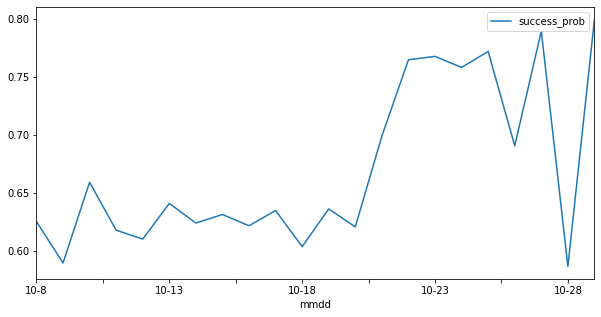

In [346]:
%matplotlib inline
df.plot.line(x='mmdd', y='success_prob', figsize=(10,5))

In [397]:
retry_success_2019[retry_success_2019['failed_response_message'].fillna('').str.contains('balance')]

,received_date,site_id,subscription_id,billing_country,bin,cid,day_of_month,issuer_country,merchant_number,new_status,payment_currency,payment_service_id,renew_att_num,response_message,success,failed_response_code,failed_response_message,failed_decline_type,days_between
101,2019-03-30,adbehap,10356736101,CL,559202,RETRY_DECLINED.2,30,CL,1411163460-CLP-pacific,Declined,CLP,netgiro-bms,2,27001: Transaction refused,0,521,Not enough balance: Not enough balance,Insufficient Funds,7
261,2019-03-30,adbehap,10678210001,IN,414366,NaN,30,IN,DR_IRELAND_ROW,Declined,INR,adyen,3,51 : Insufficient funds/over credit limit,0,521,Not enough balance: Not enough balance,Insufficient Funds,7
1060,2019-03-16,adbehap,11093831201,IN,457262,NaN,16,IN,DR_IRELAND_ROW,Declined,INR,adyen,5,Not enough balance: Not enough balance,0,521,Not enough balance: Not enough balance,Insufficient Funds,7
1061,2019-03-18,adbehap,11093831201,IN,457262,NaN,18,IN,DR_IRELAND_ROW,Declined,INR,adyen,6,51 : Insufficient funds/over credit limit,0,521,Not enough balance: Not enough balance,Insufficient Funds,2
1867,2019-03-12,adbehap,11213283001,IN,534424,NaN,12,IN,DR_IRELAND_ROW,Declined,INR,adyen,6,51 : Insufficient funds/over credit limit,0,521,Not enough balance: Not enough balance,Insufficient Funds,2
2250,2019-03-30,adbehap,11288338201,CO,451309,NaN,30,CO,DR_IRELAND_ROW,Declined,COP,adyen,2,Not enough balance: Not enough balance,0,521,Not enough balance: Not enough balance,Insufficient Funds,7
2743,2019-03-15,avast,11407353501,FR,497756,NaN,15,FR,DR_IRELAND,Declined,EUR,adyen,3,51: Insufficient funds/over credit limit,0,521,Not enough balance: Not enough balance,Insufficient Funds,5
2781,2019-03-17,avast,11415593201,IT,526430,NaN,17,IT,DR_IRELAND,Declined,EUR,adyen,3,Not enough balance: Not enough balance,0,521,Not enough balance: Not enough balance,Insufficient Funds,5
3148,2019-03-29,kasper,11495793701,US,524905,NaN,29,US,Digital_River_Software,Declined,USD,adyen,2,Not enough balance: Not enough balance,0,521,Not enough balance: Not enough balance,Insufficient Funds,5
3525,2019-03-18,adbehap,12081258401,IN,414366,NaN,18,IN,DR_IRELAND_ROW,Declined,INR,adyen,3,51 : Insufficient funds/over credit limit,0,521,Not enough balance: Not enough balance,Insufficient Funds,7


In [391]:
msg_group = {
            'do_not_honor' : 'do not honor',
            'attempt_lower_amount' : 'lower amount',
            'Insufficient Funds' : ['insufficient', 'balance'],
            'correct_cc_retry' : 'correct card',
            'invalid_cc' : 'invalid card',
            'lost_stolen' : 'lost or stolen',
            'invalid_account' : 'invalid account',
            'do_not_try_merchant_review' : 'do not try again/merchant review',
            'expired_card' : 'expired',
            'pickup_card' : 'pick',
            'blocked_first_used' : 'blocked',
            'invalid_txn' : 'invalid trans',
            'restricted_card' : 'restricted',
            'not_permitted' : 'not permitted',
            'expired card' : 'expired card',
            'unable to determine format' : 'determine format',
            'system error' : 'system error',
            'no reply' : 'no reply',
            'no charge model found' : 'no charge model found',
            'issuer unavailable' : 'issuer unavailable',
            'litle http response code' : 'litle http response code',
            'ioexception' : 'ioexception',
            'invalid merchant' : 'invalid merchant',
            'international filtering':'international filtering',
            'corrupt input data':'corrupt input data',
            'server error' : 'server error',
            'acquirer error' : 'acquirer error',
            'transaction refused[30]':'transaction refused[30]',
            'transaction refused[002]':'transaction refused[002]',
            'txn_refused' : 'refuse',
            'declined non generic': 'declined non generic',
            'declined' : 'decline',
            'transaction not allowed at terminal': 'transaction not allowed at terminal',
            'error validating xml data': 'error validating xml data',
            'communication problems': 'communication problems',
            'new account info': 'new account info',
            'unable to connect to gateway': 'unable to connect to gateway'
}

def __group_response_msg(msg):
        """Groups decline type based on the given message"""
        other = 'Base'
        
        
        if not isinstance(msg, str):
            return other

        msg_lower = msg.lower()
        for key, val in msg_group.items():
            if isinstance(val, list): 
                for msg in val:
                    if msg in msg_lower:
                        return key
            else:
                if val in msg_lower:
                    return key

        return other

In [394]:
__group_response_msg(None)

'Base'

In [396]:
retry_success_2019.loc[retry_success_2019['failed_response_message'].fillna('').str.contains('balance'), "failed_decline_type"] = "Insufficient Funds"

In [421]:
retry_success_2019['failed_decline_type'].value_counts(dropna=False)

txn_refused                            949152
Insufficient Funds                     834639
Base                                   816214
do_not_honor                           591800
Hard Fraud                             413833
invalid_cc                             180074
declined                               163427
expired_card                           153750
correct_cc_retry                       103067
blocked_first_used                      72993
invalid_account                         71737
invalid_txn                             67383
not_permitted                           50841
attempt_lower_amount                    25311
restricted_card                         23279
server error                             7195
pickup_card                              6508
no charge model found                    4463
new account info                         3264
transaction refused[30]                  1263
acquirer error                           1018
invalid merchant                  

In [428]:
def to_weekday(datestr):
    struct = time.strptime(datestr, "%Y-%m-%d %H:%M:%S")
    date = datetime.date(struct.tm_year, struct.tm_mon, struct.tm_mday)
    return date.isoweekday()

to_weekday(retry_success_2019.iloc[0]['transaction_date_in_string'])

5